In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [177]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [178]:
file = '2013~2023 한국 기온,습도,풍속.csv'
file2 = '한국기후 평균 최고 최저.csv'

In [179]:
df = pd.read_csv(file, encoding = 'cp949')
df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)
df1.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,105,강릉,1970-01-01,3.2,10.3,-0.5
1,105,강릉,1970-01-02,1.8,5.1,-0.2
2,105,강릉,1970-01-03,-0.3,4.8,-2.2
3,105,강릉,1970-01-04,-5.9,-1.7,-12.6
4,105,강릉,1970-01-05,-7.9,-0.8,-14.7


In [180]:
df1.columns = ['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']
df1 = df1.iloc[:, 2:]
df1.head()

,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,1970-01-01,3.2,10.3,-0.5
1,1970-01-02,1.8,5.1,-0.2
2,1970-01-03,-0.3,4.8,-2.2
3,1970-01-04,-5.9,-1.7,-12.6
4,1970-01-05,-7.9,-0.8,-14.7


In [181]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_temp = df1.groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [182]:
filter1 = df_temp['최고기온(℃)'].isna() == True
df_temp['최고기온(℃)'][filter1] = 20.7875

In [183]:
filter2 = df_temp['최저기온(℃)'].isna() == True
df_temp['최저기온(℃)'][filter2] = 7.15625

In [184]:
df_korea = df_korea.reset_index()

In [185]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

In [186]:
#dataset = df_korea.iloc[:, :3]
dataset = df_temp.iloc[:, :]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(19585, 3)

In [187]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 14688 Test Size :  4897


In [188]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

In [189]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(14688, 3)

In [227]:
x_train = []
y_train = []
time_step = 60
n_col = 3

for i in range(time_step, len(scaled_data)):
    print(time_step, i)
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

60 60
x_train :  [array([[0.28644888, 0.31922063, 0.28660807],
       [0.29945554, 0.29607384, 0.3198272 ],
       [0.25937689, 0.25388222, 0.26530612],
       [0.10027223, 0.10108409, 0.08580366],
       [0.02510587, 0.04731907, 0.        ],
       [0.24319419, 0.25754468, 0.20527335],
       [0.22837266, 0.23513038, 0.23596008],
       [0.23835451, 0.25388222, 0.23447043],
       [0.17211131, 0.16319953, 0.18948309],
       [0.20220811, 0.21432757, 0.19603754],
       [0.23275862, 0.25212423, 0.2215105 ],
       [0.33318209, 0.35159684, 0.2919708 ],
       [0.15366001, 0.17096396, 0.17488455],
       [0.09195402, 0.10225608, 0.10859526],
       [0.06488203, 0.05288602, 0.09742291],
       [0.05792498, 0.08980369, 0.04856249],
       [0.0738052 , 0.09449165, 0.07239684],
       [0.12885662, 0.18678582, 0.1084463 ],
       [0.17029643, 0.20773513, 0.16803218],
       [0.1822444 , 0.22121301, 0.17116043],
       [0.22081065, 0.27175505, 0.194101  ],
       [0.28055051, 0.32390858, 0.248

60 3533
60 3534
60 3535
60 3536
60 3537
60 3538
60 3539
60 3540
60 3541
60 3542
60 3543
60 3544
60 3545
60 3546
60 3547
60 3548
60 3549
60 3550
60 3551
60 3552
60 3553
60 3554
60 3555
60 3556
60 3557
60 3558
60 3559
60 3560
60 3561
60 3562
60 3563
60 3564
60 3565
60 3566
60 3567
60 3568
60 3569
60 3570
60 3571
60 3572
60 3573
60 3574
60 3575
60 3576
60 3577
60 3578
60 3579
60 3580
60 3581
60 3582
60 3583
60 3584
60 3585
60 3586
60 3587
60 3588
60 3589
60 3590
60 3591
60 3592
60 3593
60 3594
60 3595
60 3596
60 3597
60 3598
60 3599
60 3600
60 3601
60 3602
60 3603
60 3604
60 3605
60 3606
60 3607
60 3608
60 3609
60 3610
60 3611
60 3612
60 3613
60 3614
60 3615
60 3616
60 3617
60 3618
60 3619
60 3620
60 3621
60 3622
60 3623
60 3624
60 3625
60 3626
60 3627
60 3628
60 3629
60 3630
60 3631
60 3632
60 3633
60 3634
60 3635
60 3636
60 3637
60 3638
60 3639
60 3640
60 3641
60 3642
60 3643
60 3644
60 3645
60 3646
60 3647
60 3648
60 3649
60 3650
60 3651
60 3652
60 3653
60 3654
60 3655
60 3656
60 3657


60 7235
60 7236
60 7237
60 7238
60 7239
60 7240
60 7241
60 7242
60 7243
60 7244
60 7245
60 7246
60 7247
60 7248
60 7249
60 7250
60 7251
60 7252
60 7253
60 7254
60 7255
60 7256
60 7257
60 7258
60 7259
60 7260
60 7261
60 7262
60 7263
60 7264
60 7265
60 7266
60 7267
60 7268
60 7269
60 7270
60 7271
60 7272
60 7273
60 7274
60 7275
60 7276
60 7277
60 7278
60 7279
60 7280
60 7281
60 7282
60 7283
60 7284
60 7285
60 7286
60 7287
60 7288
60 7289
60 7290
60 7291
60 7292
60 7293
60 7294
60 7295
60 7296
60 7297
60 7298
60 7299
60 7300
60 7301
60 7302
60 7303
60 7304
60 7305
60 7306
60 7307
60 7308
60 7309
60 7310
60 7311
60 7312
60 7313
60 7314
60 7315
60 7316
60 7317
60 7318
60 7319
60 7320
60 7321
60 7322
60 7323
60 7324
60 7325
60 7326
60 7327
60 7328
60 7329
60 7330
60 7331
60 7332
60 7333
60 7334
60 7335
60 7336
60 7337
60 7338
60 7339
60 7340
60 7341
60 7342
60 7343
60 7344
60 7345
60 7346
60 7347
60 7348
60 7349
60 7350
60 7351
60 7352
60 7353
60 7354
60 7355
60 7356
60 7357
60 7358
60 7359


60 10951
60 10952
60 10953
60 10954
60 10955
60 10956
60 10957
60 10958
60 10959
60 10960
60 10961
60 10962
60 10963
60 10964
60 10965
60 10966
60 10967
60 10968
60 10969
60 10970
60 10971
60 10972
60 10973
60 10974
60 10975
60 10976
60 10977
60 10978
60 10979
60 10980
60 10981
60 10982
60 10983
60 10984
60 10985
60 10986
60 10987
60 10988
60 10989
60 10990
60 10991
60 10992
60 10993
60 10994
60 10995
60 10996
60 10997
60 10998
60 10999
60 11000
60 11001
60 11002
60 11003
60 11004
60 11005
60 11006
60 11007
60 11008
60 11009
60 11010
60 11011
60 11012
60 11013
60 11014
60 11015
60 11016
60 11017
60 11018
60 11019
60 11020
60 11021
60 11022
60 11023
60 11024
60 11025
60 11026
60 11027
60 11028
60 11029
60 11030
60 11031
60 11032
60 11033
60 11034
60 11035
60 11036
60 11037
60 11038
60 11039
60 11040
60 11041
60 11042
60 11043
60 11044
60 11045
60 11046
60 11047
60 11048
60 11049
60 11050
60 11051
60 11052
60 11053
60 11054
60 11055
60 11056
60 11057
60 11058
60 11059
60 11060
60 11061
6

60 14735
60 14736
60 14737
60 14738
60 14739
60 14740
60 14741
60 14742
60 14743
60 14744
60 14745
60 14746
60 14747
60 14748
60 14749
60 14750
60 14751
60 14752
60 14753
60 14754
60 14755
60 14756
60 14757
60 14758
60 14759
60 14760
60 14761
60 14762
60 14763
60 14764
60 14765
60 14766
60 14767
60 14768
60 14769
60 14770
60 14771
60 14772
60 14773
60 14774
60 14775
60 14776
60 14777
60 14778
60 14779
60 14780
60 14781
60 14782
60 14783
60 14784
60 14785
60 14786
60 14787
60 14788
60 14789
60 14790
60 14791
60 14792
60 14793
60 14794
60 14795
60 14796
60 14797
60 14798
60 14799
60 14800
60 14801
60 14802
60 14803
60 14804
60 14805
60 14806
60 14807
60 14808
60 14809
60 14810
60 14811
60 14812
60 14813
60 14814
60 14815
60 14816
60 14817
60 14818
60 14819
60 14820
60 14821
60 14822
60 14823
60 14824
60 14825
60 14826
60 14827
60 14828
60 14829
60 14830
60 14831
60 14832
60 14833
60 14834
60 14835
60 14836
60 14837
60 14838
60 14839
60 14840
60 14841
60 14842
60 14843
60 14844
60 14845
6

60 18510
60 18511
60 18512
60 18513
60 18514
60 18515
60 18516
60 18517
60 18518
60 18519
60 18520
60 18521
60 18522
60 18523
60 18524
60 18525
60 18526
60 18527
60 18528
60 18529
60 18530
60 18531
60 18532
60 18533
60 18534
60 18535
60 18536
60 18537
60 18538
60 18539
60 18540
60 18541
60 18542
60 18543
60 18544
60 18545
60 18546
60 18547
60 18548
60 18549
60 18550
60 18551
60 18552
60 18553
60 18554
60 18555
60 18556
60 18557
60 18558
60 18559
60 18560
60 18561
60 18562
60 18563
60 18564
60 18565
60 18566
60 18567
60 18568
60 18569
60 18570
60 18571
60 18572
60 18573
60 18574
60 18575
60 18576
60 18577
60 18578
60 18579
60 18580
60 18581
60 18582
60 18583
60 18584
60 18585
60 18586
60 18587
60 18588
60 18589
60 18590
60 18591
60 18592
60 18593
60 18594
60 18595
60 18596
60 18597
60 18598
60 18599
60 18600
60 18601
60 18602
60 18603
60 18604
60 18605
60 18606
60 18607
60 18608
60 18609
60 18610
60 18611
60 18612
60 18613
60 18614
60 18615
60 18616
60 18617
60 18618
60 18619
60 18620
6

In [228]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [229]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [230]:
x_train.shape, y_train.shape

((19525, 60, 3), (19525, 3))

In [231]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(x_train.shape[1], n_col),
                       activation = 'relu',return_sequences = True),
    keras.layers.LSTM(64, return_sequences = True, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(50, return_sequences = True, activation = 'relu'),
    keras.layers.LSTM(64, return_sequences = False, activation = 'relu'), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(n_col)
])
m_lstm.summary()
#kernel_regularizer="l2"

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 60, 50)            10800     
                                                                 
 lstm_41 (LSTM)              (None, 60, 64)            29440     
                                                                 
 dropout_6 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_42 (LSTM)              (None, 60, 50)            23000     
                                                                 
 lstm_43 (LSTM)              (None, 64)                29440     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 32)              

In [232]:
m_lstm.compile(optimizer = tf.optimizers.RMSprop(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [233]:
h = m_lstm.fit(x_train, y_train, epochs = 30, shuffle=False, batch_size = 32)

Epoch 1/30
611/611 [==============================] - 28s 42ms/step - loss: 0.0563 - mae: 0.1772
Epoch 2/30
611/611 [==============================] - 27s 43ms/step - loss: 0.0169 - mae: 0.1025
Epoch 3/30
611/611 [==============================] - 27s 43ms/step - loss: 25.2208 - mae: 0.1777
Epoch 4/30
611/611 [==============================] - 25s 41ms/step - loss: 0.0128 - mae: 0.0877
Epoch 5/30
611/611 [==============================] - 25s 41ms/step - loss: 0.0246 - mae: 0.0849
Epoch 6/30
611/611 [==============================] - 25s 41ms/step - loss: 0.0118 - mae: 0.0815
Epoch 7/30
611/611 [==============================] - 25s 41ms/step - loss: 0.0101 - mae: 0.0792
Epoch 8/30
611/611 [==============================] - 25s 42ms/step - loss: 0.0096 - mae: 0.0769
Epoch 9/30
611/611 [==============================] - 25s 41ms/step - loss: 0.0094 - mae: 0.0760
Epoch 10/30
611/611 [==============================] - 25s 41ms/step - loss: 0.0094 - mae: 0.0761
Epoch 11/30
611/611 [=======

# 건들지 마시오

Text(0, 0.5, 'Losses')

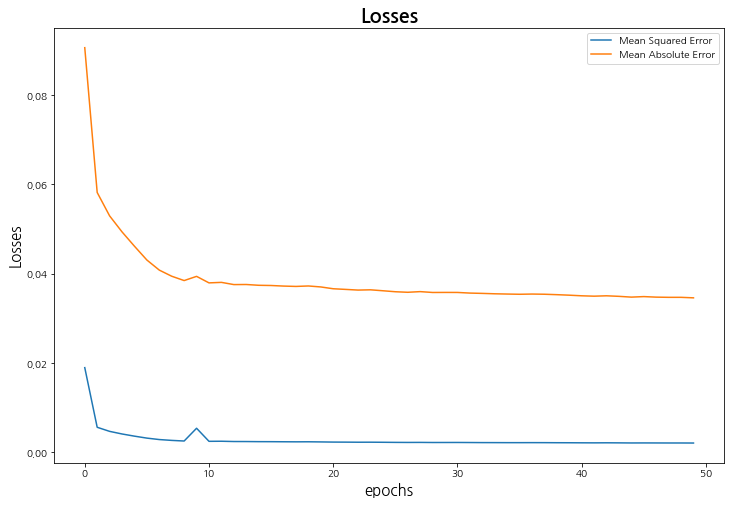

In [153]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [155]:
m_lstm_RMSprop = tf.keras.models.load_model('m4_lstm_RMSprop.h5')

In [154]:
# 8/25 loss율 엄청 좋음
m_lstm.save('m4_lstm_RMSprop.h5')

# 건들지 마시오

Text(0, 0.5, 'Losses')

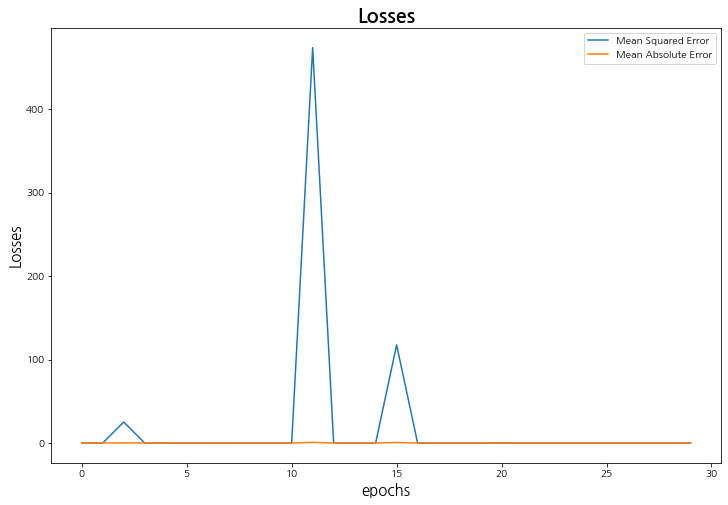

In [235]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [236]:
#8/25
m_lstm.save('m5_lstm_RMSprop.h5')

In [237]:
m_lstm_RMSprop = tf.keras.models.load_model('m5_lstm_RMSprop.h5')

In [238]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    #print(time_step, i)
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))

x_test

array([[[0.38793103, 0.42836214, 0.31580515],
        [0.49213551, 0.4557574 , 0.50856547],
        [0.3008167 , 0.35174333, 0.28407567],
        ...,
        [0.33076225, 0.333431  , 0.32518993],
        [0.32410768, 0.31526516, 0.34083122],
        [0.42301875, 0.4890126 , 0.31163414]],

       [[0.49213551, 0.4557574 , 0.50856547],
        [0.3008167 , 0.35174333, 0.28407567],
        [0.1991833 , 0.19425725, 0.2367049 ],
        ...,
        [0.32410768, 0.31526516, 0.34083122],
        [0.42301875, 0.4890126 , 0.31163414],
        [0.53962492, 0.58804571, 0.50737375]],

       [[0.3008167 , 0.35174333, 0.28407567],
        [0.1991833 , 0.19425725, 0.2367049 ],
        [0.21279492, 0.21432757, 0.22344704],
        ...,
        [0.42301875, 0.4890126 , 0.31163414],
        [0.53962492, 0.58804571, 0.50737375],
        [0.38430127, 0.38397304, 0.39267094]],

       ...,

       [[0.77208106, 0.77234105, 0.7729778 ],
        [0.77283727, 0.77658951, 0.75495308],
        [0.82320024, 0

In [239]:
m_lstm_RMSprop.evaluate(x_test, y_test)

154/154 [==============================] - 2s 13ms/step - loss: 0.0067 - mae: 0.0673


[0.00668904697522521, 0.06732051074504852]

In [240]:
pred = m_lstm_RMSprop.predict(x_test)
pred

154/154 [==============================] - 2s 12ms/step


array([[0.40621334, 0.4223265 , 0.39161757],
       [0.4482661 , 0.4652894 , 0.43076074],
       [0.45122546, 0.4683142 , 0.43351603],
       ...,
       [0.78767794, 0.77621114, 0.78672653],
       [0.7878666 , 0.7763782 , 0.78692925],
       [0.7883671 , 0.77681875, 0.7874733 ]], dtype=float32)

In [241]:
pred = scaler.inverse_transform(pred)
print(pred.shape)
pred

(4897, 3)


array([[ 6.280516 , 11.267505 ,  1.8683045],
       [ 8.018346 , 13.10041  ,  3.5106053],
       [ 8.140642 , 13.229455 ,  3.6262066],
       ...,
       [22.04454  , 26.365108 , 18.445595 ],
       [22.052336 , 26.372236 , 18.4541   ],
       [22.073019 , 26.391031 , 18.476927 ]], dtype=float32)

In [242]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[11.79375, 18.3375 ,  6.725  ],
       [ 5.375  ,  9.63125,  1.9125 ],
       [ 5.3625 ,  8.70625,  2.075  ],
       ...,
       [26.8875 , 31.00625, 23.51875],
       [27.4    , 31.6625 , 24.34375],
       [27.2375 , 31.2125 , 24.2125 ]])

In [243]:
pred = pd.DataFrame(pred)
y_test = pd.DataFrame(y_test)

In [244]:
pred.columns = ['예측평균기온', '예측최고기온', '예측최저기온']
y_test.columns = ['실제평균기온', '실제최고기온', '실제최저기온']

#pred.columns = ['예측평균기온', '예측최고기온']
#y_test.columns = ['실제평균기온', '실제최고기온']

In [245]:
df_pred = pd.concat((pred, y_test), axis = 1)
df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온', '예측최저기온', '실제최저기온']]
#df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온']]
df_pred

,예측평균기온,실제평균기온,예측최고기온,실제최고기온,예측최저기온,실제최저기온
0,6.280516,11.79375,11.267505,18.33750,1.868304,6.72500
1,8.018346,5.37500,13.100410,9.63125,3.510605,1.91250
2,8.140642,5.36250,13.229455,8.70625,3.626207,2.07500
3,7.456357,7.25625,12.507838,11.08125,2.979469,4.09375
4,7.257581,8.90625,12.298245,12.89375,2.791578,5.36250
...,...,...,...,...,...,...
4892,22.383135,26.24375,26.672508,29.97500,18.820276,22.85625
4893,22.290247,25.86250,26.588232,29.23125,18.717369,23.14375
4894,22.044540,26.88750,26.365108,31.00625,18.445595,23.51875
4895,22.052336,27.40000,26.372236,31.66250,18.454100,24.34375


Text(0.5, 1.0, '예측 평균 기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


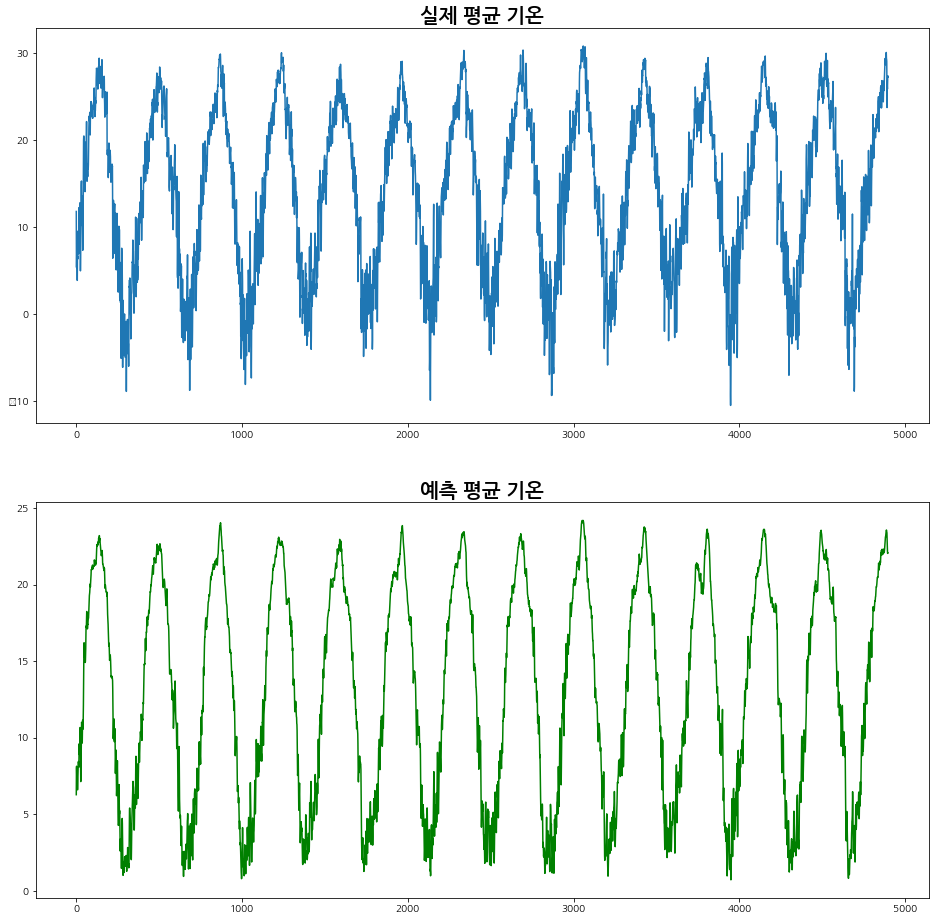

In [246]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제평균기온'])
axe[1].plot(df_pred['예측평균기온'], c = 'g')

axe[0].set_title('실제 평균 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 평균 기온', size = 20, weight = 'bold')
#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최고 기온')

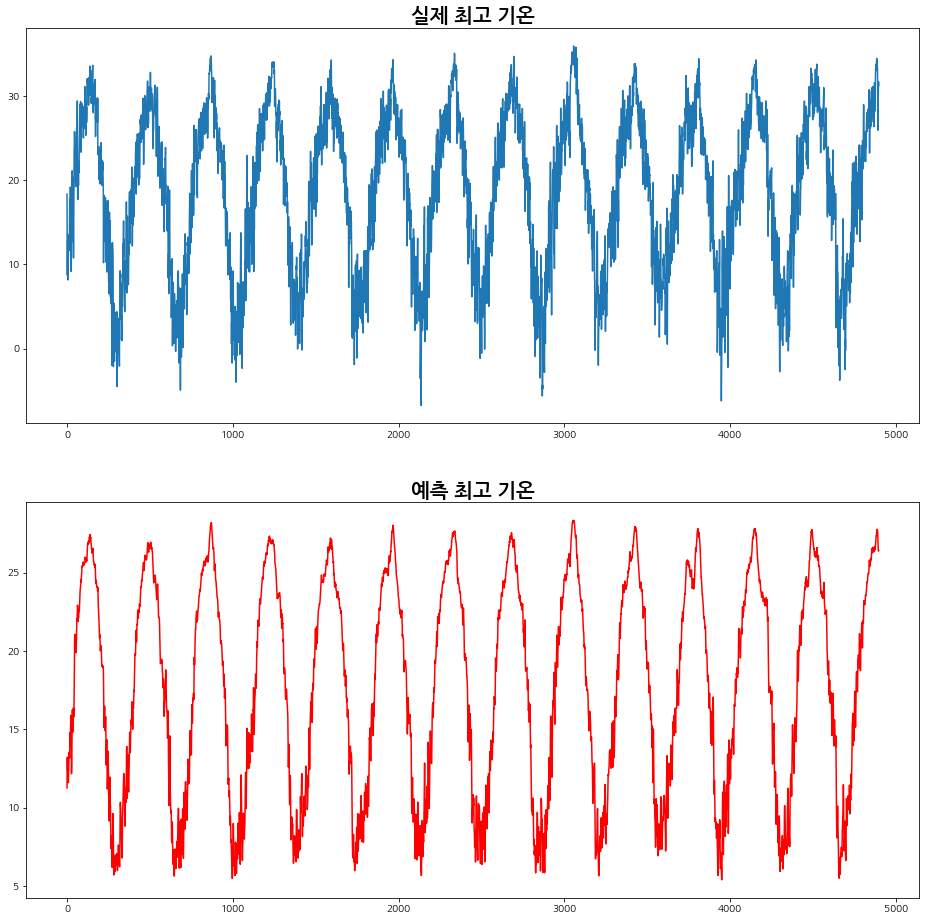

In [247]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최고기온'])
axe[1].plot(df_pred['예측최고기온'], c = 'r')

axe[0].set_title('실제 최고 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최고 기온', size = 20, weight = 'bold')

#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최저 기온')

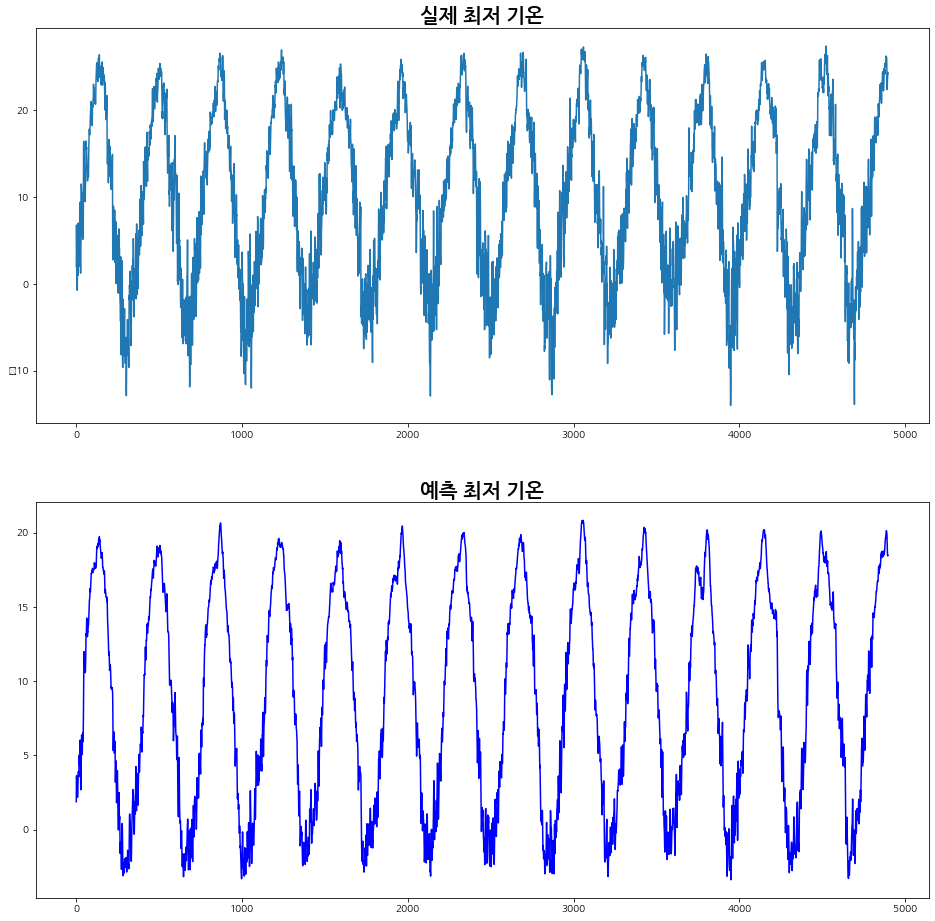

In [248]:

fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최저기온'])
axe[1].plot(df_pred['예측최저기온'], c = 'b')

axe[0].set_title('실제 최저 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최저 기온', size = 20, weight = 'bold')


In [249]:
start_date = datetime.date(2023, 8, 16)
#print('언제의 대한민국 평균 기온을 알고 싶으신가요? (Ex. 2040-01-01, 형태로 적어주세요)')
year, month, day = map(int, input().split('-'))
target_date = datetime.date(year, month, day)

d_day = (target_date - start_date).days
print(d_day)

2025-08-15
730


In [250]:
list(x_test[-1][0])

[0.8232002419842709, 0.8448578962789335, 0.7738715924325935]

In [251]:
last_array = []
for i in range(len(x_test[-1])):
    last_array.append(list(x_test[-1][i]))
len(last_array)
np.array(last_array)

array([[0.82320024, 0.8448579 , 0.77387159],
       [0.84664247, 0.86595371, 0.81438999],
       [0.85012099, 0.86346323, 0.84120363],
       [0.85904416, 0.87884559, 0.8286906 ],
       [0.81261343, 0.77981248, 0.82809474],
       [0.76149425, 0.70216818, 0.80470728],
       [0.80490018, 0.7890419 , 0.80902726],
       [0.82698125, 0.82127161, 0.82064651],
       [0.8399879 , 0.84207442, 0.83345747],
       [0.84497883, 0.83899795, 0.83837331],
       [0.83514822, 0.77131556, 0.85282288],
       [0.87008469, 0.84837386, 0.87308208],
       [0.84694495, 0.81380018, 0.85297185],
       [0.85344828, 0.78757691, 0.89423507],
       [0.82879613, 0.777322  , 0.87546551],
       [0.86358137, 0.85701729, 0.86757039],
       [0.88384755, 0.87503662, 0.88559511],
       [0.888536  , 0.87283914, 0.89393714],
       [0.85269208, 0.7998828 , 0.89810815],
       [0.87265578, 0.8444184 , 0.88559511],
       [0.88944344, 0.88397304, 0.87099657],
       [0.82758621, 0.7998828 , 0.84299121],
       [0.

In [252]:
for i in range(time_step, d_day + time_step):
    print(time_step, i)
    last_ar = np.array(last_array)[i-time_step:i, 0:n_col]
    print(last_ar)
    array = np.reshape(last_ar, (1, last_ar.shape[0], n_col))
    print(array.shape)
    last_array.append(list(m_lstm_RMSprop.predict(array)[0]))
    print(len(last_array))

60 60
[[0.82320024 0.8448579  0.77387159]
 [0.84664247 0.86595371 0.81438999]
 [0.85012099 0.86346323 0.84120363]
 [0.85904416 0.87884559 0.8286906 ]
 [0.81261343 0.77981248 0.82809474]
 [0.76149425 0.70216818 0.80470728]
 [0.80490018 0.7890419  0.80902726]
 [0.82698125 0.82127161 0.82064651]
 [0.8399879  0.84207442 0.83345747]
 [0.84497883 0.83899795 0.83837331]
 [0.83514822 0.77131556 0.85282288]
 [0.87008469 0.84837386 0.87308208]
 [0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.7947553

1/1 [==============================] - 0s 16ms/step
64
60 64
[[0.81261343 0.77981248 0.82809474]
 [0.76149425 0.70216818 0.80470728]
 [0.80490018 0.7890419  0.80902726]
 [0.82698125 0.82127161 0.82064651]
 [0.8399879  0.84207442 0.83345747]
 [0.84497883 0.83899795 0.83837331]
 [0.83514822 0.77131556 0.85282288]
 [0.87008469 0.84837386 0.87308208]
 [0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0

1/1 [==============================] - 0s 17ms/step
68
60 68
[[0.8399879  0.84207442 0.83345747]
 [0.84497883 0.83899795 0.83837331]
 [0.83514822 0.77131556 0.85282288]
 [0.87008469 0.84837386 0.87308208]
 [0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0

1/1 [==============================] - 0s 18ms/step
72
60 72
[[0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0

1/1 [==============================] - 0s 16ms/step
76
60 76
[[0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0

1/1 [==============================] - 0s 18ms/step
80
60 80
[[0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0

1/1 [==============================] - 0s 18ms/step
84
60 84
[[0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0

1/1 [==============================] - 0s 17ms/step
88
60 88
[[0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0

1/1 [==============================] - 0s 17ms/step
92
60 92
[[0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0

1/1 [==============================] - 0s 18ms/step
96
60 96
[[0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.78836709 0.77681875 0.78747332]
 [0.77481133 0.7648893  0.77271551]
 [0

1/1 [==============================] - 0s 17ms/step
100
60 100
[[0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.78836709 0.77681875 0.78747332]
 [0.77481133 0.7648893  0.77271551]
 [0.76227844 0.7538594  0.75907081]
 [0.75065672 0.7436322  0.7464155 ]
 [0.7400859  0.73432994 0.73490345]
 [0.73156714 0.72683394 0.72562504]
 

1/1 [==============================] - 0s 21ms/step
104
60 104
[[0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.78836709 0.77681875 0.78747332]
 [0.77481133 0.7648893  0.77271551]
 [0.76227844 0.7538594  0.75907081]
 [0.75065672 0.7436322  0.7464155 ]
 [0.7400859  0.73432994 0.73490345]
 [0.73156714 0.72683394 0.72562504]
 [0.7243467  0.7204808  0.71776015]
 [0.71734256 0.7143178  0.71013069]
 [0.71091223 0.70865989 0.70312589]
 [0.7047317  0.70322198 0.69639289]
 

1/1 [==============================] - 0s 17ms/step
108
60 108
[[0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.78836709 0.77681875 0.78747332]
 [0.77481133 0.7648893  0.77271551]
 [0.76227844 0.7538594  0.75907081]
 [0.75065672 0.7436322  0.7464155 ]
 [0.7400859  0.73432994 0.73490345]
 [0.73156714 0.72683394 0.72562504]
 [0.7243467  0.7204808  0.71776015]
 [0.71734256 0.7143178  0.71013069]
 [0.71091223 0.70865989 0.70312589]
 [0.7047317  0.70322198 0.69639289]
 [0.69898248 0.69816381 0.69012916]
 [0.69367635 0.69349587 0.68434751]
 [0.68855071 0.68898702 0.67876214]
 [0.68032026 0.68173718 0.6698032 ]
 

1/1 [==============================] - 0s 19ms/step
112
60 112
[[0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.78836709 0.77681875 0.78747332]
 [0.77481133 0.7648893  0.77271551]
 [0.76227844 0.7538594  0.75907081]
 [0.75065672 0.7436322  0.7464155 ]
 [0.7400859  0.73432994 0.73490345]
 [0.73156714 0.72683394 0.72562504]
 [0.7243467  0.7204808  0.71776015]
 [0.71734256 0.7143178  0.71013069]
 [0.71091223 0.70865989 0.70312589]
 [0.7047317  0.70322198 0.69639289]
 [0.69898248 0.69816381 0.69012916]
 [0.69367635 0.69349587 0.68434751]
 [0.68855071 0.68898702 0.67876214]
 [0.68032026 0.68173718 0.6698032 ]
 [0.67159313 0.67404824 0.66030532]
 [0.66270453 0.66621715 0.65063155]
 [0.65402222 0.65856791 0.64118266]
 [0.64586955 0.65138543 0.63231009]
 

1/1 [==============================] - 0s 19ms/step
116
60 116
[[0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.78836709 0.77681875 0.78747332]
 [0.77481133 0.7648893  0.77271551]
 [0.76227844 0.7538594  0.75907081]
 [0.75065672 0.7436322  0.7464155 ]
 [0.7400859  0.73432994 0.73490345]
 [0.73156714 0.72683394 0.72562504]
 [0.7243467  0.7204808  0.71776015]
 [0.71734256 0.7143178  0.71013069]
 [0.71091223 0.70865989 0.70312589]
 [0.7047317  0.70322198 0.69639289]
 [0.69898248 0.69816381 0.69012916]
 [0.69367635 0.69349587 0.68434751]
 [0.68855071 0.68898702 0.67876214]
 [0.68032026 0.68173718 0.6698032 ]
 [0.67159313 0.67404824 0.66030532]
 [0.66270453 0.66621715 0.65063155]
 [0.65402222 0.65856791 0.64118266]
 [0.64586955 0.65138543 0.63231009]
 [0.63829899 0.64471614 0.62407076]
 [0.63078421 0.63809615 0.61589175]
 [0.62376702 0.63191473 0.60825413]
 [0.61735636 0.62626797 0.60127634]
 

1/1 [==============================] - 0s 18ms/step
120
60 120
[[0.78836709 0.77681875 0.78747332]
 [0.77481133 0.7648893  0.77271551]
 [0.76227844 0.7538594  0.75907081]
 [0.75065672 0.7436322  0.7464155 ]
 [0.7400859  0.73432994 0.73490345]
 [0.73156714 0.72683394 0.72562504]
 [0.7243467  0.7204808  0.71776015]
 [0.71734256 0.7143178  0.71013069]
 [0.71091223 0.70865989 0.70312589]
 [0.7047317  0.70322198 0.69639289]
 [0.69898248 0.69816381 0.69012916]
 [0.69367635 0.69349587 0.68434751]
 [0.68855071 0.68898702 0.67876214]
 [0.68032026 0.68173718 0.6698032 ]
 [0.67159313 0.67404824 0.66030532]
 [0.66270453 0.66621715 0.65063155]
 [0.65402222 0.65856791 0.64118266]
 [0.64586955 0.65138543 0.63231009]
 [0.63829899 0.64471614 0.62407076]
 [0.63078421 0.63809615 0.61589175]
 [0.62376702 0.63191473 0.60825413]
 [0.61735636 0.62626797 0.60127634]
 [0.6108951  0.62057662 0.59424329]
 [0.60471845 0.61513603 0.58752   ]
 [0.59902942 0.61012501 0.5813275 ]
 [0.59397328 0.60567153 0.5758239 ]
 

1/1 [==============================] - 0s 17ms/step
124
60 124
[[0.7400859  0.73432994 0.73490345]
 [0.73156714 0.72683394 0.72562504]
 [0.7243467  0.7204808  0.71776015]
 [0.71734256 0.7143178  0.71013069]
 [0.71091223 0.70865989 0.70312589]
 [0.7047317  0.70322198 0.69639289]
 [0.69898248 0.69816381 0.69012916]
 [0.69367635 0.69349587 0.68434751]
 [0.68855071 0.68898702 0.67876214]
 [0.68032026 0.68173718 0.6698032 ]
 [0.67159313 0.67404824 0.66030532]
 [0.66270453 0.66621715 0.65063155]
 [0.65402222 0.65856791 0.64118266]
 [0.64586955 0.65138543 0.63231009]
 [0.63829899 0.64471614 0.62407076]
 [0.63078421 0.63809615 0.61589175]
 [0.62376702 0.63191473 0.60825413]
 [0.61735636 0.62626797 0.60127634]
 [0.6108951  0.62057662 0.59424329]
 [0.60471845 0.61513603 0.58752   ]
 [0.59902942 0.61012501 0.5813275 ]
 [0.59397328 0.60567153 0.5758239 ]
 [0.58835292 0.60072088 0.5697062 ]
 [0.58296025 0.59597099 0.5638364 ]
 [0.57737356 0.5910269  0.55778182]
 [0.57148385 0.58573949 0.55148482]
 

1/1 [==============================] - 0s 18ms/step
128
60 128
[[0.71091223 0.70865989 0.70312589]
 [0.7047317  0.70322198 0.69639289]
 [0.69898248 0.69816381 0.69012916]
 [0.69367635 0.69349587 0.68434751]
 [0.68855071 0.68898702 0.67876214]
 [0.68032026 0.68173718 0.6698032 ]
 [0.67159313 0.67404824 0.66030532]
 [0.66270453 0.66621715 0.65063155]
 [0.65402222 0.65856791 0.64118266]
 [0.64586955 0.65138543 0.63231009]
 [0.63829899 0.64471614 0.62407076]
 [0.63078421 0.63809615 0.61589175]
 [0.62376702 0.63191473 0.60825413]
 [0.61735636 0.62626797 0.60127634]
 [0.6108951  0.62057662 0.59424329]
 [0.60471845 0.61513603 0.58752   ]
 [0.59902942 0.61012501 0.5813275 ]
 [0.59397328 0.60567153 0.5758239 ]
 [0.58835292 0.60072088 0.5697062 ]
 [0.58296025 0.59597099 0.5638364 ]
 [0.57737356 0.5910269  0.55778182]
 [0.57148385 0.58573949 0.55148482]
 [0.56577003 0.58060956 0.54537648]
 [0.56007069 0.57549238 0.53928399]
 [0.55410546 0.57011706 0.53293008]
 [0.54758835 0.56418961 0.52604955]
 

1/1 [==============================] - 0s 17ms/step
132
60 132
[[0.68855071 0.68898702 0.67876214]
 [0.68032026 0.68173718 0.6698032 ]
 [0.67159313 0.67404824 0.66030532]
 [0.66270453 0.66621715 0.65063155]
 [0.65402222 0.65856791 0.64118266]
 [0.64586955 0.65138543 0.63231009]
 [0.63829899 0.64471614 0.62407076]
 [0.63078421 0.63809615 0.61589175]
 [0.62376702 0.63191473 0.60825413]
 [0.61735636 0.62626797 0.60127634]
 [0.6108951  0.62057662 0.59424329]
 [0.60471845 0.61513603 0.58752   ]
 [0.59902942 0.61012501 0.5813275 ]
 [0.59397328 0.60567153 0.5758239 ]
 [0.58835292 0.60072088 0.5697062 ]
 [0.58296025 0.59597099 0.5638364 ]
 [0.57737356 0.5910269  0.55778182]
 [0.57148385 0.58573949 0.55148482]
 [0.56577003 0.58060956 0.54537648]
 [0.56007069 0.57549238 0.53928399]
 [0.55410546 0.57011706 0.53293008]
 [0.54758835 0.56418961 0.52604955]
 [0.54033548 0.55747837 0.51852036]
 [0.53271335 0.55038828 0.51064867]
 [0.52466083 0.54276466 0.50248349]
 [0.51913488 0.53735948 0.49707389]
 

1/1 [==============================] - 0s 18ms/step
136
60 136
[[0.65402222 0.65856791 0.64118266]
 [0.64586955 0.65138543 0.63231009]
 [0.63829899 0.64471614 0.62407076]
 [0.63078421 0.63809615 0.61589175]
 [0.62376702 0.63191473 0.60825413]
 [0.61735636 0.62626797 0.60127634]
 [0.6108951  0.62057662 0.59424329]
 [0.60471845 0.61513603 0.58752   ]
 [0.59902942 0.61012501 0.5813275 ]
 [0.59397328 0.60567153 0.5758239 ]
 [0.58835292 0.60072088 0.5697062 ]
 [0.58296025 0.59597099 0.5638364 ]
 [0.57737356 0.5910269  0.55778182]
 [0.57148385 0.58573949 0.55148482]
 [0.56577003 0.58060956 0.54537648]
 [0.56007069 0.57549238 0.53928399]
 [0.55410546 0.57011706 0.53293008]
 [0.54758835 0.56418961 0.52604955]
 [0.54033548 0.55747837 0.51852036]
 [0.53271335 0.55038828 0.51064867]
 [0.52466083 0.54276466 0.50248349]
 [0.51913488 0.53735948 0.49707389]
 [0.51434261 0.53254223 0.49252695]
 [0.51022899 0.52840394 0.48862699]
 [0.50653261 0.52468747 0.48512021]
 [0.50287402 0.52101004 0.48164853]
 

1/1 [==============================] - 0s 17ms/step
140
60 140
[[0.62376702 0.63191473 0.60825413]
 [0.61735636 0.62626797 0.60127634]
 [0.6108951  0.62057662 0.59424329]
 [0.60471845 0.61513603 0.58752   ]
 [0.59902942 0.61012501 0.5813275 ]
 [0.59397328 0.60567153 0.5758239 ]
 [0.58835292 0.60072088 0.5697062 ]
 [0.58296025 0.59597099 0.5638364 ]
 [0.57737356 0.5910269  0.55778182]
 [0.57148385 0.58573949 0.55148482]
 [0.56577003 0.58060956 0.54537648]
 [0.56007069 0.57549238 0.53928399]
 [0.55410546 0.57011706 0.53293008]
 [0.54758835 0.56418961 0.52604955]
 [0.54033548 0.55747837 0.51852036]
 [0.53271335 0.55038828 0.51064867]
 [0.52466083 0.54276466 0.50248349]
 [0.51913488 0.53735948 0.49707389]
 [0.51434261 0.53254223 0.49252695]
 [0.51022899 0.52840394 0.48862699]
 [0.50653261 0.52468747 0.48512021]
 [0.50287402 0.52101004 0.48164853]
 [0.49926209 0.51737982 0.47822076]
 [0.49578926 0.51383203 0.47498882]
 [0.4922139  0.51017815 0.47166309]
 [0.48861858 0.50650418 0.46831852]
 

1/1 [==============================] - 0s 19ms/step
144
60 144
[[0.59902942 0.61012501 0.5813275 ]
 [0.59397328 0.60567153 0.5758239 ]
 [0.58835292 0.60072088 0.5697062 ]
 [0.58296025 0.59597099 0.5638364 ]
 [0.57737356 0.5910269  0.55778182]
 [0.57148385 0.58573949 0.55148482]
 [0.56577003 0.58060956 0.54537648]
 [0.56007069 0.57549238 0.53928399]
 [0.55410546 0.57011706 0.53293008]
 [0.54758835 0.56418961 0.52604955]
 [0.54033548 0.55747837 0.51852036]
 [0.53271335 0.55038828 0.51064867]
 [0.52466083 0.54276466 0.50248349]
 [0.51913488 0.53735948 0.49707389]
 [0.51434261 0.53254223 0.49252695]
 [0.51022899 0.52840394 0.48862699]
 [0.50653261 0.52468747 0.48512021]
 [0.50287402 0.52101004 0.48164853]
 [0.49926209 0.51737982 0.47822076]
 [0.49578926 0.51383203 0.47498882]
 [0.4922139  0.51017815 0.47166309]
 [0.48861858 0.50650418 0.46831852]
 [0.48508886 0.50289744 0.46503478]
 [0.48185188 0.49959019 0.46202284]
 [0.47867361 0.49634337 0.45906493]
 [0.47528806 0.4928849  0.45591411]
 

1/1 [==============================] - 0s 18ms/step
148
60 148
[[0.57737356 0.5910269  0.55778182]
 [0.57148385 0.58573949 0.55148482]
 [0.56577003 0.58060956 0.54537648]
 [0.56007069 0.57549238 0.53928399]
 [0.55410546 0.57011706 0.53293008]
 [0.54758835 0.56418961 0.52604955]
 [0.54033548 0.55747837 0.51852036]
 [0.53271335 0.55038828 0.51064867]
 [0.52466083 0.54276466 0.50248349]
 [0.51913488 0.53735948 0.49707389]
 [0.51434261 0.53254223 0.49252695]
 [0.51022899 0.52840394 0.48862699]
 [0.50653261 0.52468747 0.48512021]
 [0.50287402 0.52101004 0.48164853]
 [0.49926209 0.51737982 0.47822076]
 [0.49578926 0.51383203 0.47498882]
 [0.4922139  0.51017815 0.47166309]
 [0.48861858 0.50650418 0.46831852]
 [0.48508886 0.50289744 0.46503478]
 [0.48185188 0.49959019 0.46202284]
 [0.47867361 0.49634337 0.45906493]
 [0.47528806 0.4928849  0.45591411]
 [0.4713842  0.48889703 0.45228112]
 [0.46663308 0.48404312 0.44786006]
 [0.4615739  0.47887373 0.44315273]
 [0.45640498 0.47359276 0.43834272]
 

1/1 [==============================] - 0s 17ms/step
152
60 152
[[0.55410546 0.57011706 0.53293008]
 [0.54758835 0.56418961 0.52604955]
 [0.54033548 0.55747837 0.51852036]
 [0.53271335 0.55038828 0.51064867]
 [0.52466083 0.54276466 0.50248349]
 [0.51913488 0.53735948 0.49707389]
 [0.51434261 0.53254223 0.49252695]
 [0.51022899 0.52840394 0.48862699]
 [0.50653261 0.52468747 0.48512021]
 [0.50287402 0.52101004 0.48164853]
 [0.49926209 0.51737982 0.47822076]
 [0.49578926 0.51383203 0.47498882]
 [0.4922139  0.51017815 0.47166309]
 [0.48861858 0.50650418 0.46831852]
 [0.48508886 0.50289744 0.46503478]
 [0.48185188 0.49959019 0.46202284]
 [0.47867361 0.49634337 0.45906493]
 [0.47528806 0.4928849  0.45591411]
 [0.4713842  0.48889703 0.45228112]
 [0.46663308 0.48404312 0.44786006]
 [0.4615739  0.47887373 0.44315273]
 [0.45640498 0.47359276 0.43834272]
 [0.45150727 0.46858993 0.43378371]
 [0.44643274 0.4634065  0.42906025]
 [0.44089481 0.45774975 0.42390552]
 [0.43523437 0.45196897 0.41863436]
 

1/1 [==============================] - 0s 19ms/step
156
60 156
[[0.52466083 0.54276466 0.50248349]
 [0.51913488 0.53735948 0.49707389]
 [0.51434261 0.53254223 0.49252695]
 [0.51022899 0.52840394 0.48862699]
 [0.50653261 0.52468747 0.48512021]
 [0.50287402 0.52101004 0.48164853]
 [0.49926209 0.51737982 0.47822076]
 [0.49578926 0.51383203 0.47498882]
 [0.4922139  0.51017815 0.47166309]
 [0.48861858 0.50650418 0.46831852]
 [0.48508886 0.50289744 0.46503478]
 [0.48185188 0.49959019 0.46202284]
 [0.47867361 0.49634337 0.45906493]
 [0.47528806 0.4928849  0.45591411]
 [0.4713842  0.48889703 0.45228112]
 [0.46663308 0.48404312 0.44786006]
 [0.4615739  0.47887373 0.44315273]
 [0.45640498 0.47359276 0.43834272]
 [0.45150727 0.46858993 0.43378371]
 [0.44643274 0.4634065  0.42906025]
 [0.44089481 0.45774975 0.42390552]
 [0.43523437 0.45196897 0.41863436]
 [0.42869124 0.44528657 0.41254178]
 [0.42112672 0.43756071 0.40549898]
 [0.41273838 0.42899203 0.39769191]
 [0.40507358 0.42115575 0.39056802]
 

1/1 [==============================] - 0s 16ms/step
160
60 160
[[0.50653261 0.52468747 0.48512021]
 [0.50287402 0.52101004 0.48164853]
 [0.49926209 0.51737982 0.47822076]
 [0.49578926 0.51383203 0.47498882]
 [0.4922139  0.51017815 0.47166309]
 [0.48861858 0.50650418 0.46831852]
 [0.48508886 0.50289744 0.46503478]
 [0.48185188 0.49959019 0.46202284]
 [0.47867361 0.49634337 0.45906493]
 [0.47528806 0.4928849  0.45591411]
 [0.4713842  0.48889703 0.45228112]
 [0.46663308 0.48404312 0.44786006]
 [0.4615739  0.47887373 0.44315273]
 [0.45640498 0.47359276 0.43834272]
 [0.45150727 0.46858993 0.43378371]
 [0.44643274 0.4634065  0.42906025]
 [0.44089481 0.45774975 0.42390552]
 [0.43523437 0.45196897 0.41863436]
 [0.42869124 0.44528657 0.41254178]
 [0.42112672 0.43756071 0.40549898]
 [0.41273838 0.42899203 0.39769191]
 [0.40507358 0.42115575 0.39056802]
 [0.39744139 0.41335011 0.38347685]
 [0.38956136 0.40529066 0.37615561]
 [0.38071617 0.39624491 0.36793625]
 [0.37377465 0.38916099 0.3614682 ]
 

1/1 [==============================] - 0s 18ms/step
164
60 164
[[0.4922139  0.51017815 0.47166309]
 [0.48861858 0.50650418 0.46831852]
 [0.48508886 0.50289744 0.46503478]
 [0.48185188 0.49959019 0.46202284]
 [0.47867361 0.49634337 0.45906493]
 [0.47528806 0.4928849  0.45591411]
 [0.4713842  0.48889703 0.45228112]
 [0.46663308 0.48404312 0.44786006]
 [0.4615739  0.47887373 0.44315273]
 [0.45640498 0.47359276 0.43834272]
 [0.45150727 0.46858993 0.43378371]
 [0.44643274 0.4634065  0.42906025]
 [0.44089481 0.45774975 0.42390552]
 [0.43523437 0.45196897 0.41863436]
 [0.42869124 0.44528657 0.41254178]
 [0.42112672 0.43756071 0.40549898]
 [0.41273838 0.42899203 0.39769191]
 [0.40507358 0.42115575 0.39056802]
 [0.39744139 0.41335011 0.38347685]
 [0.38956136 0.40529066 0.37615561]
 [0.38071617 0.39624491 0.36793625]
 [0.37377465 0.38916099 0.3614682 ]
 [0.36661631 0.38185722 0.35479635]
 [0.3593328  0.37442595 0.34800738]
 [0.35201555 0.36696053 0.34118664]
 [0.3447212  0.3595185  0.33438689]
 

1/1 [==============================] - 0s 17ms/step
168
60 168
[[0.47867361 0.49634337 0.45906493]
 [0.47528806 0.4928849  0.45591411]
 [0.4713842  0.48889703 0.45228112]
 [0.46663308 0.48404312 0.44786006]
 [0.4615739  0.47887373 0.44315273]
 [0.45640498 0.47359276 0.43834272]
 [0.45150727 0.46858993 0.43378371]
 [0.44643274 0.4634065  0.42906025]
 [0.44089481 0.45774975 0.42390552]
 [0.43523437 0.45196897 0.41863436]
 [0.42869124 0.44528657 0.41254178]
 [0.42112672 0.43756071 0.40549898]
 [0.41273838 0.42899203 0.39769191]
 [0.40507358 0.42115575 0.39056802]
 [0.39744139 0.41335011 0.38347685]
 [0.38956136 0.40529066 0.37615561]
 [0.38071617 0.39624491 0.36793625]
 [0.37377465 0.38916099 0.3614682 ]
 [0.36661631 0.38185722 0.35479635]
 [0.3593328  0.37442595 0.34800738]
 [0.35201555 0.36696053 0.34118664]
 [0.3447212  0.3595185  0.33438689]
 [0.33781472 0.35247231 0.32794857]
 [0.3315905  0.34612209 0.32214624]
 [0.32615483 0.34057644 0.31707871]
 [0.32224247 0.33658457 0.31343198]
 

1/1 [==============================] - 0s 18ms/step
172
60 172
[[0.4615739  0.47887373 0.44315273]
 [0.45640498 0.47359276 0.43834272]
 [0.45150727 0.46858993 0.43378371]
 [0.44643274 0.4634065  0.42906025]
 [0.44089481 0.45774975 0.42390552]
 [0.43523437 0.45196897 0.41863436]
 [0.42869124 0.44528657 0.41254178]
 [0.42112672 0.43756071 0.40549898]
 [0.41273838 0.42899203 0.39769191]
 [0.40507358 0.42115575 0.39056802]
 [0.39744139 0.41335011 0.38347685]
 [0.38956136 0.40529066 0.37615561]
 [0.38071617 0.39624491 0.36793625]
 [0.37377465 0.38916099 0.3614682 ]
 [0.36661631 0.38185722 0.35479635]
 [0.3593328  0.37442595 0.34800738]
 [0.35201555 0.36696053 0.34118664]
 [0.3447212  0.3595185  0.33438689]
 [0.33781472 0.35247231 0.32794857]
 [0.3315905  0.34612209 0.32214624]
 [0.32615483 0.34057644 0.31707871]
 [0.32224247 0.33658457 0.31343198]
 [0.3194496  0.33373478 0.31082886]
 [0.31733754 0.33157986 0.30885983]
 [0.31579262 0.33000374 0.30741909]
 [0.31466228 0.32885072 0.30636466]
 

1/1 [==============================] - 0s 18ms/step
176
60 176
[[0.44089481 0.45774975 0.42390552]
 [0.43523437 0.45196897 0.41863436]
 [0.42869124 0.44528657 0.41254178]
 [0.42112672 0.43756071 0.40549898]
 [0.41273838 0.42899203 0.39769191]
 [0.40507358 0.42115575 0.39056802]
 [0.39744139 0.41335011 0.38347685]
 [0.38956136 0.40529066 0.37615561]
 [0.38071617 0.39624491 0.36793625]
 [0.37377465 0.38916099 0.3614682 ]
 [0.36661631 0.38185722 0.35479635]
 [0.3593328  0.37442595 0.34800738]
 [0.35201555 0.36696053 0.34118664]
 [0.3447212  0.3595185  0.33438689]
 [0.33781472 0.35247231 0.32794857]
 [0.3315905  0.34612209 0.32214624]
 [0.32615483 0.34057644 0.31707871]
 [0.32224247 0.33658457 0.31343198]
 [0.3194496  0.33373478 0.31082886]
 [0.31733754 0.33157986 0.30885983]
 [0.31579262 0.33000374 0.30741909]
 [0.31466228 0.32885072 0.30636466]
 [0.31385374 0.32802612 0.30561018]
 [0.31330961 0.3274712  0.30510211]
 [0.31300279 0.32715839 0.30481535]
 [0.31289536 0.32704902 0.30471456]
 

1/1 [==============================] - 0s 18ms/step
180
60 180
[[0.41273838 0.42899203 0.39769191]
 [0.40507358 0.42115575 0.39056802]
 [0.39744139 0.41335011 0.38347685]
 [0.38956136 0.40529066 0.37615561]
 [0.38071617 0.39624491 0.36793625]
 [0.37377465 0.38916099 0.3614682 ]
 [0.36661631 0.38185722 0.35479635]
 [0.3593328  0.37442595 0.34800738]
 [0.35201555 0.36696053 0.34118664]
 [0.3447212  0.3595185  0.33438689]
 [0.33781472 0.35247231 0.32794857]
 [0.3315905  0.34612209 0.32214624]
 [0.32615483 0.34057644 0.31707871]
 [0.32224247 0.33658457 0.31343198]
 [0.3194496  0.33373478 0.31082886]
 [0.31733754 0.33157986 0.30885983]
 [0.31579262 0.33000374 0.30741909]
 [0.31466228 0.32885072 0.30636466]
 [0.31385374 0.32802612 0.30561018]
 [0.31330961 0.3274712  0.30510211]
 [0.31300279 0.32715839 0.30481535]
 [0.31289536 0.32704902 0.30471456]
 [0.31296712 0.32712239 0.30478084]
 [0.31325543 0.32741666 0.30504894]
 [0.31385136 0.32802486 0.30560386]
 [0.3147555  0.32894748 0.30644602]
 

1/1 [==============================] - 0s 18ms/step
184
60 184
[[0.38071617 0.39624491 0.36793625]
 [0.37377465 0.38916099 0.3614682 ]
 [0.36661631 0.38185722 0.35479635]
 [0.3593328  0.37442595 0.34800738]
 [0.35201555 0.36696053 0.34118664]
 [0.3447212  0.3595185  0.33438689]
 [0.33781472 0.35247231 0.32794857]
 [0.3315905  0.34612209 0.32214624]
 [0.32615483 0.34057644 0.31707871]
 [0.32224247 0.33658457 0.31343198]
 [0.3194496  0.33373478 0.31082886]
 [0.31733754 0.33157986 0.30885983]
 [0.31579262 0.33000374 0.30741909]
 [0.31466228 0.32885072 0.30636466]
 [0.31385374 0.32802612 0.30561018]
 [0.31330961 0.3274712  0.30510211]
 [0.31300279 0.32715839 0.30481535]
 [0.31289536 0.32704902 0.30471456]
 [0.31296712 0.32712239 0.30478084]
 [0.31325543 0.32741666 0.30504894]
 [0.31385136 0.32802486 0.30560386]
 [0.3147555  0.32894748 0.30644602]
 [0.31586671 0.3300814  0.30748123]
 [0.3171016  0.33134153 0.30863172]
 [0.31845719 0.33272481 0.30989468]
 [0.31983191 0.33412763 0.31117555]
 

1/1 [==============================] - 0s 21ms/step
188
60 188
[[0.35201555 0.36696053 0.34118664]
 [0.3447212  0.3595185  0.33438689]
 [0.33781472 0.35247231 0.32794857]
 [0.3315905  0.34612209 0.32214624]
 [0.32615483 0.34057644 0.31707871]
 [0.32224247 0.33658457 0.31343198]
 [0.3194496  0.33373478 0.31082886]
 [0.31733754 0.33157986 0.30885983]
 [0.31579262 0.33000374 0.30741909]
 [0.31466228 0.32885072 0.30636466]
 [0.31385374 0.32802612 0.30561018]
 [0.31330961 0.3274712  0.30510211]
 [0.31300279 0.32715839 0.30481535]
 [0.31289536 0.32704902 0.30471456]
 [0.31296712 0.32712239 0.30478084]
 [0.31325543 0.32741666 0.30504894]
 [0.31385136 0.32802486 0.30560386]
 [0.3147555  0.32894748 0.30644602]
 [0.31586671 0.3300814  0.30748123]
 [0.3171016  0.33134153 0.30863172]
 [0.31845719 0.33272481 0.30989468]
 [0.31983191 0.33412763 0.31117555]
 [0.32151139 0.3358413  0.31274074]
 [0.32378048 0.33815625 0.31485599]
 [0.32626981 0.34069598 0.3171764 ]
 [0.32890397 0.34338355 0.31963176]
 

1/1 [==============================] - 0s 16ms/step
192
60 192
[[0.32615483 0.34057644 0.31707871]
 [0.32224247 0.33658457 0.31343198]
 [0.3194496  0.33373478 0.31082886]
 [0.31733754 0.33157986 0.30885983]
 [0.31579262 0.33000374 0.30741909]
 [0.31466228 0.32885072 0.30636466]
 [0.31385374 0.32802612 0.30561018]
 [0.31330961 0.3274712  0.30510211]
 [0.31300279 0.32715839 0.30481535]
 [0.31289536 0.32704902 0.30471456]
 [0.31296712 0.32712239 0.30478084]
 [0.31325543 0.32741666 0.30504894]
 [0.31385136 0.32802486 0.30560386]
 [0.3147555  0.32894748 0.30644602]
 [0.31586671 0.3300814  0.30748123]
 [0.3171016  0.33134153 0.30863172]
 [0.31845719 0.33272481 0.30989468]
 [0.31983191 0.33412763 0.31117555]
 [0.32151139 0.3358413  0.31274074]
 [0.32378048 0.33815625 0.31485599]
 [0.32626981 0.34069598 0.3171764 ]
 [0.32890397 0.34338355 0.31963176]
 [0.33147883 0.3460108  0.32203168]
 [0.33400035 0.34858367 0.3243818 ]
 [0.33640248 0.35103467 0.3266207 ]
 [0.33872622 0.35340565 0.32878661]
 

1/1 [==============================] - 0s 17ms/step
196
60 196
[[0.31579262 0.33000374 0.30741909]
 [0.31466228 0.32885072 0.30636466]
 [0.31385374 0.32802612 0.30561018]
 [0.31330961 0.3274712  0.30510211]
 [0.31300279 0.32715839 0.30481535]
 [0.31289536 0.32704902 0.30471456]
 [0.31296712 0.32712239 0.30478084]
 [0.31325543 0.32741666 0.30504894]
 [0.31385136 0.32802486 0.30560386]
 [0.3147555  0.32894748 0.30644602]
 [0.31586671 0.3300814  0.30748123]
 [0.3171016  0.33134153 0.30863172]
 [0.31845719 0.33272481 0.30989468]
 [0.31983191 0.33412763 0.31117555]
 [0.32151139 0.3358413  0.31274074]
 [0.32378048 0.33815625 0.31485599]
 [0.32626981 0.34069598 0.3171764 ]
 [0.32890397 0.34338355 0.31963176]
 [0.33147883 0.3460108  0.32203168]
 [0.33400035 0.34858367 0.3243818 ]
 [0.33640248 0.35103467 0.3266207 ]
 [0.33872622 0.35340565 0.32878661]
 [0.34090722 0.35563102 0.33081946]
 [0.34296513 0.35773081 0.33273759]
 [0.34495324 0.35975939 0.33459067]
 [0.34683746 0.36168194 0.33634686]
 

1/1 [==============================] - 0s 16ms/step
200
60 200
[[0.31300279 0.32715839 0.30481535]
 [0.31289536 0.32704902 0.30471456]
 [0.31296712 0.32712239 0.30478084]
 [0.31325543 0.32741666 0.30504894]
 [0.31385136 0.32802486 0.30560386]
 [0.3147555  0.32894748 0.30644602]
 [0.31586671 0.3300814  0.30748123]
 [0.3171016  0.33134153 0.30863172]
 [0.31845719 0.33272481 0.30989468]
 [0.31983191 0.33412763 0.31117555]
 [0.32151139 0.3358413  0.31274074]
 [0.32378048 0.33815625 0.31485599]
 [0.32626981 0.34069598 0.3171764 ]
 [0.32890397 0.34338355 0.31963176]
 [0.33147883 0.3460108  0.32203168]
 [0.33400035 0.34858367 0.3243818 ]
 [0.33640248 0.35103467 0.3266207 ]
 [0.33872622 0.35340565 0.32878661]
 [0.34090722 0.35563102 0.33081946]
 [0.34296513 0.35773081 0.33273759]
 [0.34495324 0.35975939 0.33459067]
 [0.34683746 0.36168194 0.33634686]
 [0.34864569 0.363527   0.33803225]
 [0.35046738 0.3653858  0.33973008]
 [0.35248378 0.36744335 0.3416093 ]
 [0.35475764 0.36976364 0.34372836]
 

1/1 [==============================] - 0s 20ms/step
204
60 204
[[0.31385136 0.32802486 0.30560386]
 [0.3147555  0.32894748 0.30644602]
 [0.31586671 0.3300814  0.30748123]
 [0.3171016  0.33134153 0.30863172]
 [0.31845719 0.33272481 0.30989468]
 [0.31983191 0.33412763 0.31117555]
 [0.32151139 0.3358413  0.31274074]
 [0.32378048 0.33815625 0.31485599]
 [0.32626981 0.34069598 0.3171764 ]
 [0.32890397 0.34338355 0.31963176]
 [0.33147883 0.3460108  0.32203168]
 [0.33400035 0.34858367 0.3243818 ]
 [0.33640248 0.35103467 0.3266207 ]
 [0.33872622 0.35340565 0.32878661]
 [0.34090722 0.35563102 0.33081946]
 [0.34296513 0.35773081 0.33273759]
 [0.34495324 0.35975939 0.33459067]
 [0.34683746 0.36168194 0.33634686]
 [0.34864569 0.363527   0.33803225]
 [0.35046738 0.3653858  0.33973008]
 [0.35248378 0.36744335 0.3416093 ]
 [0.35475764 0.36976364 0.34372836]
 [0.35729828 0.37235624 0.34609598]
 [0.36013588 0.37525183 0.34874028]
 [0.36317313 0.37835121 0.35157055]
 [0.36648655 0.3817324  0.35465825]
 

1/1 [==============================] - 0s 18ms/step
208
60 208
[[0.31845719 0.33272481 0.30989468]
 [0.31983191 0.33412763 0.31117555]
 [0.32151139 0.3358413  0.31274074]
 [0.32378048 0.33815625 0.31485599]
 [0.32626981 0.34069598 0.3171764 ]
 [0.32890397 0.34338355 0.31963176]
 [0.33147883 0.3460108  0.32203168]
 [0.33400035 0.34858367 0.3243818 ]
 [0.33640248 0.35103467 0.3266207 ]
 [0.33872622 0.35340565 0.32878661]
 [0.34090722 0.35563102 0.33081946]
 [0.34296513 0.35773081 0.33273759]
 [0.34495324 0.35975939 0.33459067]
 [0.34683746 0.36168194 0.33634686]
 [0.34864569 0.363527   0.33803225]
 [0.35046738 0.3653858  0.33973008]
 [0.35248378 0.36744335 0.3416093 ]
 [0.35475764 0.36976364 0.34372836]
 [0.35729828 0.37235624 0.34609598]
 [0.36013588 0.37525183 0.34874028]
 [0.36317313 0.37835121 0.35157055]
 [0.36648655 0.3817324  0.35465825]
 [0.37005603 0.38537484 0.35798454]
 [0.37382102 0.38921678 0.36149305]
 [0.37768805 0.39316291 0.36509663]
 [0.38151351 0.39706671 0.36866134]
 

1/1 [==============================] - 0s 18ms/step
212
60 212
[[0.32626981 0.34069598 0.3171764 ]
 [0.32890397 0.34338355 0.31963176]
 [0.33147883 0.3460108  0.32203168]
 [0.33400035 0.34858367 0.3243818 ]
 [0.33640248 0.35103467 0.3266207 ]
 [0.33872622 0.35340565 0.32878661]
 [0.34090722 0.35563102 0.33081946]
 [0.34296513 0.35773081 0.33273759]
 [0.34495324 0.35975939 0.33459067]
 [0.34683746 0.36168194 0.33634686]
 [0.34864569 0.363527   0.33803225]
 [0.35046738 0.3653858  0.33973008]
 [0.35248378 0.36744335 0.3416093 ]
 [0.35475764 0.36976364 0.34372836]
 [0.35729828 0.37235624 0.34609598]
 [0.36013588 0.37525183 0.34874028]
 [0.36317313 0.37835121 0.35157055]
 [0.36648655 0.3817324  0.35465825]
 [0.37005603 0.38537484 0.35798454]
 [0.37382102 0.38921678 0.36149305]
 [0.37768805 0.39316291 0.36509663]
 [0.38151351 0.39706671 0.36866134]
 [0.38536954 0.40100175 0.37225455]
 [0.38904738 0.40475497 0.37568164]
 [0.39318424 0.40898252 0.37952971]
 [0.39807326 0.41398504 0.38407016]
 

1/1 [==============================] - 0s 20ms/step
216
60 216
[[0.33640248 0.35103467 0.3266207 ]
 [0.33872622 0.35340565 0.32878661]
 [0.34090722 0.35563102 0.33081946]
 [0.34296513 0.35773081 0.33273759]
 [0.34495324 0.35975939 0.33459067]
 [0.34683746 0.36168194 0.33634686]
 [0.34864569 0.363527   0.33803225]
 [0.35046738 0.3653858  0.33973008]
 [0.35248378 0.36744335 0.3416093 ]
 [0.35475764 0.36976364 0.34372836]
 [0.35729828 0.37235624 0.34609598]
 [0.36013588 0.37525183 0.34874028]
 [0.36317313 0.37835121 0.35157055]
 [0.36648655 0.3817324  0.35465825]
 [0.37005603 0.38537484 0.35798454]
 [0.37382102 0.38921678 0.36149305]
 [0.37768805 0.39316291 0.36509663]
 [0.38151351 0.39706671 0.36866134]
 [0.38536954 0.40100175 0.37225455]
 [0.38904738 0.40475497 0.37568164]
 [0.39318424 0.40898252 0.37952971]
 [0.39807326 0.41398504 0.38407016]
 [0.4032191  0.41925067 0.38884848]
 [0.40812084 0.4242672  0.3933996 ]
 [0.41276553 0.42902112 0.39771149]
 [0.41689903 0.43325233 0.40154833]
 

1/1 [==============================] - 0s 22ms/step
220
60 220
[[0.34495324 0.35975939 0.33459067]
 [0.34683746 0.36168194 0.33634686]
 [0.34864569 0.363527   0.33803225]
 [0.35046738 0.3653858  0.33973008]
 [0.35248378 0.36744335 0.3416093 ]
 [0.35475764 0.36976364 0.34372836]
 [0.35729828 0.37235624 0.34609598]
 [0.36013588 0.37525183 0.34874028]
 [0.36317313 0.37835121 0.35157055]
 [0.36648655 0.3817324  0.35465825]
 [0.37005603 0.38537484 0.35798454]
 [0.37382102 0.38921678 0.36149305]
 [0.37768805 0.39316291 0.36509663]
 [0.38151351 0.39706671 0.36866134]
 [0.38536954 0.40100175 0.37225455]
 [0.38904738 0.40475497 0.37568164]
 [0.39318424 0.40898252 0.37952971]
 [0.39807326 0.41398504 0.38407016]
 [0.4032191  0.41925067 0.38884848]
 [0.40812084 0.4242672  0.3933996 ]
 [0.41276553 0.42902112 0.39771149]
 [0.41689903 0.43325233 0.40154833]
 [0.42033839 0.43677342 0.40474039]
 [0.42310324 0.4396044  0.40730613]
 [0.42660493 0.44318169 0.41056728]
 [0.4301714  0.44682351 0.41389126]
 

1/1 [==============================] - 0s 20ms/step
224
60 224
[[0.35248378 0.36744335 0.3416093 ]
 [0.35475764 0.36976364 0.34372836]
 [0.35729828 0.37235624 0.34609598]
 [0.36013588 0.37525183 0.34874028]
 [0.36317313 0.37835121 0.35157055]
 [0.36648655 0.3817324  0.35465825]
 [0.37005603 0.38537484 0.35798454]
 [0.37382102 0.38921678 0.36149305]
 [0.37768805 0.39316291 0.36509663]
 [0.38151351 0.39706671 0.36866134]
 [0.38536954 0.40100175 0.37225455]
 [0.38904738 0.40475497 0.37568164]
 [0.39318424 0.40898252 0.37952971]
 [0.39807326 0.41398504 0.38407016]
 [0.4032191  0.41925067 0.38884848]
 [0.40812084 0.4242672  0.3933996 ]
 [0.41276553 0.42902112 0.39771149]
 [0.41689903 0.43325233 0.40154833]
 [0.42033839 0.43677342 0.40474039]
 [0.42310324 0.4396044  0.40730613]
 [0.42660493 0.44318169 0.41056728]
 [0.4301714  0.44682351 0.41389126]
 [0.43366998 0.45039588 0.41715205]
 [0.43745899 0.45426553 0.42068124]
 [0.44111538 0.45799989 0.42408624]
 [0.44524056 0.46221423 0.42792523]
 

1/1 [==============================] - 0s 23ms/step
228
60 228
[[0.36317313 0.37835121 0.35157055]
 [0.36648655 0.3817324  0.35465825]
 [0.37005603 0.38537484 0.35798454]
 [0.37382102 0.38921678 0.36149305]
 [0.37768805 0.39316291 0.36509663]
 [0.38151351 0.39706671 0.36866134]
 [0.38536954 0.40100175 0.37225455]
 [0.38904738 0.40475497 0.37568164]
 [0.39318424 0.40898252 0.37952971]
 [0.39807326 0.41398504 0.38407016]
 [0.4032191  0.41925067 0.38884848]
 [0.40812084 0.4242672  0.3933996 ]
 [0.41276553 0.42902112 0.39771149]
 [0.41689903 0.43325233 0.40154833]
 [0.42033839 0.43677342 0.40474039]
 [0.42310324 0.4396044  0.40730613]
 [0.42660493 0.44318169 0.41056728]
 [0.4301714  0.44682351 0.41389126]
 [0.43366998 0.45039588 0.41715205]
 [0.43745899 0.45426553 0.42068124]
 [0.44111538 0.45799989 0.42408624]
 [0.44524056 0.46221423 0.42792523]
 [0.4489038  0.46595645 0.43133447]
 [0.45210111 0.46922249 0.43431041]
 [0.45488456 0.47206557 0.43690145]
 [0.45724076 0.47447196 0.43909526]
 

1/1 [==============================] - 0s 17ms/step
232
60 232
[[0.37768805 0.39316291 0.36509663]
 [0.38151351 0.39706671 0.36866134]
 [0.38536954 0.40100175 0.37225455]
 [0.38904738 0.40475497 0.37568164]
 [0.39318424 0.40898252 0.37952971]
 [0.39807326 0.41398504 0.38407016]
 [0.4032191  0.41925067 0.38884848]
 [0.40812084 0.4242672  0.3933996 ]
 [0.41276553 0.42902112 0.39771149]
 [0.41689903 0.43325233 0.40154833]
 [0.42033839 0.43677342 0.40474039]
 [0.42310324 0.4396044  0.40730613]
 [0.42660493 0.44318169 0.41056728]
 [0.4301714  0.44682351 0.41389126]
 [0.43366998 0.45039588 0.41715205]
 [0.43745899 0.45426553 0.42068124]
 [0.44111538 0.45799989 0.42408624]
 [0.44524056 0.46221423 0.42792523]
 [0.4489038  0.46595645 0.43133447]
 [0.45210111 0.46922249 0.43431041]
 [0.45488456 0.47206557 0.43690145]
 [0.45724076 0.47447196 0.43909526]
 [0.45913976 0.47641119 0.44086367]
 [0.46079397 0.47810033 0.44240439]
 [0.46217012 0.4795053  0.44368643]
 [0.46337023 0.48073044 0.44480458]
 

1/1 [==============================] - 0s 18ms/step
236
60 236
[[0.39318424 0.40898252 0.37952971]
 [0.39807326 0.41398504 0.38407016]
 [0.4032191  0.41925067 0.38884848]
 [0.40812084 0.4242672  0.3933996 ]
 [0.41276553 0.42902112 0.39771149]
 [0.41689903 0.43325233 0.40154833]
 [0.42033839 0.43677342 0.40474039]
 [0.42310324 0.4396044  0.40730613]
 [0.42660493 0.44318169 0.41056728]
 [0.4301714  0.44682351 0.41389126]
 [0.43366998 0.45039588 0.41715205]
 [0.43745899 0.45426553 0.42068124]
 [0.44111538 0.45799989 0.42408624]
 [0.44524056 0.46221423 0.42792523]
 [0.4489038  0.46595645 0.43133447]
 [0.45210111 0.46922249 0.43431041]
 [0.45488456 0.47206557 0.43690145]
 [0.45724076 0.47447196 0.43909526]
 [0.45913976 0.47641119 0.44086367]
 [0.46079397 0.47810033 0.44240439]
 [0.46217012 0.4795053  0.44368643]
 [0.46337023 0.48073044 0.44480458]
 [0.46439338 0.48177481 0.44575804]
 [0.46533766 0.48273864 0.44663811]
 [0.46620002 0.48361874 0.44744194]
 [0.46697834 0.48441309 0.44816738]
 

1/1 [==============================] - 0s 20ms/step
240
60 240
[[0.41276553 0.42902112 0.39771149]
 [0.41689903 0.43325233 0.40154833]
 [0.42033839 0.43677342 0.40474039]
 [0.42310324 0.4396044  0.40730613]
 [0.42660493 0.44318169 0.41056728]
 [0.4301714  0.44682351 0.41389126]
 [0.43366998 0.45039588 0.41715205]
 [0.43745899 0.45426553 0.42068124]
 [0.44111538 0.45799989 0.42408624]
 [0.44524056 0.46221423 0.42792523]
 [0.4489038  0.46595645 0.43133447]
 [0.45210111 0.46922249 0.43431041]
 [0.45488456 0.47206557 0.43690145]
 [0.45724076 0.47447196 0.43909526]
 [0.45913976 0.47641119 0.44086367]
 [0.46079397 0.47810033 0.44240439]
 [0.46217012 0.4795053  0.44368643]
 [0.46337023 0.48073044 0.44480458]
 [0.46439338 0.48177481 0.44575804]
 [0.46533766 0.48273864 0.44663811]
 [0.46620002 0.48361874 0.44744194]
 [0.46697834 0.48441309 0.44816738]
 [0.46769211 0.48514146 0.44883278]
 [0.46835738 0.48582035 0.44945303]
 [0.46897751 0.48645312 0.45003122]
 [0.4695321  0.487019   0.45054835]
 

1/1 [==============================] - 0s 17ms/step
244
60 244
[[0.42660493 0.44318169 0.41056728]
 [0.4301714  0.44682351 0.41389126]
 [0.43366998 0.45039588 0.41715205]
 [0.43745899 0.45426553 0.42068124]
 [0.44111538 0.45799989 0.42408624]
 [0.44524056 0.46221423 0.42792523]
 [0.4489038  0.46595645 0.43133447]
 [0.45210111 0.46922249 0.43431041]
 [0.45488456 0.47206557 0.43690145]
 [0.45724076 0.47447196 0.43909526]
 [0.45913976 0.47641119 0.44086367]
 [0.46079397 0.47810033 0.44240439]
 [0.46217012 0.4795053  0.44368643]
 [0.46337023 0.48073044 0.44480458]
 [0.46439338 0.48177481 0.44575804]
 [0.46533766 0.48273864 0.44663811]
 [0.46620002 0.48361874 0.44744194]
 [0.46697834 0.48441309 0.44816738]
 [0.46769211 0.48514146 0.44883278]
 [0.46835738 0.48582035 0.44945303]
 [0.46897751 0.48645312 0.45003122]
 [0.4695321  0.487019   0.45054835]
 [0.47001916 0.48751593 0.45100257]
 [0.47053874 0.4880462  0.45148683]
 [0.47106498 0.48858333 0.45197719]
 [0.47155309 0.48908147 0.45243207]
 

1/1 [==============================] - 0s 18ms/step
248
60 248
[[0.44111538 0.45799989 0.42408624]
 [0.44524056 0.46221423 0.42792523]
 [0.4489038  0.46595645 0.43133447]
 [0.45210111 0.46922249 0.43431041]
 [0.45488456 0.47206557 0.43690145]
 [0.45724076 0.47447196 0.43909526]
 [0.45913976 0.47641119 0.44086367]
 [0.46079397 0.47810033 0.44240439]
 [0.46217012 0.4795053  0.44368643]
 [0.46337023 0.48073044 0.44480458]
 [0.46439338 0.48177481 0.44575804]
 [0.46533766 0.48273864 0.44663811]
 [0.46620002 0.48361874 0.44744194]
 [0.46697834 0.48441309 0.44816738]
 [0.46769211 0.48514146 0.44883278]
 [0.46835738 0.48582035 0.44945303]
 [0.46897751 0.48645312 0.45003122]
 [0.4695321  0.487019   0.45054835]
 [0.47001916 0.48751593 0.45100257]
 [0.47053874 0.4880462  0.45148683]
 [0.47106498 0.48858333 0.45197719]
 [0.47155309 0.48908147 0.45243207]
 [0.47203428 0.48957255 0.45288044]
 [0.47255725 0.49010628 0.45336777]
 [0.47309306 0.49065313 0.45386708]
 [0.47368199 0.49125421 0.45441577]
 

1/1 [==============================] - 0s 17ms/step
252
60 252
[[0.45488456 0.47206557 0.43690145]
 [0.45724076 0.47447196 0.43909526]
 [0.45913976 0.47641119 0.44086367]
 [0.46079397 0.47810033 0.44240439]
 [0.46217012 0.4795053  0.44368643]
 [0.46337023 0.48073044 0.44480458]
 [0.46439338 0.48177481 0.44575804]
 [0.46533766 0.48273864 0.44663811]
 [0.46620002 0.48361874 0.44744194]
 [0.46697834 0.48441309 0.44816738]
 [0.46769211 0.48514146 0.44883278]
 [0.46835738 0.48582035 0.44945303]
 [0.46897751 0.48645312 0.45003122]
 [0.4695321  0.487019   0.45054835]
 [0.47001916 0.48751593 0.45100257]
 [0.47053874 0.4880462  0.45148683]
 [0.47106498 0.48858333 0.45197719]
 [0.47155309 0.48908147 0.45243207]
 [0.47203428 0.48957255 0.45288044]
 [0.47255725 0.49010628 0.45336777]
 [0.47309306 0.49065313 0.45386708]
 [0.47368199 0.49125421 0.45441577]
 [0.47431943 0.49190491 0.45500961]
 [0.47504711 0.4926478  0.45568734]
 [0.47590145 0.49352014 0.45648295]
 [0.4768745  0.49451375 0.45738894]
 

1/1 [==============================] - 0s 17ms/step
256
60 256
[[0.46217012 0.4795053  0.44368643]
 [0.46337023 0.48073044 0.44480458]
 [0.46439338 0.48177481 0.44575804]
 [0.46533766 0.48273864 0.44663811]
 [0.46620002 0.48361874 0.44744194]
 [0.46697834 0.48441309 0.44816738]
 [0.46769211 0.48514146 0.44883278]
 [0.46835738 0.48582035 0.44945303]
 [0.46897751 0.48645312 0.45003122]
 [0.4695321  0.487019   0.45054835]
 [0.47001916 0.48751593 0.45100257]
 [0.47053874 0.4880462  0.45148683]
 [0.47106498 0.48858333 0.45197719]
 [0.47155309 0.48908147 0.45243207]
 [0.47203428 0.48957255 0.45288044]
 [0.47255725 0.49010628 0.45336777]
 [0.47309306 0.49065313 0.45386708]
 [0.47368199 0.49125421 0.45441577]
 [0.47431943 0.49190491 0.45500961]
 [0.47504711 0.4926478  0.45568734]
 [0.47590145 0.49352014 0.45648295]
 [0.4768745  0.49451375 0.45738894]
 [0.47790113 0.4955622  0.45834476]
 [0.47915864 0.49684647 0.45951542]
 [0.48047745 0.49819347 0.46074304]
 [0.4828074  0.50057358 0.46291155]
 

1/1 [==============================] - 0s 17ms/step
260
60 260
[[0.46620002 0.48361874 0.44744194]
 [0.46697834 0.48441309 0.44816738]
 [0.46769211 0.48514146 0.44883278]
 [0.46835738 0.48582035 0.44945303]
 [0.46897751 0.48645312 0.45003122]
 [0.4695321  0.487019   0.45054835]
 [0.47001916 0.48751593 0.45100257]
 [0.47053874 0.4880462  0.45148683]
 [0.47106498 0.48858333 0.45197719]
 [0.47155309 0.48908147 0.45243207]
 [0.47203428 0.48957255 0.45288044]
 [0.47255725 0.49010628 0.45336777]
 [0.47309306 0.49065313 0.45386708]
 [0.47368199 0.49125421 0.45441577]
 [0.47431943 0.49190491 0.45500961]
 [0.47504711 0.4926478  0.45568734]
 [0.47590145 0.49352014 0.45648295]
 [0.4768745  0.49451375 0.45738894]
 [0.47790113 0.4955622  0.45834476]
 [0.47915864 0.49684647 0.45951542]
 [0.48047745 0.49819347 0.46074304]
 [0.4828074  0.50057358 0.46291155]
 [0.48643479 0.50427967 0.46628737]
 [0.49418375 0.51219511 0.47350004]
 [0.50487852 0.52302879 0.48355311]
 [0.51264894 0.5308525  0.49090853]
 

1/1 [==============================] - 0s 18ms/step
264
60 264
[[0.46897751 0.48645312 0.45003122]
 [0.4695321  0.487019   0.45054835]
 [0.47001916 0.48751593 0.45100257]
 [0.47053874 0.4880462  0.45148683]
 [0.47106498 0.48858333 0.45197719]
 [0.47155309 0.48908147 0.45243207]
 [0.47203428 0.48957255 0.45288044]
 [0.47255725 0.49010628 0.45336777]
 [0.47309306 0.49065313 0.45386708]
 [0.47368199 0.49125421 0.45441577]
 [0.47431943 0.49190491 0.45500961]
 [0.47504711 0.4926478  0.45568734]
 [0.47590145 0.49352014 0.45648295]
 [0.4768745  0.49451375 0.45738894]
 [0.47790113 0.4955622  0.45834476]
 [0.47915864 0.49684647 0.45951542]
 [0.48047745 0.49819347 0.46074304]
 [0.4828074  0.50057358 0.46291155]
 [0.48643479 0.50427967 0.46628737]
 [0.49418375 0.51219511 0.47350004]
 [0.50487852 0.52302879 0.48355311]
 [0.51264894 0.5308525  0.49090853]
 [0.51846999 0.53667015 0.49646652]
 [0.52151901 0.53965408 0.49944857]
 [0.52421898 0.5422942  0.50209165]
 [0.52639854 0.5444262  0.5042243 ]
 

1/1 [==============================] - 0s 18ms/step
268
60 268
[[0.47106498 0.48858333 0.45197719]
 [0.47155309 0.48908147 0.45243207]
 [0.47203428 0.48957255 0.45288044]
 [0.47255725 0.49010628 0.45336777]
 [0.47309306 0.49065313 0.45386708]
 [0.47368199 0.49125421 0.45441577]
 [0.47431943 0.49190491 0.45500961]
 [0.47504711 0.4926478  0.45568734]
 [0.47590145 0.49352014 0.45648295]
 [0.4768745  0.49451375 0.45738894]
 [0.47790113 0.4955622  0.45834476]
 [0.47915864 0.49684647 0.45951542]
 [0.48047745 0.49819347 0.46074304]
 [0.4828074  0.50057358 0.46291155]
 [0.48643479 0.50427967 0.46628737]
 [0.49418375 0.51219511 0.47350004]
 [0.50487852 0.52302879 0.48355311]
 [0.51264894 0.5308525  0.49090853]
 [0.51846999 0.53667015 0.49646652]
 [0.52151901 0.53965408 0.49944857]
 [0.52421898 0.5422942  0.50209165]
 [0.52639854 0.5444262  0.5042243 ]
 [0.52808833 0.5460766  0.50588042]
 [0.52930766 0.54725045 0.50709355]
 [0.53052044 0.54841042 0.50830829]
 [0.53163779 0.54947716 0.50942981]
 

1/1 [==============================] - 0s 19ms/step
272
60 272
[[0.47309306 0.49065313 0.45386708]
 [0.47368199 0.49125421 0.45441577]
 [0.47431943 0.49190491 0.45500961]
 [0.47504711 0.4926478  0.45568734]
 [0.47590145 0.49352014 0.45648295]
 [0.4768745  0.49451375 0.45738894]
 [0.47790113 0.4955622  0.45834476]
 [0.47915864 0.49684647 0.45951542]
 [0.48047745 0.49819347 0.46074304]
 [0.4828074  0.50057358 0.46291155]
 [0.48643479 0.50427967 0.46628737]
 [0.49418375 0.51219511 0.47350004]
 [0.50487852 0.52302879 0.48355311]
 [0.51264894 0.5308525  0.49090853]
 [0.51846999 0.53667015 0.49646652]
 [0.52151901 0.53965408 0.49944857]
 [0.52421898 0.5422942  0.50209165]
 [0.52639854 0.5444262  0.5042243 ]
 [0.52808833 0.5460766  0.50588042]
 [0.52930766 0.54725045 0.50709355]
 [0.53052044 0.54841042 0.50830829]
 [0.53163779 0.54947716 0.50942981]
 [0.53270298 0.55049229 0.51050097]
 [0.53309131 0.55085599 0.51089853]
 [0.53145772 0.54928821 0.50926805]
 [0.52902514 0.54695767 0.50683564]
 

1/1 [==============================] - 0s 19ms/step
276
60 276
[[0.47590145 0.49352014 0.45648295]
 [0.4768745  0.49451375 0.45738894]
 [0.47790113 0.4955622  0.45834476]
 [0.47915864 0.49684647 0.45951542]
 [0.48047745 0.49819347 0.46074304]
 [0.4828074  0.50057358 0.46291155]
 [0.48643479 0.50427967 0.46628737]
 [0.49418375 0.51219511 0.47350004]
 [0.50487852 0.52302879 0.48355311]
 [0.51264894 0.5308525  0.49090853]
 [0.51846999 0.53667015 0.49646652]
 [0.52151901 0.53965408 0.49944857]
 [0.52421898 0.5422942  0.50209165]
 [0.52639854 0.5444262  0.5042243 ]
 [0.52808833 0.5460766  0.50588042]
 [0.52930766 0.54725045 0.50709355]
 [0.53052044 0.54841042 0.50830829]
 [0.53163779 0.54947716 0.50942981]
 [0.53270298 0.55049229 0.51050097]
 [0.53309131 0.55085599 0.51089853]
 [0.53145772 0.54928821 0.50926805]
 [0.52902514 0.54695767 0.50683564]
 [0.52638918 0.54438001 0.50425577]
 [0.52386332 0.54190236 0.50179148]
 [0.52175772 0.53983772 0.49973649]
 [0.52001107 0.53812593 0.49803081]
 

1/1 [==============================] - 0s 19ms/step
280
60 280
[[0.48047745 0.49819347 0.46074304]
 [0.4828074  0.50057358 0.46291155]
 [0.48643479 0.50427967 0.46628737]
 [0.49418375 0.51219511 0.47350004]
 [0.50487852 0.52302879 0.48355311]
 [0.51264894 0.5308525  0.49090853]
 [0.51846999 0.53667015 0.49646652]
 [0.52151901 0.53965408 0.49944857]
 [0.52421898 0.5422942  0.50209165]
 [0.52639854 0.5444262  0.5042243 ]
 [0.52808833 0.5460766  0.50588042]
 [0.52930766 0.54725045 0.50709355]
 [0.53052044 0.54841042 0.50830829]
 [0.53163779 0.54947716 0.50942981]
 [0.53270298 0.55049229 0.51050097]
 [0.53309131 0.55085599 0.51089853]
 [0.53145772 0.54928821 0.50926805]
 [0.52902514 0.54695767 0.50683564]
 [0.52638918 0.54438001 0.50425577]
 [0.52386332 0.54190236 0.50179148]
 [0.52175772 0.53983772 0.49973649]
 [0.52001107 0.53812593 0.49803081]
 [0.51917392 0.53730673 0.49721196]
 [0.51833415 0.53648436 0.49639127]
 [0.51595432 0.53412241 0.4941012 ]
 [0.51184702 0.53004611 0.49014857]
 

1/1 [==============================] - 0s 18ms/step
284
60 284
[[0.50487852 0.52302879 0.48355311]
 [0.51264894 0.5308525  0.49090853]
 [0.51846999 0.53667015 0.49646652]
 [0.52151901 0.53965408 0.49944857]
 [0.52421898 0.5422942  0.50209165]
 [0.52639854 0.5444262  0.5042243 ]
 [0.52808833 0.5460766  0.50588042]
 [0.52930766 0.54725045 0.50709355]
 [0.53052044 0.54841042 0.50830829]
 [0.53163779 0.54947716 0.50942981]
 [0.53270298 0.55049229 0.51050097]
 [0.53309131 0.55085599 0.51089853]
 [0.53145772 0.54928821 0.50926805]
 [0.52902514 0.54695767 0.50683564]
 [0.52638918 0.54438001 0.50425577]
 [0.52386332 0.54190236 0.50179148]
 [0.52175772 0.53983772 0.49973649]
 [0.52001107 0.53812593 0.49803081]
 [0.51917392 0.53730673 0.49721196]
 [0.51833415 0.53648436 0.49639127]
 [0.51595432 0.53412241 0.4941012 ]
 [0.51184702 0.53004611 0.49014857]
 [0.50701177 0.52520615 0.48554039]
 [0.50115114 0.51930594 0.47999167]
 [0.49486199 0.51289684 0.47412279]
 [0.48816365 0.50605381 0.46789092]
 

1/1 [==============================] - 0s 18ms/step
288
60 288
[[0.52421898 0.5422942  0.50209165]
 [0.52639854 0.5444262  0.5042243 ]
 [0.52808833 0.5460766  0.50588042]
 [0.52930766 0.54725045 0.50709355]
 [0.53052044 0.54841042 0.50830829]
 [0.53163779 0.54947716 0.50942981]
 [0.53270298 0.55049229 0.51050097]
 [0.53309131 0.55085599 0.51089853]
 [0.53145772 0.54928821 0.50926805]
 [0.52902514 0.54695767 0.50683564]
 [0.52638918 0.54438001 0.50425577]
 [0.52386332 0.54190236 0.50179148]
 [0.52175772 0.53983772 0.49973649]
 [0.52001107 0.53812593 0.49803081]
 [0.51917392 0.53730673 0.49721196]
 [0.51833415 0.53648436 0.49639127]
 [0.51595432 0.53412241 0.4941012 ]
 [0.51184702 0.53004611 0.49014857]
 [0.50701177 0.52520615 0.48554039]
 [0.50115114 0.51930594 0.47999167]
 [0.49486199 0.51289684 0.47412279]
 [0.48816365 0.50605381 0.46789092]
 [0.48159605 0.49934304 0.4617818 ]
 [0.47416294 0.49174687 0.4548685 ]
 [0.46549556 0.4828887  0.44680774]
 [0.45538118 0.47255093 0.43740055]
 

1/1 [==============================] - 0s 16ms/step
292
60 292
[[0.53052044 0.54841042 0.50830829]
 [0.53163779 0.54947716 0.50942981]
 [0.53270298 0.55049229 0.51050097]
 [0.53309131 0.55085599 0.51089853]
 [0.53145772 0.54928821 0.50926805]
 [0.52902514 0.54695767 0.50683564]
 [0.52638918 0.54438001 0.50425577]
 [0.52386332 0.54190236 0.50179148]
 [0.52175772 0.53983772 0.49973649]
 [0.52001107 0.53812593 0.49803081]
 [0.51917392 0.53730673 0.49721196]
 [0.51833415 0.53648436 0.49639127]
 [0.51595432 0.53412241 0.4941012 ]
 [0.51184702 0.53004611 0.49014857]
 [0.50701177 0.52520615 0.48554039]
 [0.50115114 0.51930594 0.47999167]
 [0.49486199 0.51289684 0.47412279]
 [0.48816365 0.50605381 0.46789092]
 [0.48159605 0.49934304 0.4617818 ]
 [0.47416294 0.49174687 0.4548685 ]
 [0.46549556 0.4828887  0.44680774]
 [0.45538118 0.47255093 0.43740055]
 [0.44564402 0.46259949 0.4283427 ]
 [0.43722793 0.4539994  0.42051196]
 [0.42985547 0.44646543 0.41365254]
 [0.42331159 0.43977848 0.40756339]
 

1/1 [==============================] - 0s 18ms/step
296
60 296
[[0.53145772 0.54928821 0.50926805]
 [0.52902514 0.54695767 0.50683564]
 [0.52638918 0.54438001 0.50425577]
 [0.52386332 0.54190236 0.50179148]
 [0.52175772 0.53983772 0.49973649]
 [0.52001107 0.53812593 0.49803081]
 [0.51917392 0.53730673 0.49721196]
 [0.51833415 0.53648436 0.49639127]
 [0.51595432 0.53412241 0.4941012 ]
 [0.51184702 0.53004611 0.49014857]
 [0.50701177 0.52520615 0.48554039]
 [0.50115114 0.51930594 0.47999167]
 [0.49486199 0.51289684 0.47412279]
 [0.48816365 0.50605381 0.46789092]
 [0.48159605 0.49934304 0.4617818 ]
 [0.47416294 0.49174687 0.4548685 ]
 [0.46549556 0.4828887  0.44680774]
 [0.45538118 0.47255093 0.43740055]
 [0.44564402 0.46259949 0.4283427 ]
 [0.43722793 0.4539994  0.42051196]
 [0.42985547 0.44646543 0.41365254]
 [0.42331159 0.43977848 0.40756339]
 [0.41803181 0.43438447 0.40264729]
 [0.41299739 0.4292416  0.39795887]
 [0.40822673 0.42436907 0.39351475]
 [0.40215939 0.41817293 0.38786268]
 

1/1 [==============================] - 0s 20ms/step
300
60 300
[[0.52175772 0.53983772 0.49973649]
 [0.52001107 0.53812593 0.49803081]
 [0.51917392 0.53730673 0.49721196]
 [0.51833415 0.53648436 0.49639127]
 [0.51595432 0.53412241 0.4941012 ]
 [0.51184702 0.53004611 0.49014857]
 [0.50701177 0.52520615 0.48554039]
 [0.50115114 0.51930594 0.47999167]
 [0.49486199 0.51289684 0.47412279]
 [0.48816365 0.50605381 0.46789092]
 [0.48159605 0.49934304 0.4617818 ]
 [0.47416294 0.49174687 0.4548685 ]
 [0.46549556 0.4828887  0.44680774]
 [0.45538118 0.47255093 0.43740055]
 [0.44564402 0.46259949 0.4283427 ]
 [0.43722793 0.4539994  0.42051196]
 [0.42985547 0.44646543 0.41365254]
 [0.42331159 0.43977848 0.40756339]
 [0.41803181 0.43438447 0.40264729]
 [0.41299739 0.4292416  0.39795887]
 [0.40822673 0.42436907 0.39351475]
 [0.40215939 0.41817293 0.38786268]
 [0.39705732 0.41295373 0.38312325]
 [0.39142299 0.40719071 0.37788886]
 [0.38521519 0.4008415  0.37212116]
 [0.37991729 0.3954322  0.36718783]
 

1/1 [==============================] - 0s 20ms/step
304
60 304
[[0.51595432 0.53412241 0.4941012 ]
 [0.51184702 0.53004611 0.49014857]
 [0.50701177 0.52520615 0.48554039]
 [0.50115114 0.51930594 0.47999167]
 [0.49486199 0.51289684 0.47412279]
 [0.48816365 0.50605381 0.46789092]
 [0.48159605 0.49934304 0.4617818 ]
 [0.47416294 0.49174687 0.4548685 ]
 [0.46549556 0.4828887  0.44680774]
 [0.45538118 0.47255093 0.43740055]
 [0.44564402 0.46259949 0.4283427 ]
 [0.43722793 0.4539994  0.42051196]
 [0.42985547 0.44646543 0.41365254]
 [0.42331159 0.43977848 0.40756339]
 [0.41803181 0.43438447 0.40264729]
 [0.41299739 0.4292416  0.39795887]
 [0.40822673 0.42436907 0.39351475]
 [0.40215939 0.41817293 0.38786268]
 [0.39705732 0.41295373 0.38312325]
 [0.39142299 0.40719071 0.37788886]
 [0.38521519 0.4008415  0.37212116]
 [0.37991729 0.3954322  0.36718783]
 [0.37397963 0.38937336 0.36165455]
 [0.36746484 0.38272578 0.35558313]
 [0.36059183 0.37571293 0.34917742]
 [0.35347253 0.36844897 0.34254184]
 

1/1 [==============================] - 0s 19ms/step
308
60 308
[[0.49486199 0.51289684 0.47412279]
 [0.48816365 0.50605381 0.46789092]
 [0.48159605 0.49934304 0.4617818 ]
 [0.47416294 0.49174687 0.4548685 ]
 [0.46549556 0.4828887  0.44680774]
 [0.45538118 0.47255093 0.43740055]
 [0.44564402 0.46259949 0.4283427 ]
 [0.43722793 0.4539994  0.42051196]
 [0.42985547 0.44646543 0.41365254]
 [0.42331159 0.43977848 0.40756339]
 [0.41803181 0.43438447 0.40264729]
 [0.41299739 0.4292416  0.39795887]
 [0.40822673 0.42436907 0.39351475]
 [0.40215939 0.41817293 0.38786268]
 [0.39705732 0.41295373 0.38312325]
 [0.39142299 0.40719071 0.37788886]
 [0.38521519 0.4008415  0.37212116]
 [0.37991729 0.3954322  0.36718783]
 [0.37397963 0.38937336 0.36165455]
 [0.36746484 0.38272578 0.35558313]
 [0.36059183 0.37571293 0.34917742]
 [0.35347253 0.36844897 0.34254184]
 [0.34636489 0.36119699 0.33591682]
 [0.33945394 0.35414594 0.32947481]
 [0.33305016 0.34761238 0.32350534]
 [0.32730037 0.34174615 0.31814533]
 

1/1 [==============================] - 0s 16ms/step
312
60 312
[[0.46549556 0.4828887  0.44680774]
 [0.45538118 0.47255093 0.43740055]
 [0.44564402 0.46259949 0.4283427 ]
 [0.43722793 0.4539994  0.42051196]
 [0.42985547 0.44646543 0.41365254]
 [0.42331159 0.43977848 0.40756339]
 [0.41803181 0.43438447 0.40264729]
 [0.41299739 0.4292416  0.39795887]
 [0.40822673 0.42436907 0.39351475]
 [0.40215939 0.41817293 0.38786268]
 [0.39705732 0.41295373 0.38312325]
 [0.39142299 0.40719071 0.37788886]
 [0.38521519 0.4008415  0.37212116]
 [0.37991729 0.3954322  0.36718783]
 [0.37397963 0.38937336 0.36165455]
 [0.36746484 0.38272578 0.35558313]
 [0.36059183 0.37571293 0.34917742]
 [0.35347253 0.36844897 0.34254184]
 [0.34636489 0.36119699 0.33591682]
 [0.33945394 0.35414594 0.32947481]
 [0.33305016 0.34761238 0.32350534]
 [0.32730037 0.34174615 0.31814533]
 [0.32290494 0.33726138 0.31404835]
 [0.31980658 0.33409971 0.31116074]
 [0.31745541 0.33170065 0.30896908]
 [0.31575817 0.32996905 0.30738658]
 

1/1 [==============================] - 0s 18ms/step
316
60 316
[[0.42985547 0.44646543 0.41365254]
 [0.42331159 0.43977848 0.40756339]
 [0.41803181 0.43438447 0.40264729]
 [0.41299739 0.4292416  0.39795887]
 [0.40822673 0.42436907 0.39351475]
 [0.40215939 0.41817293 0.38786268]
 [0.39705732 0.41295373 0.38312325]
 [0.39142299 0.40719071 0.37788886]
 [0.38521519 0.4008415  0.37212116]
 [0.37991729 0.3954322  0.36718783]
 [0.37397963 0.38937336 0.36165455]
 [0.36746484 0.38272578 0.35558313]
 [0.36059183 0.37571293 0.34917742]
 [0.35347253 0.36844897 0.34254184]
 [0.34636489 0.36119699 0.33591682]
 [0.33945394 0.35414594 0.32947481]
 [0.33305016 0.34761238 0.32350534]
 [0.32730037 0.34174615 0.31814533]
 [0.32290494 0.33726138 0.31404835]
 [0.31980658 0.33409971 0.31116074]
 [0.31745541 0.33170065 0.30896908]
 [0.31575817 0.32996905 0.30738658]
 [0.31454021 0.32872656 0.30625048]
 [0.31370848 0.32787824 0.3054744 ]
 [0.31320909 0.32736894 0.30500799]
 [0.31298333 0.32713884 0.30479676]
 

 [0.40085804 0.41683471 0.38665599]]
(1, 60, 3)
1/1 [==============================] - 0s 17ms/step
320
60 320
[[0.40822673 0.42436907 0.39351475]
 [0.40215939 0.41817293 0.38786268]
 [0.39705732 0.41295373 0.38312325]
 [0.39142299 0.40719071 0.37788886]
 [0.38521519 0.4008415  0.37212116]
 [0.37991729 0.3954322  0.36718783]
 [0.37397963 0.38937336 0.36165455]
 [0.36746484 0.38272578 0.35558313]
 [0.36059183 0.37571293 0.34917742]
 [0.35347253 0.36844897 0.34254184]
 [0.34636489 0.36119699 0.33591682]
 [0.33945394 0.35414594 0.32947481]
 [0.33305016 0.34761238 0.32350534]
 [0.32730037 0.34174615 0.31814533]
 [0.32290494 0.33726138 0.31404835]
 [0.31980658 0.33409971 0.31116074]
 [0.31745541 0.33170065 0.30896908]
 [0.31575817 0.32996905 0.30738658]
 [0.31454021 0.32872656 0.30625048]
 [0.31370848 0.32787824 0.3054744 ]
 [0.31320909 0.32736894 0.30500799]
 [0.31298333 0.32713884 0.30479676]
 [0.3129862  0.327142   0.30479866]
 [0.31320286 0.32736322 0.30499995]
 [0.31369686 0.32786745 0

1/1 [==============================] - 0s 20ms/step
324
60 324
[[0.38521519 0.4008415  0.37212116]
 [0.37991729 0.3954322  0.36718783]
 [0.37397963 0.38937336 0.36165455]
 [0.36746484 0.38272578 0.35558313]
 [0.36059183 0.37571293 0.34917742]
 [0.35347253 0.36844897 0.34254184]
 [0.34636489 0.36119699 0.33591682]
 [0.33945394 0.35414594 0.32947481]
 [0.33305016 0.34761238 0.32350534]
 [0.32730037 0.34174615 0.31814533]
 [0.32290494 0.33726138 0.31404835]
 [0.31980658 0.33409971 0.31116074]
 [0.31745541 0.33170065 0.30896908]
 [0.31575817 0.32996905 0.30738658]
 [0.31454021 0.32872656 0.30625048]
 [0.31370848 0.32787824 0.3054744 ]
 [0.31320909 0.32736894 0.30500799]
 [0.31298333 0.32713884 0.30479676]
 [0.3129862  0.327142   0.30479866]
 [0.31320286 0.32736322 0.30499995]
 [0.31369686 0.32786745 0.3054598 ]
 [0.31454521 0.32873321 0.30624992]
 [0.31563288 0.32984304 0.30726314]
 [0.31693915 0.33117601 0.30848008]
 [0.31836736 0.33263344 0.30981076]
 [0.31980431 0.33409971 0.3111496 ]
 

1/1 [==============================] - 0s 19ms/step
328
60 328
[[0.36059183 0.37571293 0.34917742]
 [0.35347253 0.36844897 0.34254184]
 [0.34636489 0.36119699 0.33591682]
 [0.33945394 0.35414594 0.32947481]
 [0.33305016 0.34761238 0.32350534]
 [0.32730037 0.34174615 0.31814533]
 [0.32290494 0.33726138 0.31404835]
 [0.31980658 0.33409971 0.31116074]
 [0.31745541 0.33170065 0.30896908]
 [0.31575817 0.32996905 0.30738658]
 [0.31454021 0.32872656 0.30625048]
 [0.31370848 0.32787824 0.3054744 ]
 [0.31320909 0.32736894 0.30500799]
 [0.31298333 0.32713884 0.30479676]
 [0.3129862  0.327142   0.30479866]
 [0.31320286 0.32736322 0.30499995]
 [0.31369686 0.32786745 0.3054598 ]
 [0.31454521 0.32873321 0.30624992]
 [0.31563288 0.32984304 0.30726314]
 [0.31693915 0.33117601 0.30848008]
 [0.31836736 0.33263344 0.30981076]
 [0.31980431 0.33409971 0.3111496 ]
 [0.32142878 0.33575726 0.31266338]
 [0.32374585 0.33812112 0.31482342]
 [0.32628271 0.34070927 0.3171882 ]
 [0.32895756 0.34343836 0.3196815 ]
 

1/1 [==============================] - 0s 19ms/step
332
60 332
[[0.33305016 0.34761238 0.32350534]
 [0.32730037 0.34174615 0.31814533]
 [0.32290494 0.33726138 0.31404835]
 [0.31980658 0.33409971 0.31116074]
 [0.31745541 0.33170065 0.30896908]
 [0.31575817 0.32996905 0.30738658]
 [0.31454021 0.32872656 0.30625048]
 [0.31370848 0.32787824 0.3054744 ]
 [0.31320909 0.32736894 0.30500799]
 [0.31298333 0.32713884 0.30479676]
 [0.3129862  0.327142   0.30479866]
 [0.31320286 0.32736322 0.30499995]
 [0.31369686 0.32786745 0.3054598 ]
 [0.31454521 0.32873321 0.30624992]
 [0.31563288 0.32984304 0.30726314]
 [0.31693915 0.33117601 0.30848008]
 [0.31836736 0.33263344 0.30981076]
 [0.31980431 0.33409971 0.3111496 ]
 [0.32142878 0.33575726 0.31266338]
 [0.32374585 0.33812112 0.31482342]
 [0.32628271 0.34070927 0.3171882 ]
 [0.32895756 0.34343836 0.3196815 ]
 [0.33159006 0.34612441 0.32213518]
 [0.33412421 0.34871012 0.3244971 ]
 [0.33646494 0.35109848 0.32667887]
 [0.33872503 0.35340452 0.32878548]
 

1/1 [==============================] - 0s 18ms/step
336
60 336
[[0.31745541 0.33170065 0.30896908]
 [0.31575817 0.32996905 0.30738658]
 [0.31454021 0.32872656 0.30625048]
 [0.31370848 0.32787824 0.3054744 ]
 [0.31320909 0.32736894 0.30500799]
 [0.31298333 0.32713884 0.30479676]
 [0.3129862  0.327142   0.30479866]
 [0.31320286 0.32736322 0.30499995]
 [0.31369686 0.32786745 0.3054598 ]
 [0.31454521 0.32873321 0.30624992]
 [0.31563288 0.32984304 0.30726314]
 [0.31693915 0.33117601 0.30848008]
 [0.31836736 0.33263344 0.30981076]
 [0.31980431 0.33409971 0.3111496 ]
 [0.32142878 0.33575726 0.31266338]
 [0.32374585 0.33812112 0.31482342]
 [0.32628271 0.34070927 0.3171882 ]
 [0.32895756 0.34343836 0.3196815 ]
 [0.33159006 0.34612441 0.32213518]
 [0.33412421 0.34871012 0.3244971 ]
 [0.33646494 0.35109848 0.32667887]
 [0.33872503 0.35340452 0.32878548]
 [0.34083217 0.35555446 0.33074951]
 [0.34282207 0.35758483 0.33260429]
 [0.34471422 0.35951549 0.33436793]
 [0.34652624 0.36136436 0.33605689]
 

1/1 [==============================] - 0s 19ms/step
340
60 340
[[0.31320909 0.32736894 0.30500799]
 [0.31298333 0.32713884 0.30479676]
 [0.3129862  0.327142   0.30479866]
 [0.31320286 0.32736322 0.30499995]
 [0.31369686 0.32786745 0.3054598 ]
 [0.31454521 0.32873321 0.30624992]
 [0.31563288 0.32984304 0.30726314]
 [0.31693915 0.33117601 0.30848008]
 [0.31836736 0.33263344 0.30981076]
 [0.31980431 0.33409971 0.3111496 ]
 [0.32142878 0.33575726 0.31266338]
 [0.32374585 0.33812112 0.31482342]
 [0.32628271 0.34070927 0.3171882 ]
 [0.32895756 0.34343836 0.3196815 ]
 [0.33159006 0.34612441 0.32213518]
 [0.33412421 0.34871012 0.3244971 ]
 [0.33646494 0.35109848 0.32667887]
 [0.33872503 0.35340452 0.32878548]
 [0.34083217 0.35555446 0.33074951]
 [0.34282207 0.35758483 0.33260429]
 [0.34471422 0.35951549 0.33436793]
 [0.34652624 0.36136436 0.33605689]
 [0.34827584 0.36314958 0.33768761]
 [0.34999955 0.3649084  0.33929414]
 [0.35192326 0.36687136 0.34108701]
 [0.35405463 0.36904621 0.34307328]
 

1/1 [==============================] - 0s 19ms/step
344
60 344
[[0.31369686 0.32786745 0.3054598 ]
 [0.31454521 0.32873321 0.30624992]
 [0.31563288 0.32984304 0.30726314]
 [0.31693915 0.33117601 0.30848008]
 [0.31836736 0.33263344 0.30981076]
 [0.31980431 0.33409971 0.3111496 ]
 [0.32142878 0.33575726 0.31266338]
 [0.32374585 0.33812112 0.31482342]
 [0.32628271 0.34070927 0.3171882 ]
 [0.32895756 0.34343836 0.3196815 ]
 [0.33159006 0.34612441 0.32213518]
 [0.33412421 0.34871012 0.3244971 ]
 [0.33646494 0.35109848 0.32667887]
 [0.33872503 0.35340452 0.32878548]
 [0.34083217 0.35555446 0.33074951]
 [0.34282207 0.35758483 0.33260429]
 [0.34471422 0.35951549 0.33436793]
 [0.34652624 0.36136436 0.33605689]
 [0.34827584 0.36314958 0.33768761]
 [0.34999955 0.3649084  0.33929414]
 [0.35192326 0.36687136 0.34108701]
 [0.35405463 0.36904621 0.34307328]
 [0.35646415 0.37150502 0.34531868]
 [0.35922015 0.37431738 0.34788692]
 [0.36225855 0.37741795 0.35071835]
 [0.36554658 0.38077319 0.3537823 ]
 

(1, 60, 3)
1/1 [==============================] - 0s 19ms/step
348
60 348
[[0.31836736 0.33263344 0.30981076]
 [0.31980431 0.33409971 0.3111496 ]
 [0.32142878 0.33575726 0.31266338]
 [0.32374585 0.33812112 0.31482342]
 [0.32628271 0.34070927 0.3171882 ]
 [0.32895756 0.34343836 0.3196815 ]
 [0.33159006 0.34612441 0.32213518]
 [0.33412421 0.34871012 0.3244971 ]
 [0.33646494 0.35109848 0.32667887]
 [0.33872503 0.35340452 0.32878548]
 [0.34083217 0.35555446 0.33074951]
 [0.34282207 0.35758483 0.33260429]
 [0.34471422 0.35951549 0.33436793]
 [0.34652624 0.36136436 0.33605689]
 [0.34827584 0.36314958 0.33768761]
 [0.34999955 0.3649084  0.33929414]
 [0.35192326 0.36687136 0.34108701]
 [0.35405463 0.36904621 0.34307328]
 [0.35646415 0.37150502 0.34531868]
 [0.35922015 0.37431738 0.34788692]
 [0.36225855 0.37741795 0.35071835]
 [0.36554658 0.38077319 0.3537823 ]
 [0.36909276 0.3843919  0.35708687]
 [0.3728458  0.38822168 0.36058423]
 [0.37670749 0.39216232 0.36418289]
 [0.38049325 0.39602557 0.

1/1 [==============================] - 0s 20ms/step
352
60 352
[[0.32628271 0.34070927 0.3171882 ]
 [0.32895756 0.34343836 0.3196815 ]
 [0.33159006 0.34612441 0.32213518]
 [0.33412421 0.34871012 0.3244971 ]
 [0.33646494 0.35109848 0.32667887]
 [0.33872503 0.35340452 0.32878548]
 [0.34083217 0.35555446 0.33074951]
 [0.34282207 0.35758483 0.33260429]
 [0.34471422 0.35951549 0.33436793]
 [0.34652624 0.36136436 0.33605689]
 [0.34827584 0.36314958 0.33768761]
 [0.34999955 0.3649084  0.33929414]
 [0.35192326 0.36687136 0.34108701]
 [0.35405463 0.36904621 0.34307328]
 [0.35646415 0.37150502 0.34531868]
 [0.35922015 0.37431738 0.34788692]
 [0.36225855 0.37741795 0.35071835]
 [0.36554658 0.38077319 0.3537823 ]
 [0.36909276 0.3843919  0.35708687]
 [0.3728458  0.38822168 0.36058423]
 [0.37670749 0.39216232 0.36418289]
 [0.38049325 0.39602557 0.36771065]
 [0.38427353 0.39988327 0.37123322]
 [0.3879227  0.40360725 0.37463361]
 [0.39143589 0.40719384 0.37790573]
 [0.39606905 0.4119342  0.382209  ]
 

1/1 [==============================] - 0s 19ms/step
356
60 356
[[0.33646494 0.35109848 0.32667887]
 [0.33872503 0.35340452 0.32878548]
 [0.34083217 0.35555446 0.33074951]
 [0.34282207 0.35758483 0.33260429]
 [0.34471422 0.35951549 0.33436793]
 [0.34652624 0.36136436 0.33605689]
 [0.34827584 0.36314958 0.33768761]
 [0.34999955 0.3649084  0.33929414]
 [0.35192326 0.36687136 0.34108701]
 [0.35405463 0.36904621 0.34307328]
 [0.35646415 0.37150502 0.34531868]
 [0.35922015 0.37431738 0.34788692]
 [0.36225855 0.37741795 0.35071835]
 [0.36554658 0.38077319 0.3537823 ]
 [0.36909276 0.3843919  0.35708687]
 [0.3728458  0.38822168 0.36058423]
 [0.37670749 0.39216232 0.36418289]
 [0.38049325 0.39602557 0.36771065]
 [0.38427353 0.39988327 0.37123322]
 [0.3879227  0.40360725 0.37463361]
 [0.39143589 0.40719384 0.37790573]
 [0.39606905 0.4119342  0.382209  ]
 [0.40085804 0.41683471 0.38665599]
 [0.40565538 0.42174402 0.39111054]
 [0.41024816 0.42644459 0.39537445]
 [0.41458276 0.43088132 0.39939827]
 

1/1 [==============================] - 0s 19ms/step
360
60 360
[[0.34471422 0.35951549 0.33436793]
 [0.34652624 0.36136436 0.33605689]
 [0.34827584 0.36314958 0.33768761]
 [0.34999955 0.3649084  0.33929414]
 [0.35192326 0.36687136 0.34108701]
 [0.35405463 0.36904621 0.34307328]
 [0.35646415 0.37150502 0.34531868]
 [0.35922015 0.37431738 0.34788692]
 [0.36225855 0.37741795 0.35071835]
 [0.36554658 0.38077319 0.3537823 ]
 [0.36909276 0.3843919  0.35708687]
 [0.3728458  0.38822168 0.36058423]
 [0.37670749 0.39216232 0.36418289]
 [0.38049325 0.39602557 0.36771065]
 [0.38427353 0.39988327 0.37123322]
 [0.3879227  0.40360725 0.37463361]
 [0.39143589 0.40719384 0.37790573]
 [0.39606905 0.4119342  0.382209  ]
 [0.40085804 0.41683471 0.38665599]
 [0.40565538 0.42174402 0.39111054]
 [0.41024816 0.42644459 0.39537445]
 [0.41458276 0.43088132 0.39939827]
 [0.41825402 0.43463957 0.40280586]
 [0.42133647 0.43779546 0.4056665 ]
 [0.42404807 0.44057062 0.40818462]
 [0.42764854 0.44424736 0.41154003]
 

1/1 [==============================] - 0s 18ms/step
364
60 364
[[0.35192326 0.36687136 0.34108701]
 [0.35405463 0.36904621 0.34307328]
 [0.35646415 0.37150502 0.34531868]
 [0.35922015 0.37431738 0.34788692]
 [0.36225855 0.37741795 0.35071835]
 [0.36554658 0.38077319 0.3537823 ]
 [0.36909276 0.3843919  0.35708687]
 [0.3728458  0.38822168 0.36058423]
 [0.37670749 0.39216232 0.36418289]
 [0.38049325 0.39602557 0.36771065]
 [0.38427353 0.39988327 0.37123322]
 [0.3879227  0.40360725 0.37463361]
 [0.39143589 0.40719384 0.37790573]
 [0.39606905 0.4119342  0.382209  ]
 [0.40085804 0.41683471 0.38665599]
 [0.40565538 0.42174402 0.39111054]
 [0.41024816 0.42644459 0.39537445]
 [0.41458276 0.43088132 0.39939827]
 [0.41825402 0.43463957 0.40280586]
 [0.42133647 0.43779546 0.4056665 ]
 [0.42404807 0.44057062 0.40818462]
 [0.42764854 0.44424736 0.41154003]
 [0.43123975 0.44791439 0.41488704]
 [0.43472171 0.45146978 0.41813219]
 [0.43866146 0.45549366 0.42180097]
 [0.44253156 0.45944664 0.42540425]
 

1/1 [==============================] - 0s 17ms/step
368
60 368
[[0.36225855 0.37741795 0.35071835]
 [0.36554658 0.38077319 0.3537823 ]
 [0.36909276 0.3843919  0.35708687]
 [0.3728458  0.38822168 0.36058423]
 [0.37670749 0.39216232 0.36418289]
 [0.38049325 0.39602557 0.36771065]
 [0.38427353 0.39988327 0.37123322]
 [0.3879227  0.40360725 0.37463361]
 [0.39143589 0.40719384 0.37790573]
 [0.39606905 0.4119342  0.382209  ]
 [0.40085804 0.41683471 0.38665599]
 [0.40565538 0.42174402 0.39111054]
 [0.41024816 0.42644459 0.39537445]
 [0.41458276 0.43088132 0.39939827]
 [0.41825402 0.43463957 0.40280586]
 [0.42133647 0.43779546 0.4056665 ]
 [0.42404807 0.44057062 0.40818462]
 [0.42764854 0.44424736 0.41154003]
 [0.43123975 0.44791439 0.41488704]
 [0.43472171 0.45146978 0.41813219]
 [0.43866146 0.45549366 0.42180097]
 [0.44253156 0.45944664 0.42540425]
 [0.44659317 0.46359605 0.4291839 ]
 [0.45018595 0.46726617 0.43252775]
 [0.45329273 0.47043967 0.43541959]
 [0.45590621 0.47310901 0.43785268]
 

1/1 [==============================] - 0s 16ms/step
372
60 372
[[0.37670749 0.39216232 0.36418289]
 [0.38049325 0.39602557 0.36771065]
 [0.38427353 0.39988327 0.37123322]
 [0.3879227  0.40360725 0.37463361]
 [0.39143589 0.40719384 0.37790573]
 [0.39606905 0.4119342  0.382209  ]
 [0.40085804 0.41683471 0.38665599]
 [0.40565538 0.42174402 0.39111054]
 [0.41024816 0.42644459 0.39537445]
 [0.41458276 0.43088132 0.39939827]
 [0.41825402 0.43463957 0.40280586]
 [0.42133647 0.43779546 0.4056665 ]
 [0.42404807 0.44057062 0.40818462]
 [0.42764854 0.44424736 0.41154003]
 [0.43123975 0.44791439 0.41488704]
 [0.43472171 0.45146978 0.41813219]
 [0.43866146 0.45549366 0.42180097]
 [0.44253156 0.45944664 0.42540425]
 [0.44659317 0.46359605 0.4291839 ]
 [0.45018595 0.46726617 0.43252775]
 [0.45329273 0.47043967 0.43541959]
 [0.45590621 0.47310901 0.43785268]
 [0.45812136 0.47537127 0.43991521]
 [0.45988151 0.47716859 0.44155455]
 [0.46140394 0.47872305 0.44297263]
 [0.46269146 0.48003748 0.4441722 ]
 

1/1 [==============================] - 0s 18ms/step
376
60 376
[[0.39143589 0.40719384 0.37790573]
 [0.39606905 0.4119342  0.382209  ]
 [0.40085804 0.41683471 0.38665599]
 [0.40565538 0.42174402 0.39111054]
 [0.41024816 0.42644459 0.39537445]
 [0.41458276 0.43088132 0.39939827]
 [0.41825402 0.43463957 0.40280586]
 [0.42133647 0.43779546 0.4056665 ]
 [0.42404807 0.44057062 0.40818462]
 [0.42764854 0.44424736 0.41154003]
 [0.43123975 0.44791439 0.41488704]
 [0.43472171 0.45146978 0.41813219]
 [0.43866146 0.45549366 0.42180097]
 [0.44253156 0.45944664 0.42540425]
 [0.44659317 0.46359605 0.4291839 ]
 [0.45018595 0.46726617 0.43252775]
 [0.45329273 0.47043967 0.43541959]
 [0.45590621 0.47310901 0.43785268]
 [0.45812136 0.47537127 0.43991521]
 [0.45988151 0.47716859 0.44155455]
 [0.46140394 0.47872305 0.44297263]
 [0.46269146 0.48003748 0.4441722 ]
 [0.46377206 0.48114052 0.44517913]
 [0.46475354 0.48214233 0.4460938 ]
 [0.46563902 0.48304611 0.44691914]
 [0.46646813 0.48389226 0.44769192]
 

1/1 [==============================] - 0s 20ms/step
380
60 380
[[0.41024816 0.42644459 0.39537445]
 [0.41458276 0.43088132 0.39939827]
 [0.41825402 0.43463957 0.40280586]
 [0.42133647 0.43779546 0.4056665 ]
 [0.42404807 0.44057062 0.40818462]
 [0.42764854 0.44424736 0.41154003]
 [0.43123975 0.44791439 0.41488704]
 [0.43472171 0.45146978 0.41813219]
 [0.43866146 0.45549366 0.42180097]
 [0.44253156 0.45944664 0.42540425]
 [0.44659317 0.46359605 0.4291839 ]
 [0.45018595 0.46726617 0.43252775]
 [0.45329273 0.47043967 0.43541959]
 [0.45590621 0.47310901 0.43785268]
 [0.45812136 0.47537127 0.43991521]
 [0.45988151 0.47716859 0.44155455]
 [0.46140394 0.47872305 0.44297263]
 [0.46269146 0.48003748 0.4441722 ]
 [0.46377206 0.48114052 0.44517913]
 [0.46475354 0.48214233 0.4460938 ]
 [0.46563902 0.48304611 0.44691914]
 [0.46646813 0.48389226 0.44769192]
 [0.46720868 0.48464808 0.44838226]
 [0.46790326 0.48535687 0.44902974]
 [0.46855068 0.48601755 0.44963333]
 [0.46915558 0.48663479 0.45019731]
 

1/1 [==============================] - 0s 20ms/step
384
60 384
[[0.42404807 0.44057062 0.40818462]
 [0.42764854 0.44424736 0.41154003]
 [0.43123975 0.44791439 0.41488704]
 [0.43472171 0.45146978 0.41813219]
 [0.43866146 0.45549366 0.42180097]
 [0.44253156 0.45944664 0.42540425]
 [0.44659317 0.46359605 0.4291839 ]
 [0.45018595 0.46726617 0.43252775]
 [0.45329273 0.47043967 0.43541959]
 [0.45590621 0.47310901 0.43785268]
 [0.45812136 0.47537127 0.43991521]
 [0.45988151 0.47716859 0.44155455]
 [0.46140394 0.47872305 0.44297263]
 [0.46269146 0.48003748 0.4441722 ]
 [0.46377206 0.48114052 0.44517913]
 [0.46475354 0.48214233 0.4460938 ]
 [0.46563902 0.48304611 0.44691914]
 [0.46646813 0.48389226 0.44769192]
 [0.46720868 0.48464808 0.44838226]
 [0.46790326 0.48535687 0.44902974]
 [0.46855068 0.48601755 0.44963333]
 [0.46915558 0.48663479 0.45019731]
 [0.469684   0.48717394 0.45069003]
 [0.47015685 0.48765633 0.45113102]
 [0.4706901  0.48820066 0.45162791]
 [0.47119904 0.48872009 0.45210212]
 

1/1 [==============================] - 0s 17ms/step
388
60 388
[[0.43866146 0.45549366 0.42180097]
 [0.44253156 0.45944664 0.42540425]
 [0.44659317 0.46359605 0.4291839 ]
 [0.45018595 0.46726617 0.43252775]
 [0.45329273 0.47043967 0.43541959]
 [0.45590621 0.47310901 0.43785268]
 [0.45812136 0.47537127 0.43991521]
 [0.45988151 0.47716859 0.44155455]
 [0.46140394 0.47872305 0.44297263]
 [0.46269146 0.48003748 0.4441722 ]
 [0.46377206 0.48114052 0.44517913]
 [0.46475354 0.48214233 0.4460938 ]
 [0.46563902 0.48304611 0.44691914]
 [0.46646813 0.48389226 0.44769192]
 [0.46720868 0.48464808 0.44838226]
 [0.46790326 0.48535687 0.44902974]
 [0.46855068 0.48601755 0.44963333]
 [0.46915558 0.48663479 0.45019731]
 [0.469684   0.48717394 0.45069003]
 [0.47015685 0.48765633 0.45113102]
 [0.4706901  0.48820066 0.45162791]
 [0.47119904 0.48872009 0.45210212]
 [0.47167137 0.48920214 0.4525423 ]
 [0.47217044 0.48971146 0.45300737]
 [0.47268668 0.49023828 0.45348847]
 [0.47324607 0.49080923 0.45400968]
 

1/1 [==============================] - 0s 19ms/step
392
60 392
[[0.45329273 0.47043967 0.43541959]
 [0.45590621 0.47310901 0.43785268]
 [0.45812136 0.47537127 0.43991521]
 [0.45988151 0.47716859 0.44155455]
 [0.46140394 0.47872305 0.44297263]
 [0.46269146 0.48003748 0.4441722 ]
 [0.46377206 0.48114052 0.44517913]
 [0.46475354 0.48214233 0.4460938 ]
 [0.46563902 0.48304611 0.44691914]
 [0.46646813 0.48389226 0.44769192]
 [0.46720868 0.48464808 0.44838226]
 [0.46790326 0.48535687 0.44902974]
 [0.46855068 0.48601755 0.44963333]
 [0.46915558 0.48663479 0.45019731]
 [0.469684   0.48717394 0.45069003]
 [0.47015685 0.48765633 0.45113102]
 [0.4706901  0.48820066 0.45162791]
 [0.47119904 0.48872009 0.45210212]
 [0.47167137 0.48920214 0.4525423 ]
 [0.47217044 0.48971146 0.45300737]
 [0.47268668 0.49023828 0.45348847]
 [0.47324607 0.49080923 0.45400968]
 [0.47383562 0.49141097 0.45455894]
 [0.47451767 0.49210724 0.45519426]
 [0.47526911 0.49287444 0.45589411]
 [0.47613412 0.49375767 0.45669961]
 

1/1 [==============================] - 0s 18ms/step
396
60 396
[[0.46140394 0.47872305 0.44297263]
 [0.46269146 0.48003748 0.4441722 ]
 [0.46377206 0.48114052 0.44517913]
 [0.46475354 0.48214233 0.4460938 ]
 [0.46563902 0.48304611 0.44691914]
 [0.46646813 0.48389226 0.44769192]
 [0.46720868 0.48464808 0.44838226]
 [0.46790326 0.48535687 0.44902974]
 [0.46855068 0.48601755 0.44963333]
 [0.46915558 0.48663479 0.45019731]
 [0.469684   0.48717394 0.45069003]
 [0.47015685 0.48765633 0.45113102]
 [0.4706901  0.48820066 0.45162791]
 [0.47119904 0.48872009 0.45210212]
 [0.47167137 0.48920214 0.4525423 ]
 [0.47217044 0.48971146 0.45300737]
 [0.47268668 0.49023828 0.45348847]
 [0.47324607 0.49080923 0.45400968]
 [0.47383562 0.49141097 0.45455894]
 [0.47451767 0.49210724 0.45519426]
 [0.47526911 0.49287444 0.45589411]
 [0.47613412 0.49375767 0.45669961]
 [0.47713596 0.49478075 0.45763236]
 [0.47818995 0.49585712 0.45861363]
 [0.47942716 0.49712071 0.45976534]
 [0.48096064 0.49868706 0.46119264]
 

1/1 [==============================] - 0s 20ms/step
400
60 400
[[0.46563902 0.48304611 0.44691914]
 [0.46646813 0.48389226 0.44769192]
 [0.46720868 0.48464808 0.44838226]
 [0.46790326 0.48535687 0.44902974]
 [0.46855068 0.48601755 0.44963333]
 [0.46915558 0.48663479 0.45019731]
 [0.469684   0.48717394 0.45069003]
 [0.47015685 0.48765633 0.45113102]
 [0.4706901  0.48820066 0.45162791]
 [0.47119904 0.48872009 0.45210212]
 [0.47167137 0.48920214 0.4525423 ]
 [0.47217044 0.48971146 0.45300737]
 [0.47268668 0.49023828 0.45348847]
 [0.47324607 0.49080923 0.45400968]
 [0.47383562 0.49141097 0.45455894]
 [0.47451767 0.49210724 0.45519426]
 [0.47526911 0.49287444 0.45589411]
 [0.47613412 0.49375767 0.45669961]
 [0.47713596 0.49478075 0.45763236]
 [0.47818995 0.49585712 0.45861363]
 [0.47942716 0.49712071 0.45976534]
 [0.48096064 0.49868706 0.46119264]
 [0.48380908 0.50159711 0.46384352]
 [0.48883641 0.50673318 0.4685227 ]
 [0.49819461 0.5162915  0.47723404]
 [0.50816625 0.52634001 0.48666432]
 

1/1 [==============================] - 0s 17ms/step
404
60 404
[[0.46855068 0.48601755 0.44963333]
 [0.46915558 0.48663479 0.45019731]
 [0.469684   0.48717394 0.45069003]
 [0.47015685 0.48765633 0.45113102]
 [0.4706901  0.48820066 0.45162791]
 [0.47119904 0.48872009 0.45210212]
 [0.47167137 0.48920214 0.4525423 ]
 [0.47217044 0.48971146 0.45300737]
 [0.47268668 0.49023828 0.45348847]
 [0.47324607 0.49080923 0.45400968]
 [0.47383562 0.49141097 0.45455894]
 [0.47451767 0.49210724 0.45519426]
 [0.47526911 0.49287444 0.45589411]
 [0.47613412 0.49375767 0.45669961]
 [0.47713596 0.49478075 0.45763236]
 [0.47818995 0.49585712 0.45861363]
 [0.47942716 0.49712071 0.45976534]
 [0.48096064 0.49868706 0.46119264]
 [0.48380908 0.50159711 0.46384352]
 [0.48883641 0.50673318 0.4685227 ]
 [0.49819461 0.5162915  0.47723404]
 [0.50816625 0.52634001 0.48666432]
 [0.51473558 0.5329541  0.492883  ]
 [0.5192734  0.53745675 0.4972519 ]
 [0.52219307 0.54031247 0.5001092 ]
 [0.52463776 0.54270321 0.50250214]
 

1/1 [==============================] - 0s 21ms/step
408
60 408
[[0.4706901  0.48820066 0.45162791]
 [0.47119904 0.48872009 0.45210212]
 [0.47167137 0.48920214 0.4525423 ]
 [0.47217044 0.48971146 0.45300737]
 [0.47268668 0.49023828 0.45348847]
 [0.47324607 0.49080923 0.45400968]
 [0.47383562 0.49141097 0.45455894]
 [0.47451767 0.49210724 0.45519426]
 [0.47526911 0.49287444 0.45589411]
 [0.47613412 0.49375767 0.45669961]
 [0.47713596 0.49478075 0.45763236]
 [0.47818995 0.49585712 0.45861363]
 [0.47942716 0.49712071 0.45976534]
 [0.48096064 0.49868706 0.46119264]
 [0.48380908 0.50159711 0.46384352]
 [0.48883641 0.50673318 0.4685227 ]
 [0.49819461 0.5162915  0.47723404]
 [0.50816625 0.52634001 0.48666432]
 [0.51473558 0.5329541  0.492883  ]
 [0.5192734  0.53745675 0.4972519 ]
 [0.52219307 0.54031247 0.5001092 ]
 [0.52463776 0.54270321 0.50250214]
 [0.52667034 0.54469186 0.50449049]
 [0.52823305 0.54621625 0.506024  ]
 [0.52945691 0.54739368 0.5072425 ]
 [0.53061581 0.54850119 0.50840443]
 

1/1 [==============================] - 0s 19ms/step
412
60 412
[[0.47268668 0.49023828 0.45348847]
 [0.47324607 0.49080923 0.45400968]
 [0.47383562 0.49141097 0.45455894]
 [0.47451767 0.49210724 0.45519426]
 [0.47526911 0.49287444 0.45589411]
 [0.47613412 0.49375767 0.45669961]
 [0.47713596 0.49478075 0.45763236]
 [0.47818995 0.49585712 0.45861363]
 [0.47942716 0.49712071 0.45976534]
 [0.48096064 0.49868706 0.46119264]
 [0.48380908 0.50159711 0.46384352]
 [0.48883641 0.50673318 0.4685227 ]
 [0.49819461 0.5162915  0.47723404]
 [0.50816625 0.52634001 0.48666432]
 [0.51473558 0.5329541  0.492883  ]
 [0.5192734  0.53745675 0.4972519 ]
 [0.52219307 0.54031247 0.5001092 ]
 [0.52463776 0.54270321 0.50250214]
 [0.52667034 0.54469186 0.50449049]
 [0.52823305 0.54621625 0.506024  ]
 [0.52945691 0.54739368 0.5072425 ]
 [0.53061581 0.54850119 0.50840443]
 [0.53179854 0.54962993 0.50959188]
 [0.53288925 0.55066872 0.51068944]
 [0.53234094 0.55013674 0.51014864]
 [0.53034037 0.54821861 0.50814974]
 

1/1 [==============================] - 0s 19ms/step
416
60 416
[[0.47526911 0.49287444 0.45589411]
 [0.47613412 0.49375767 0.45669961]
 [0.47713596 0.49478075 0.45763236]
 [0.47818995 0.49585712 0.45861363]
 [0.47942716 0.49712071 0.45976534]
 [0.48096064 0.49868706 0.46119264]
 [0.48380908 0.50159711 0.46384352]
 [0.48883641 0.50673318 0.4685227 ]
 [0.49819461 0.5162915  0.47723404]
 [0.50816625 0.52634001 0.48666432]
 [0.51473558 0.5329541  0.492883  ]
 [0.5192734  0.53745675 0.4972519 ]
 [0.52219307 0.54031247 0.5001092 ]
 [0.52463776 0.54270321 0.50250214]
 [0.52667034 0.54469186 0.50449049]
 [0.52823305 0.54621625 0.506024  ]
 [0.52945691 0.54739368 0.5072425 ]
 [0.53061581 0.54850119 0.50840443]
 [0.53179854 0.54962993 0.50959188]
 [0.53288925 0.55066872 0.51068944]
 [0.53234094 0.55013674 0.51014864]
 [0.53034037 0.54821861 0.50814974]
 [0.52787274 0.54583657 0.50570166]
 [0.52507514 0.54309148 0.50297338]
 [0.52264953 0.54071236 0.50060666]
 [0.52066123 0.5387634  0.49866539]
 

1/1 [==============================] - 0s 18ms/step
420
60 420
[[0.47942716 0.49712071 0.45976534]
 [0.48096064 0.49868706 0.46119264]
 [0.48380908 0.50159711 0.46384352]
 [0.48883641 0.50673318 0.4685227 ]
 [0.49819461 0.5162915  0.47723404]
 [0.50816625 0.52634001 0.48666432]
 [0.51473558 0.5329541  0.492883  ]
 [0.5192734  0.53745675 0.4972519 ]
 [0.52219307 0.54031247 0.5001092 ]
 [0.52463776 0.54270321 0.50250214]
 [0.52667034 0.54469186 0.50449049]
 [0.52823305 0.54621625 0.506024  ]
 [0.52945691 0.54739368 0.5072425 ]
 [0.53061581 0.54850119 0.50840443]
 [0.53179854 0.54962993 0.50959188]
 [0.53288925 0.55066872 0.51068944]
 [0.53234094 0.55013674 0.51014864]
 [0.53034037 0.54821861 0.50814974]
 [0.52787274 0.54583657 0.50570166]
 [0.52507514 0.54309148 0.50297338]
 [0.52264953 0.54071236 0.50060666]
 [0.52066123 0.5387634  0.49866539]
 [0.51921386 0.53734541 0.49725139]
 [0.51850861 0.53665555 0.49656144]
 [0.51712459 0.53528512 0.495226  ]
 [0.51374102 0.53192621 0.49197084]
 

1/1 [==============================] - 0s 19ms/step
424
60 424
[[0.49819461 0.5162915  0.47723404]
 [0.50816625 0.52634001 0.48666432]
 [0.51473558 0.5329541  0.492883  ]
 [0.5192734  0.53745675 0.4972519 ]
 [0.52219307 0.54031247 0.5001092 ]
 [0.52463776 0.54270321 0.50250214]
 [0.52667034 0.54469186 0.50449049]
 [0.52823305 0.54621625 0.506024  ]
 [0.52945691 0.54739368 0.5072425 ]
 [0.53061581 0.54850119 0.50840443]
 [0.53179854 0.54962993 0.50959188]
 [0.53288925 0.55066872 0.51068944]
 [0.53234094 0.55013674 0.51014864]
 [0.53034037 0.54821861 0.50814974]
 [0.52787274 0.54583657 0.50570166]
 [0.52507514 0.54309148 0.50297338]
 [0.52264953 0.54071236 0.50060666]
 [0.52066123 0.5387634  0.49866539]
 [0.51921386 0.53734541 0.49725139]
 [0.51850861 0.53665555 0.49656144]
 [0.51712459 0.53528512 0.495226  ]
 [0.51374102 0.53192621 0.49197084]
 [0.50920665 0.52741605 0.48761812]
 [0.50398457 0.52215868 0.48267397]
 [0.49783432 0.5159331  0.47688845]
 [0.49130306 0.50926119 0.47081143]
 

1/1 [==============================] - 0s 18ms/step
428
60 428
[[0.52219307 0.54031247 0.5001092 ]
 [0.52463776 0.54270321 0.50250214]
 [0.52667034 0.54469186 0.50449049]
 [0.52823305 0.54621625 0.506024  ]
 [0.52945691 0.54739368 0.5072425 ]
 [0.53061581 0.54850119 0.50840443]
 [0.53179854 0.54962993 0.50959188]
 [0.53288925 0.55066872 0.51068944]
 [0.53234094 0.55013674 0.51014864]
 [0.53034037 0.54821861 0.50814974]
 [0.52787274 0.54583657 0.50570166]
 [0.52507514 0.54309148 0.50297338]
 [0.52264953 0.54071236 0.50060666]
 [0.52066123 0.5387634  0.49866539]
 [0.51921386 0.53734541 0.49725139]
 [0.51850861 0.53665555 0.49656144]
 [0.51712459 0.53528512 0.495226  ]
 [0.51374102 0.53192621 0.49197084]
 [0.50920665 0.52741605 0.48761812]
 [0.50398457 0.52215868 0.48267397]
 [0.49783432 0.5159331  0.47688845]
 [0.49130306 0.50926119 0.47081143]
 [0.48452902 0.50234026 0.46450964]
 [0.4775773  0.4952364  0.45804372]
 [0.46957976 0.48706305 0.45060587]
 [0.45969063 0.47695595 0.44140831]
 

1/1 [==============================] - 0s 17ms/step
432
60 432
[[0.52945691 0.54739368 0.5072425 ]
 [0.53061581 0.54850119 0.50840443]
 [0.53179854 0.54962993 0.50959188]
 [0.53288925 0.55066872 0.51068944]
 [0.53234094 0.55013674 0.51014864]
 [0.53034037 0.54821861 0.50814974]
 [0.52787274 0.54583657 0.50570166]
 [0.52507514 0.54309148 0.50297338]
 [0.52264953 0.54071236 0.50060666]
 [0.52066123 0.5387634  0.49866539]
 [0.51921386 0.53734541 0.49725139]
 [0.51850861 0.53665555 0.49656144]
 [0.51712459 0.53528512 0.495226  ]
 [0.51374102 0.53192621 0.49197084]
 [0.50920665 0.52741605 0.48761812]
 [0.50398457 0.52215868 0.48267397]
 [0.49783432 0.5159331  0.47688845]
 [0.49130306 0.50926119 0.47081143]
 [0.48452902 0.50234026 0.46450964]
 [0.4775773  0.4952364  0.45804372]
 [0.46957976 0.48706305 0.45060587]
 [0.45969063 0.47695595 0.44140831]
 [0.44934532 0.466382   0.43178615]
 [0.44040537 0.45724675 0.42346781]
 [0.43233532 0.44900012 0.41595912]
 [0.42534077 0.4418523  0.40945131]
 

1/1 [==============================] - 0s 19ms/step
436
60 436
[[0.53234094 0.55013674 0.51014864]
 [0.53034037 0.54821861 0.50814974]
 [0.52787274 0.54583657 0.50570166]
 [0.52507514 0.54309148 0.50297338]
 [0.52264953 0.54071236 0.50060666]
 [0.52066123 0.5387634  0.49866539]
 [0.51921386 0.53734541 0.49725139]
 [0.51850861 0.53665555 0.49656144]
 [0.51712459 0.53528512 0.495226  ]
 [0.51374102 0.53192621 0.49197084]
 [0.50920665 0.52741605 0.48761812]
 [0.50398457 0.52215868 0.48267397]
 [0.49783432 0.5159331  0.47688845]
 [0.49130306 0.50926119 0.47081143]
 [0.48452902 0.50234026 0.46450964]
 [0.4775773  0.4952364  0.45804372]
 [0.46957976 0.48706305 0.45060587]
 [0.45969063 0.47695595 0.44140831]
 [0.44934532 0.466382   0.43178615]
 [0.44040537 0.45724675 0.42346781]
 [0.43233532 0.44900012 0.41595912]
 [0.42534077 0.4418523  0.40945131]
 [0.41955692 0.43594304 0.40406668]
 [0.41436523 0.43063933 0.39923221]
 [0.40961763 0.42578989 0.39481026]
 [0.40431416 0.42037332 0.38987029]
 

1/1 [==============================] - 0s 19ms/step
440
60 440
[[0.52264953 0.54071236 0.50060666]
 [0.52066123 0.5387634  0.49866539]
 [0.51921386 0.53734541 0.49725139]
 [0.51850861 0.53665555 0.49656144]
 [0.51712459 0.53528512 0.495226  ]
 [0.51374102 0.53192621 0.49197084]
 [0.50920665 0.52741605 0.48761812]
 [0.50398457 0.52215868 0.48267397]
 [0.49783432 0.5159331  0.47688845]
 [0.49130306 0.50926119 0.47081143]
 [0.48452902 0.50234026 0.46450964]
 [0.4775773  0.4952364  0.45804372]
 [0.46957976 0.48706305 0.45060587]
 [0.45969063 0.47695595 0.44140831]
 [0.44934532 0.466382   0.43178615]
 [0.44040537 0.45724675 0.42346781]
 [0.43233532 0.44900012 0.41595912]
 [0.42534077 0.4418523  0.40945131]
 [0.41955692 0.43594304 0.40406668]
 [0.41436523 0.43063933 0.39923221]
 [0.40961763 0.42578989 0.39481026]
 [0.40431416 0.42037332 0.38987029]
 [0.39890385 0.41484284 0.38483813]
 [0.39358217 0.40939921 0.37989479]
 [0.38772076 0.40340406 0.37444919]
 [0.38189483 0.39744997 0.36903083]
 

1/1 [==============================] - 0s 16ms/step
444
60 444
[[0.51712459 0.53528512 0.495226  ]
 [0.51374102 0.53192621 0.49197084]
 [0.50920665 0.52741605 0.48761812]
 [0.50398457 0.52215868 0.48267397]
 [0.49783432 0.5159331  0.47688845]
 [0.49130306 0.50926119 0.47081143]
 [0.48452902 0.50234026 0.46450964]
 [0.4775773  0.4952364  0.45804372]
 [0.46957976 0.48706305 0.45060587]
 [0.45969063 0.47695595 0.44140831]
 [0.44934532 0.466382   0.43178615]
 [0.44040537 0.45724675 0.42346781]
 [0.43233532 0.44900012 0.41595912]
 [0.42534077 0.4418523  0.40945131]
 [0.41955692 0.43594304 0.40406668]
 [0.41436523 0.43063933 0.39923221]
 [0.40961763 0.42578989 0.39481026]
 [0.40431416 0.42037332 0.38987029]
 [0.39890385 0.41484284 0.38483813]
 [0.39358217 0.40939921 0.37989479]
 [0.38772076 0.40340406 0.37444919]
 [0.38189483 0.39744997 0.36903083]
 [0.37646055 0.39190501 0.36396638]
 [0.37014362 0.38545918 0.35807955]
 [0.36339945 0.37857768 0.35179412]
 [0.35637653 0.37141198 0.34524849]
 

1/1 [==============================] - 0s 20ms/step
448
60 448
[[0.49783432 0.5159331  0.47688845]
 [0.49130306 0.50926119 0.47081143]
 [0.48452902 0.50234026 0.46450964]
 [0.4775773  0.4952364  0.45804372]
 [0.46957976 0.48706305 0.45060587]
 [0.45969063 0.47695595 0.44140831]
 [0.44934532 0.466382   0.43178615]
 [0.44040537 0.45724675 0.42346781]
 [0.43233532 0.44900012 0.41595912]
 [0.42534077 0.4418523  0.40945131]
 [0.41955692 0.43594304 0.40406668]
 [0.41436523 0.43063933 0.39923221]
 [0.40961763 0.42578989 0.39481026]
 [0.40431416 0.42037332 0.38987029]
 [0.39890385 0.41484284 0.38483813]
 [0.39358217 0.40939921 0.37989479]
 [0.38772076 0.40340406 0.37444919]
 [0.38189483 0.39744997 0.36903083]
 [0.37646055 0.39190501 0.36396638]
 [0.37014362 0.38545918 0.35807955]
 [0.36339945 0.37857768 0.35179412]
 [0.35637653 0.37141198 0.34524849]
 [0.3492322  0.36412257 0.33858943]
 [0.34220394 0.35695171 0.33203822]
 [0.33553702 0.35014963 0.32582355]
 [0.32950062 0.34399095 0.32019642]
 

1/1 [==============================] - 0s 20ms/step
452
60 452
[[0.46957976 0.48706305 0.45060587]
 [0.45969063 0.47695595 0.44140831]
 [0.44934532 0.466382   0.43178615]
 [0.44040537 0.45724675 0.42346781]
 [0.43233532 0.44900012 0.41595912]
 [0.42534077 0.4418523  0.40945131]
 [0.41955692 0.43594304 0.40406668]
 [0.41436523 0.43063933 0.39923221]
 [0.40961763 0.42578989 0.39481026]
 [0.40431416 0.42037332 0.38987029]
 [0.39890385 0.41484284 0.38483813]
 [0.39358217 0.40939921 0.37989479]
 [0.38772076 0.40340406 0.37444919]
 [0.38189483 0.39744997 0.36903083]
 [0.37646055 0.39190501 0.36396638]
 [0.37014362 0.38545918 0.35807955]
 [0.36339945 0.37857768 0.35179412]
 [0.35637653 0.37141198 0.34524849]
 [0.3492322  0.36412257 0.33858943]
 [0.34220394 0.35695171 0.33203822]
 [0.33553702 0.35014963 0.32582355]
 [0.32950062 0.34399095 0.32019642]
 [0.32432908 0.33871466 0.31537545]
 [0.32096279 0.33527952 0.31223834]
 [0.31829691 0.33255926 0.3097536 ]
 [0.31635931 0.33058232 0.30794713]
 

1/1 [==============================] - 0s 19ms/step
456
60 456
[[0.43233532 0.44900012 0.41595912]
 [0.42534077 0.4418523  0.40945131]
 [0.41955692 0.43594304 0.40406668]
 [0.41436523 0.43063933 0.39923221]
 [0.40961763 0.42578989 0.39481026]
 [0.40431416 0.42037332 0.38987029]
 [0.39890385 0.41484284 0.38483813]
 [0.39358217 0.40939921 0.37989479]
 [0.38772076 0.40340406 0.37444919]
 [0.38189483 0.39744997 0.36903083]
 [0.37646055 0.39190501 0.36396638]
 [0.37014362 0.38545918 0.35807955]
 [0.36339945 0.37857768 0.35179412]
 [0.35637653 0.37141198 0.34524849]
 [0.3492322  0.36412257 0.33858943]
 [0.34220394 0.35695171 0.33203822]
 [0.33553702 0.35014963 0.32582355]
 [0.32950062 0.34399095 0.32019642]
 [0.32432908 0.33871466 0.31537545]
 [0.32096279 0.33527952 0.31223834]
 [0.31829691 0.33255926 0.3097536 ]
 [0.31635931 0.33058232 0.30794713]
 [0.31496668 0.32916158 0.30664834]
 [0.31400412 0.32817978 0.30575031]
 [0.31338418 0.32754749 0.30517155]
 [0.3130551  0.32721201 0.30486396]
 

1/1 [==============================] - 0s 19ms/step
460
60 460
[[0.40961763 0.42578989 0.39481026]
 [0.40431416 0.42037332 0.38987029]
 [0.39890385 0.41484284 0.38483813]
 [0.39358217 0.40939921 0.37989479]
 [0.38772076 0.40340406 0.37444919]
 [0.38189483 0.39744997 0.36903083]
 [0.37646055 0.39190501 0.36396638]
 [0.37014362 0.38545918 0.35807955]
 [0.36339945 0.37857768 0.35179412]
 [0.35637653 0.37141198 0.34524849]
 [0.3492322  0.36412257 0.33858943]
 [0.34220394 0.35695171 0.33203822]
 [0.33553702 0.35014963 0.32582355]
 [0.32950062 0.34399095 0.32019642]
 [0.32432908 0.33871466 0.31537545]
 [0.32096279 0.33527952 0.31223834]
 [0.31829691 0.33255926 0.3097536 ]
 [0.31635931 0.33058232 0.30794713]
 [0.31496668 0.32916158 0.30664834]
 [0.31400412 0.32817978 0.30575031]
 [0.31338418 0.32754749 0.30517155]
 [0.3130551  0.32721201 0.30486396]
 [0.31297106 0.3271265  0.30478486]
 [0.31310028 0.32725853 0.30490458]
 [0.31347221 0.32763818 0.30525061]
 [0.3141886  0.32836926 0.30591774]
 

1/1 [==============================] - 0s 18ms/step
464
60 464
[[0.38772076 0.40340406 0.37444919]
 [0.38189483 0.39744997 0.36903083]
 [0.37646055 0.39190501 0.36396638]
 [0.37014362 0.38545918 0.35807955]
 [0.36339945 0.37857768 0.35179412]
 [0.35637653 0.37141198 0.34524849]
 [0.3492322  0.36412257 0.33858943]
 [0.34220394 0.35695171 0.33203822]
 [0.33553702 0.35014963 0.32582355]
 [0.32950062 0.34399095 0.32019642]
 [0.32432908 0.33871466 0.31537545]
 [0.32096279 0.33527952 0.31223834]
 [0.31829691 0.33255926 0.3097536 ]
 [0.31635931 0.33058232 0.30794713]
 [0.31496668 0.32916158 0.30664834]
 [0.31400412 0.32817978 0.30575031]
 [0.31338418 0.32754749 0.30517155]
 [0.3130551  0.32721201 0.30486396]
 [0.31297106 0.3271265  0.30478486]
 [0.31310028 0.32725853 0.30490458]
 [0.31347221 0.32763818 0.30525061]
 [0.3141886  0.32836926 0.30591774]
 [0.31521147 0.32941306 0.30687055]
 [0.31646377 0.33069095 0.30803719]
 [0.31785375 0.33210933 0.30933219]
 [0.31927246 0.33355701 0.31065398]
 

1/1 [==============================] - 0s 18ms/step
468
60 468
[[0.36339945 0.37857768 0.35179412]
 [0.35637653 0.37141198 0.34524849]
 [0.3492322  0.36412257 0.33858943]
 [0.34220394 0.35695171 0.33203822]
 [0.33553702 0.35014963 0.32582355]
 [0.32950062 0.34399095 0.32019642]
 [0.32432908 0.33871466 0.31537545]
 [0.32096279 0.33527952 0.31223834]
 [0.31829691 0.33255926 0.3097536 ]
 [0.31635931 0.33058232 0.30794713]
 [0.31496668 0.32916158 0.30664834]
 [0.31400412 0.32817978 0.30575031]
 [0.31338418 0.32754749 0.30517155]
 [0.3130551  0.32721201 0.30486396]
 [0.31297106 0.3271265  0.30478486]
 [0.31310028 0.32725853 0.30490458]
 [0.31347221 0.32763818 0.30525061]
 [0.3141886  0.32836926 0.30591774]
 [0.31521147 0.32941306 0.30687055]
 [0.31646377 0.33069095 0.30803719]
 [0.31785375 0.33210933 0.30933219]
 [0.31927246 0.33355701 0.31065398]
 [0.32068282 0.33499616 0.31196809]
 [0.32280207 0.33715826 0.31394362]
 [0.325295   0.33970159 0.31626749]
 [0.32796055 0.34242117 0.31875217]
 

1/1 [==============================] - 0s 20ms/step
472
60 472
[[0.33553702 0.35014963 0.32582355]
 [0.32950062 0.34399095 0.32019642]
 [0.32432908 0.33871466 0.31537545]
 [0.32096279 0.33527952 0.31223834]
 [0.31829691 0.33255926 0.3097536 ]
 [0.31635931 0.33058232 0.30794713]
 [0.31496668 0.32916158 0.30664834]
 [0.31400412 0.32817978 0.30575031]
 [0.31338418 0.32754749 0.30517155]
 [0.3130551  0.32721201 0.30486396]
 [0.31297106 0.3271265  0.30478486]
 [0.31310028 0.32725853 0.30490458]
 [0.31347221 0.32763818 0.30525061]
 [0.3141886  0.32836926 0.30591774]
 [0.31521147 0.32941306 0.30687055]
 [0.31646377 0.33069095 0.30803719]
 [0.31785375 0.33210933 0.30933219]
 [0.31927246 0.33355701 0.31065398]
 [0.32068282 0.33499616 0.31196809]
 [0.32280207 0.33715826 0.31394362]
 [0.325295   0.33970159 0.31626749]
 [0.32796055 0.34242117 0.31875217]
 [0.33062056 0.34513515 0.32123154]
 [0.33314395 0.34770992 0.32358348]
 [0.33558545 0.35020107 0.3258591 ]
 [0.33789802 0.35256067 0.32801461]
 

1/1 [==============================] - 0s 18ms/step
476
60 476
[[0.31829691 0.33255926 0.3097536 ]
 [0.31635931 0.33058232 0.30794713]
 [0.31496668 0.32916158 0.30664834]
 [0.31400412 0.32817978 0.30575031]
 [0.31338418 0.32754749 0.30517155]
 [0.3130551  0.32721201 0.30486396]
 [0.31297106 0.3271265  0.30478486]
 [0.31310028 0.32725853 0.30490458]
 [0.31347221 0.32763818 0.30525061]
 [0.3141886  0.32836926 0.30591774]
 [0.31521147 0.32941306 0.30687055]
 [0.31646377 0.33069095 0.30803719]
 [0.31785375 0.33210933 0.30933219]
 [0.31927246 0.33355701 0.31065398]
 [0.32068282 0.33499616 0.31196809]
 [0.32280207 0.33715826 0.31394362]
 [0.325295   0.33970159 0.31626749]
 [0.32796055 0.34242117 0.31875217]
 [0.33062056 0.34513515 0.32123154]
 [0.33314395 0.34770992 0.32358348]
 [0.33558545 0.35020107 0.3258591 ]
 [0.33789802 0.35256067 0.32801461]
 [0.3400659  0.35477263 0.33003527]
 [0.34208778 0.35683563 0.33191985]
 [0.34401208 0.35879904 0.33371347]
 [0.34583509 0.36065912 0.33541268]
 

1/1 [==============================] - 0s 18ms/step
480
60 480
[[0.31338418 0.32754749 0.30517155]
 [0.3130551  0.32721201 0.30486396]
 [0.31297106 0.3271265  0.30478486]
 [0.31310028 0.32725853 0.30490458]
 [0.31347221 0.32763818 0.30525061]
 [0.3141886  0.32836926 0.30591774]
 [0.31521147 0.32941306 0.30687055]
 [0.31646377 0.33069095 0.30803719]
 [0.31785375 0.33210933 0.30933219]
 [0.31927246 0.33355701 0.31065398]
 [0.32068282 0.33499616 0.31196809]
 [0.32280207 0.33715826 0.31394362]
 [0.325295   0.33970159 0.31626749]
 [0.32796055 0.34242117 0.31875217]
 [0.33062056 0.34513515 0.32123154]
 [0.33314395 0.34770992 0.32358348]
 [0.33558545 0.35020107 0.3258591 ]
 [0.33789802 0.35256067 0.32801461]
 [0.3400659  0.35477263 0.33003527]
 [0.34208778 0.35683563 0.33191985]
 [0.34401208 0.35879904 0.33371347]
 [0.34583509 0.36065912 0.33541268]
 [0.34760791 0.36246806 0.3370651 ]
 [0.34935188 0.36424756 0.33869052]
 [0.35118291 0.36611587 0.340397  ]
 [0.35318232 0.36815614 0.34226039]
 

1/1 [==============================] - 0s 22ms/step
484
60 484
[[0.31347221 0.32763818 0.30525061]
 [0.3141886  0.32836926 0.30591774]
 [0.31521147 0.32941306 0.30687055]
 [0.31646377 0.33069095 0.30803719]
 [0.31785375 0.33210933 0.30933219]
 [0.31927246 0.33355701 0.31065398]
 [0.32068282 0.33499616 0.31196809]
 [0.32280207 0.33715826 0.31394362]
 [0.325295   0.33970159 0.31626749]
 [0.32796055 0.34242117 0.31875217]
 [0.33062056 0.34513515 0.32123154]
 [0.33314395 0.34770992 0.32358348]
 [0.33558545 0.35020107 0.3258591 ]
 [0.33789802 0.35256067 0.32801461]
 [0.3400659  0.35477263 0.33003527]
 [0.34208778 0.35683563 0.33191985]
 [0.34401208 0.35879904 0.33371347]
 [0.34583509 0.36065912 0.33541268]
 [0.34760791 0.36246806 0.3370651 ]
 [0.34935188 0.36424756 0.33869052]
 [0.35118291 0.36611587 0.340397  ]
 [0.35318232 0.36815614 0.34226039]
 [0.3554849  0.37050575 0.34440616]
 [0.35813293 0.37320793 0.34687382]
 [0.3610633  0.37619823 0.34960455]
 [0.36425185 0.37945199 0.35257578]
 

1/1 [==============================] - 0s 18ms/step
488
60 488
[[0.31785375 0.33210933 0.30933219]
 [0.31927246 0.33355701 0.31065398]
 [0.32068282 0.33499616 0.31196809]
 [0.32280207 0.33715826 0.31394362]
 [0.325295   0.33970159 0.31626749]
 [0.32796055 0.34242117 0.31875217]
 [0.33062056 0.34513515 0.32123154]
 [0.33314395 0.34770992 0.32358348]
 [0.33558545 0.35020107 0.3258591 ]
 [0.33789802 0.35256067 0.32801461]
 [0.3400659  0.35477263 0.33003527]
 [0.34208778 0.35683563 0.33191985]
 [0.34401208 0.35879904 0.33371347]
 [0.34583509 0.36065912 0.33541268]
 [0.34760791 0.36246806 0.3370651 ]
 [0.34935188 0.36424756 0.33869052]
 [0.35118291 0.36611587 0.340397  ]
 [0.35318232 0.36815614 0.34226039]
 [0.3554849  0.37050575 0.34440616]
 [0.35813293 0.37320793 0.34687382]
 [0.3610633  0.37619823 0.34960455]
 [0.36425185 0.37945199 0.35257578]
 [0.3677097  0.38298056 0.35579801]
 [0.37138772 0.3867338  0.35922548]
 [0.37524021 0.39066499 0.36281556]
 [0.37905481 0.39455768 0.36637023]
 

1/1 [==============================] - 0s 18ms/step
492
60 492
[[0.325295   0.33970159 0.31626749]
 [0.32796055 0.34242117 0.31875217]
 [0.33062056 0.34513515 0.32123154]
 [0.33314395 0.34770992 0.32358348]
 [0.33558545 0.35020107 0.3258591 ]
 [0.33789802 0.35256067 0.32801461]
 [0.3400659  0.35477263 0.33003527]
 [0.34208778 0.35683563 0.33191985]
 [0.34401208 0.35879904 0.33371347]
 [0.34583509 0.36065912 0.33541268]
 [0.34760791 0.36246806 0.3370651 ]
 [0.34935188 0.36424756 0.33869052]
 [0.35118291 0.36611587 0.340397  ]
 [0.35318232 0.36815614 0.34226039]
 [0.3554849  0.37050575 0.34440616]
 [0.35813293 0.37320793 0.34687382]
 [0.3610633  0.37619823 0.34960455]
 [0.36425185 0.37945199 0.35257578]
 [0.3677097  0.38298056 0.35579801]
 [0.37138772 0.3867338  0.35922548]
 [0.37524021 0.39066499 0.36281556]
 [0.37905481 0.39455768 0.36637023]
 [0.38286328 0.39844418 0.36991912]
 [0.3866159  0.40227365 0.37341589]
 [0.39003009 0.40575784 0.37659734]
 [0.39429381 0.41011769 0.38056043]
 

1/1 [==============================] - 0s 19ms/step
496
60 496
[[0.33558545 0.35020107 0.3258591 ]
 [0.33789802 0.35256067 0.32801461]
 [0.3400659  0.35477263 0.33003527]
 [0.34208778 0.35683563 0.33191985]
 [0.34401208 0.35879904 0.33371347]
 [0.34583509 0.36065912 0.33541268]
 [0.34760791 0.36246806 0.3370651 ]
 [0.34935188 0.36424756 0.33869052]
 [0.35118291 0.36611587 0.340397  ]
 [0.35318232 0.36815614 0.34226039]
 [0.3554849  0.37050575 0.34440616]
 [0.35813293 0.37320793 0.34687382]
 [0.3610633  0.37619823 0.34960455]
 [0.36425185 0.37945199 0.35257578]
 [0.3677097  0.38298056 0.35579801]
 [0.37138772 0.3867338  0.35922548]
 [0.37524021 0.39066499 0.36281556]
 [0.37905481 0.39455768 0.36637023]
 [0.38286328 0.39844418 0.36991912]
 [0.3866159  0.40227365 0.37341589]
 [0.39003009 0.40575784 0.37659734]
 [0.39429381 0.41011769 0.38056043]
 [0.39898038 0.4149133  0.38491243]
 [0.40386134 0.41990802 0.38944474]
 [0.4085218  0.42467764 0.39377177]
 [0.41293651 0.42919624 0.39787009]
 

1/1 [==============================] - 0s 19ms/step
500
60 500
[[0.34401208 0.35879904 0.33371347]
 [0.34583509 0.36065912 0.33541268]
 [0.34760791 0.36246806 0.3370651 ]
 [0.34935188 0.36424756 0.33869052]
 [0.35118291 0.36611587 0.340397  ]
 [0.35318232 0.36815614 0.34226039]
 [0.3554849  0.37050575 0.34440616]
 [0.35813293 0.37320793 0.34687382]
 [0.3610633  0.37619823 0.34960455]
 [0.36425185 0.37945199 0.35257578]
 [0.3677097  0.38298056 0.35579801]
 [0.37138772 0.3867338  0.35922548]
 [0.37524021 0.39066499 0.36281556]
 [0.37905481 0.39455768 0.36637023]
 [0.38286328 0.39844418 0.36991912]
 [0.3866159  0.40227365 0.37341589]
 [0.39003009 0.40575784 0.37659734]
 [0.39429381 0.41011769 0.38056043]
 [0.39898038 0.4149133  0.38491243]
 [0.40386134 0.41990802 0.38944474]
 [0.4085218  0.42467764 0.39377177]
 [0.41293651 0.42919624 0.39787009]
 [0.41690511 0.43325865 0.40155381]
 [0.42018384 0.43661532 0.40459684]
 [0.42293847 0.43943578 0.40715307]
 [0.42628676 0.44285676 0.41027087]
 

1/1 [==============================] - 0s 19ms/step
504
60 504
[[0.35118291 0.36611587 0.340397  ]
 [0.35318232 0.36815614 0.34226039]
 [0.3554849  0.37050575 0.34440616]
 [0.35813293 0.37320793 0.34687382]
 [0.3610633  0.37619823 0.34960455]
 [0.36425185 0.37945199 0.35257578]
 [0.3677097  0.38298056 0.35579801]
 [0.37138772 0.3867338  0.35922548]
 [0.37524021 0.39066499 0.36281556]
 [0.37905481 0.39455768 0.36637023]
 [0.38286328 0.39844418 0.36991912]
 [0.3866159  0.40227365 0.37341589]
 [0.39003009 0.40575784 0.37659734]
 [0.39429381 0.41011769 0.38056043]
 [0.39898038 0.4149133  0.38491243]
 [0.40386134 0.41990802 0.38944474]
 [0.4085218  0.42467764 0.39377177]
 [0.41293651 0.42919624 0.39787009]
 [0.41690511 0.43325865 0.40155381]
 [0.42018384 0.43661532 0.40459684]
 [0.42293847 0.43943578 0.40715307]
 [0.42628676 0.44285676 0.41027087]
 [0.42985255 0.44649792 0.41359416]
 [0.43340155 0.45012176 0.41690189]
 [0.43720138 0.45400241 0.42044127]
 [0.44093147 0.4578121  0.42391491]
 

 [0.51243484 0.5306375  0.49070525]]
(1, 60, 3)
1/1 [==============================] - 0s 18ms/step
508
60 508
[[0.3610633  0.37619823 0.34960455]
 [0.36425185 0.37945199 0.35257578]
 [0.3677097  0.38298056 0.35579801]
 [0.37138772 0.3867338  0.35922548]
 [0.37524021 0.39066499 0.36281556]
 [0.37905481 0.39455768 0.36637023]
 [0.38286328 0.39844418 0.36991912]
 [0.3866159  0.40227365 0.37341589]
 [0.39003009 0.40575784 0.37659734]
 [0.39429381 0.41011769 0.38056043]
 [0.39898038 0.4149133  0.38491243]
 [0.40386134 0.41990802 0.38944474]
 [0.4085218  0.42467764 0.39377177]
 [0.41293651 0.42919624 0.39787009]
 [0.41690511 0.43325865 0.40155381]
 [0.42018384 0.43661532 0.40459684]
 [0.42293847 0.43943578 0.40715307]
 [0.42628676 0.44285676 0.41027087]
 [0.42985255 0.44649792 0.41359416]
 [0.43340155 0.45012176 0.41690189]
 [0.43720138 0.45400241 0.42044127]
 [0.44093147 0.4578121  0.42391491]
 [0.44509572 0.46206623 0.4277904 ]
 [0.44886348 0.46591523 0.43129689]
 [0.45214045 0.46926269 0

1/1 [==============================] - 0s 19ms/step
512
60 512
[[0.37524021 0.39066499 0.36281556]
 [0.37905481 0.39455768 0.36637023]
 [0.38286328 0.39844418 0.36991912]
 [0.3866159  0.40227365 0.37341589]
 [0.39003009 0.40575784 0.37659734]
 [0.39429381 0.41011769 0.38056043]
 [0.39898038 0.4149133  0.38491243]
 [0.40386134 0.41990802 0.38944474]
 [0.4085218  0.42467764 0.39377177]
 [0.41293651 0.42919624 0.39787009]
 [0.41690511 0.43325865 0.40155381]
 [0.42018384 0.43661532 0.40459684]
 [0.42293847 0.43943578 0.40715307]
 [0.42628676 0.44285676 0.41027087]
 [0.42985255 0.44649792 0.41359416]
 [0.43340155 0.45012176 0.41690189]
 [0.43720138 0.45400241 0.42044127]
 [0.44093147 0.4578121  0.42391491]
 [0.44509572 0.46206623 0.4277904 ]
 [0.44886348 0.46591523 0.43129689]
 [0.45214045 0.46926269 0.434347  ]
 [0.45496029 0.47214293 0.43697196]
 [0.45733777 0.47457102 0.43918556]
 [0.45922619 0.47649947 0.44094419]
 [0.46086913 0.47817707 0.44247442]
 [0.46222273 0.47955897 0.44373548]
 

1/1 [==============================] - 0s 19ms/step
516
60 516
[[0.39003009 0.40575784 0.37659734]
 [0.39429381 0.41011769 0.38056043]
 [0.39898038 0.4149133  0.38491243]
 [0.40386134 0.41990802 0.38944474]
 [0.4085218  0.42467764 0.39377177]
 [0.41293651 0.42919624 0.39787009]
 [0.41690511 0.43325865 0.40155381]
 [0.42018384 0.43661532 0.40459684]
 [0.42293847 0.43943578 0.40715307]
 [0.42628676 0.44285676 0.41027087]
 [0.42985255 0.44649792 0.41359416]
 [0.43340155 0.45012176 0.41690189]
 [0.43720138 0.45400241 0.42044127]
 [0.44093147 0.4578121  0.42391491]
 [0.44509572 0.46206623 0.4277904 ]
 [0.44886348 0.46591523 0.43129689]
 [0.45214045 0.46926269 0.434347  ]
 [0.45496029 0.47214293 0.43697196]
 [0.45733777 0.47457102 0.43918556]
 [0.45922619 0.47649947 0.44094419]
 [0.46086913 0.47817707 0.44247442]
 [0.46222273 0.47955897 0.44373548]
 [0.46338469 0.48074514 0.44481814]
 [0.46438652 0.48176771 0.44575179]
 [0.46530974 0.48271003 0.44661218]
 [0.46616265 0.4835805  0.44740722]
 

1/1 [==============================] - 0s 20ms/step
520
60 520
[[0.4085218  0.42467764 0.39377177]
 [0.41293651 0.42919624 0.39787009]
 [0.41690511 0.43325865 0.40155381]
 [0.42018384 0.43661532 0.40459684]
 [0.42293847 0.43943578 0.40715307]
 [0.42628676 0.44285676 0.41027087]
 [0.42985255 0.44649792 0.41359416]
 [0.43340155 0.45012176 0.41690189]
 [0.43720138 0.45400241 0.42044127]
 [0.44093147 0.4578121  0.42391491]
 [0.44509572 0.46206623 0.4277904 ]
 [0.44886348 0.46591523 0.43129689]
 [0.45214045 0.46926269 0.434347  ]
 [0.45496029 0.47214293 0.43697196]
 [0.45733777 0.47457102 0.43918556]
 [0.45922619 0.47649947 0.44094419]
 [0.46086913 0.47817707 0.44247442]
 [0.46222273 0.47955897 0.44373548]
 [0.46338469 0.48074514 0.44481814]
 [0.46438652 0.48176771 0.44575179]
 [0.46530974 0.48271003 0.44661218]
 [0.46616265 0.4835805  0.44740722]
 [0.46693039 0.48436406 0.4481228 ]
 [0.46764281 0.48509109 0.44878694]
 [0.4683086  0.48577052 0.44940761]
 [0.46892995 0.48640457 0.44998693]
 

1/1 [==============================] - 0s 19ms/step
524
60 524
[[0.42293847 0.43943578 0.40715307]
 [0.42628676 0.44285676 0.41027087]
 [0.42985255 0.44649792 0.41359416]
 [0.43340155 0.45012176 0.41690189]
 [0.43720138 0.45400241 0.42044127]
 [0.44093147 0.4578121  0.42391491]
 [0.44509572 0.46206623 0.4277904 ]
 [0.44886348 0.46591523 0.43129689]
 [0.45214045 0.46926269 0.434347  ]
 [0.45496029 0.47214293 0.43697196]
 [0.45733777 0.47457102 0.43918556]
 [0.45922619 0.47649947 0.44094419]
 [0.46086913 0.47817707 0.44247442]
 [0.46222273 0.47955897 0.44373548]
 [0.46338469 0.48074514 0.44481814]
 [0.46438652 0.48176771 0.44575179]
 [0.46530974 0.48271003 0.44661218]
 [0.46616265 0.4835805  0.44740722]
 [0.46693039 0.48436406 0.4481228 ]
 [0.46764281 0.48509109 0.44878694]
 [0.4683086  0.48577052 0.44940761]
 [0.46892995 0.48640457 0.44998693]
 [0.46948898 0.48697495 0.45050818]
 [0.46998036 0.48747629 0.45096642]
 [0.47048983 0.48799622 0.45144129]
 [0.47100896 0.48852611 0.45192504]
 

1/1 [==============================] - 0s 19ms/step
528
60 528
[[0.43720138 0.45400241 0.42044127]
 [0.44093147 0.4578121  0.42391491]
 [0.44509572 0.46206623 0.4277904 ]
 [0.44886348 0.46591523 0.43129689]
 [0.45214045 0.46926269 0.434347  ]
 [0.45496029 0.47214293 0.43697196]
 [0.45733777 0.47457102 0.43918556]
 [0.45922619 0.47649947 0.44094419]
 [0.46086913 0.47817707 0.44247442]
 [0.46222273 0.47955897 0.44373548]
 [0.46338469 0.48074514 0.44481814]
 [0.46438652 0.48176771 0.44575179]
 [0.46530974 0.48271003 0.44661218]
 [0.46616265 0.4835805  0.44740722]
 [0.46693039 0.48436406 0.4481228 ]
 [0.46764281 0.48509109 0.44878694]
 [0.4683086  0.48577052 0.44940761]
 [0.46892995 0.48640457 0.44998693]
 [0.46948898 0.48697495 0.45050818]
 [0.46998036 0.48747629 0.45096642]
 [0.47048983 0.48799622 0.45144129]
 [0.47100896 0.48852611 0.45192504]
 [0.47149083 0.4890179  0.45237407]
 [0.47197244 0.4895094  0.45282286]
 [0.47249398 0.49004164 0.45330888]
 [0.47302473 0.4905833  0.45380348]
 

1/1 [==============================] - 0s 18ms/step
532
60 532
[[0.45214045 0.46926269 0.434347  ]
 [0.45496029 0.47214293 0.43697196]
 [0.45733777 0.47457102 0.43918556]
 [0.45922619 0.47649947 0.44094419]
 [0.46086913 0.47817707 0.44247442]
 [0.46222273 0.47955897 0.44373548]
 [0.46338469 0.48074514 0.44481814]
 [0.46438652 0.48176771 0.44575179]
 [0.46530974 0.48271003 0.44661218]
 [0.46616265 0.4835805  0.44740722]
 [0.46693039 0.48436406 0.4481228 ]
 [0.46764281 0.48509109 0.44878694]
 [0.4683086  0.48577052 0.44940761]
 [0.46892995 0.48640457 0.44998693]
 [0.46948898 0.48697495 0.45050818]
 [0.46998036 0.48747629 0.45096642]
 [0.47048983 0.48799622 0.45144129]
 [0.47100896 0.48852611 0.45192504]
 [0.47149083 0.4890179  0.45237407]
 [0.47197244 0.4895094  0.45282286]
 [0.47249398 0.49004164 0.45330888]
 [0.47302473 0.4905833  0.45380348]
 [0.47360596 0.49117658 0.45434499]
 [0.47424662 0.49183056 0.45494181]
 [0.47497147 0.49257055 0.45561692]
 [0.47578716 0.49340338 0.45637652]
 

1/1 [==============================] - 0s 18ms/step
536
60 536
[[0.46086913 0.47817707 0.44247442]
 [0.46222273 0.47955897 0.44373548]
 [0.46338469 0.48074514 0.44481814]
 [0.46438652 0.48176771 0.44575179]
 [0.46530974 0.48271003 0.44661218]
 [0.46616265 0.4835805  0.44740722]
 [0.46693039 0.48436406 0.4481228 ]
 [0.46764281 0.48509109 0.44878694]
 [0.4683086  0.48577052 0.44940761]
 [0.46892995 0.48640457 0.44998693]
 [0.46948898 0.48697495 0.45050818]
 [0.46998036 0.48747629 0.45096642]
 [0.47048983 0.48799622 0.45144129]
 [0.47100896 0.48852611 0.45192504]
 [0.47149083 0.4890179  0.45237407]
 [0.47197244 0.4895094  0.45282286]
 [0.47249398 0.49004164 0.45330888]
 [0.47302473 0.4905833  0.45380348]
 [0.47360596 0.49117658 0.45434499]
 [0.47424662 0.49183056 0.45494181]
 [0.47497147 0.49257055 0.45561692]
 [0.47578716 0.49340338 0.45637652]
 [0.47676381 0.49440071 0.45728588]
 [0.47775131 0.49540916 0.45820528]
 [0.4789263  0.49660915 0.45929909]
 [0.48020568 0.49791586 0.46049002]
 

 [0.42233339 0.43877938 0.40665215]]
(1, 60, 3)
1/1 [==============================] - 0s 19ms/step
540
60 540
[[0.46530974 0.48271003 0.44661218]
 [0.46616265 0.4835805  0.44740722]
 [0.46693039 0.48436406 0.4481228 ]
 [0.46764281 0.48509109 0.44878694]
 [0.4683086  0.48577052 0.44940761]
 [0.46892995 0.48640457 0.44998693]
 [0.46948898 0.48697495 0.45050818]
 [0.46998036 0.48747629 0.45096642]
 [0.47048983 0.48799622 0.45144129]
 [0.47100896 0.48852611 0.45192504]
 [0.47149083 0.4890179  0.45237407]
 [0.47197244 0.4895094  0.45282286]
 [0.47249398 0.49004164 0.45330888]
 [0.47302473 0.4905833  0.45380348]
 [0.47360596 0.49117658 0.45434499]
 [0.47424662 0.49183056 0.45494181]
 [0.47497147 0.49257055 0.45561692]
 [0.47578716 0.49340338 0.45637652]
 [0.47676381 0.49440071 0.45728588]
 [0.47775131 0.49540916 0.45820528]
 [0.4789263  0.49660915 0.45929909]
 [0.48020568 0.49791586 0.46049002]
 [0.48259538 0.50035703 0.46271411]
 [0.4864198  0.50426447 0.46627337]
 [0.49460697 0.51262742 0

1/1 [==============================] - 0s 18ms/step
544
60 544
[[0.4683086  0.48577052 0.44940761]
 [0.46892995 0.48640457 0.44998693]
 [0.46948898 0.48697495 0.45050818]
 [0.46998036 0.48747629 0.45096642]
 [0.47048983 0.48799622 0.45144129]
 [0.47100896 0.48852611 0.45192504]
 [0.47149083 0.4890179  0.45237407]
 [0.47197244 0.4895094  0.45282286]
 [0.47249398 0.49004164 0.45330888]
 [0.47302473 0.4905833  0.45380348]
 [0.47360596 0.49117658 0.45434499]
 [0.47424662 0.49183056 0.45494181]
 [0.47497147 0.49257055 0.45561692]
 [0.47578716 0.49340338 0.45637652]
 [0.47676381 0.49440071 0.45728588]
 [0.47775131 0.49540916 0.45820528]
 [0.4789263  0.49660915 0.45929909]
 [0.48020568 0.49791586 0.46049002]
 [0.48259538 0.50035703 0.46271411]
 [0.4864198  0.50426447 0.46627337]
 [0.49460697 0.51262742 0.47389403]
 [0.50505739 0.52320945 0.48372179]
 [0.51243484 0.5306375  0.49070525]
 [0.51813096 0.53633809 0.49613521]
 [0.52116412 0.53930616 0.49910212]
 [0.52384633 0.54192907 0.50172764]
 

1/1 [==============================] - 0s 18ms/step
548
60 548
[[0.47048983 0.48799622 0.45144129]
 [0.47100896 0.48852611 0.45192504]
 [0.47149083 0.4890179  0.45237407]
 [0.47197244 0.4895094  0.45282286]
 [0.47249398 0.49004164 0.45330888]
 [0.47302473 0.4905833  0.45380348]
 [0.47360596 0.49117658 0.45434499]
 [0.47424662 0.49183056 0.45494181]
 [0.47497147 0.49257055 0.45561692]
 [0.47578716 0.49340338 0.45637652]
 [0.47676381 0.49440071 0.45728588]
 [0.47775131 0.49540916 0.45820528]
 [0.4789263  0.49660915 0.45929909]
 [0.48020568 0.49791586 0.46049002]
 [0.48259538 0.50035703 0.46271411]
 [0.4864198  0.50426447 0.46627337]
 [0.49460697 0.51262742 0.47389403]
 [0.50505739 0.52320945 0.48372179]
 [0.51243484 0.5306375  0.49070525]
 [0.51813096 0.53633809 0.49613521]
 [0.52116412 0.53930616 0.49910212]
 [0.52384633 0.54192907 0.50172764]
 [0.52600539 0.5440411  0.50384015]
 [0.52779794 0.54579538 0.50559324]
 [0.52900732 0.54696339 0.50679243]
 [0.53024566 0.54814774 0.50803298]
 

1/1 [==============================] - 0s 19ms/step
552
60 552
[[0.47249398 0.49004164 0.45330888]
 [0.47302473 0.4905833  0.45380348]
 [0.47360596 0.49117658 0.45434499]
 [0.47424662 0.49183056 0.45494181]
 [0.47497147 0.49257055 0.45561692]
 [0.47578716 0.49340338 0.45637652]
 [0.47676381 0.49440071 0.45728588]
 [0.47775131 0.49540916 0.45820528]
 [0.4789263  0.49660915 0.45929909]
 [0.48020568 0.49791586 0.46049002]
 [0.48259538 0.50035703 0.46271411]
 [0.4864198  0.50426447 0.46627337]
 [0.49460697 0.51262742 0.47389403]
 [0.50505739 0.52320945 0.48372179]
 [0.51243484 0.5306375  0.49070525]
 [0.51813096 0.53633809 0.49613521]
 [0.52116412 0.53930616 0.49910212]
 [0.52384633 0.54192907 0.50172764]
 [0.52600539 0.5440411  0.50384015]
 [0.52779794 0.54579538 0.50559324]
 [0.52900732 0.54696339 0.50679243]
 [0.53024566 0.54814774 0.50803298]
 [0.53138393 0.54923439 0.50917548]
 [0.53252137 0.55031878 0.51031882]
 [0.53289127 0.55066586 0.51069689]
 [0.5312928  0.54913068 0.50910258]
 

1/1 [==============================] - 0s 20ms/step
556
60 556
[[0.47497147 0.49257055 0.45561692]
 [0.47578716 0.49340338 0.45637652]
 [0.47676381 0.49440071 0.45728588]
 [0.47775131 0.49540916 0.45820528]
 [0.4789263  0.49660915 0.45929909]
 [0.48020568 0.49791586 0.46049002]
 [0.48259538 0.50035703 0.46271411]
 [0.4864198  0.50426447 0.46627337]
 [0.49460697 0.51262742 0.47389403]
 [0.50505739 0.52320945 0.48372179]
 [0.51243484 0.5306375  0.49070525]
 [0.51813096 0.53633809 0.49613521]
 [0.52116412 0.53930616 0.49910212]
 [0.52384633 0.54192907 0.50172764]
 [0.52600539 0.5440411  0.50384015]
 [0.52779794 0.54579538 0.50559324]
 [0.52900732 0.54696339 0.50679243]
 [0.53024566 0.54814774 0.50803298]
 [0.53138393 0.54923439 0.50917548]
 [0.53252137 0.55031878 0.51031882]
 [0.53289127 0.55066586 0.51069689]
 [0.5312928  0.54913068 0.50910258]
 [0.5288763  0.54681379 0.50668824]
 [0.52619976 0.54419458 0.50407052]
 [0.52367097 0.54171407 0.50160348]
 [0.5215643  0.53964847 0.49954736]
 

1/1 [==============================] - 0s 18ms/step
560
60 560
[[0.4789263  0.49660915 0.45929909]
 [0.48020568 0.49791586 0.46049002]
 [0.48259538 0.50035703 0.46271411]
 [0.4864198  0.50426447 0.46627337]
 [0.49460697 0.51262742 0.47389403]
 [0.50505739 0.52320945 0.48372179]
 [0.51243484 0.5306375  0.49070525]
 [0.51813096 0.53633809 0.49613521]
 [0.52116412 0.53930616 0.49910212]
 [0.52384633 0.54192907 0.50172764]
 [0.52600539 0.5440411  0.50384015]
 [0.52779794 0.54579538 0.50559324]
 [0.52900732 0.54696339 0.50679243]
 [0.53024566 0.54814774 0.50803298]
 [0.53138393 0.54923439 0.50917548]
 [0.53252137 0.55031878 0.51031882]
 [0.53289127 0.55066586 0.51069689]
 [0.5312928  0.54913068 0.50910258]
 [0.5288763  0.54681379 0.50668824]
 [0.52619976 0.54419458 0.50407052]
 [0.52367097 0.54171407 0.50160348]
 [0.5215643  0.53964847 0.49954736]
 [0.51980823 0.53792745 0.49783242]
 [0.51895714 0.53709453 0.49699995]
 [0.51806641 0.53622019 0.4961319 ]
 [0.51561022 0.53378105 0.49376985]
 

1/1 [==============================] - 0s 21ms/step
564
60 564
[[0.49460697 0.51262742 0.47389403]
 [0.50505739 0.52320945 0.48372179]
 [0.51243484 0.5306375  0.49070525]
 [0.51813096 0.53633809 0.49613521]
 [0.52116412 0.53930616 0.49910212]
 [0.52384633 0.54192907 0.50172764]
 [0.52600539 0.5440411  0.50384015]
 [0.52779794 0.54579538 0.50559324]
 [0.52900732 0.54696339 0.50679243]
 [0.53024566 0.54814774 0.50803298]
 [0.53138393 0.54923439 0.50917548]
 [0.53252137 0.55031878 0.51031882]
 [0.53289127 0.55066586 0.51069689]
 [0.5312928  0.54913068 0.50910258]
 [0.5288763  0.54681379 0.50668824]
 [0.52619976 0.54419458 0.50407052]
 [0.52367097 0.54171407 0.50160348]
 [0.5215643  0.53964847 0.49954736]
 [0.51980823 0.53792745 0.49783242]
 [0.51895714 0.53709453 0.49699995]
 [0.51806641 0.53622019 0.4961319 ]
 [0.51561022 0.53378105 0.49376985]
 [0.5114339  0.52963662 0.4897505 ]
 [0.50658751 0.52477908 0.48513851]
 [0.50065935 0.51881099 0.4795258 ]
 [0.49435431 0.51237822 0.47365043]
 

1/1 [==============================] - 0s 19ms/step
568
60 568
[[0.52116412 0.53930616 0.49910212]
 [0.52384633 0.54192907 0.50172764]
 [0.52600539 0.5440411  0.50384015]
 [0.52779794 0.54579538 0.50559324]
 [0.52900732 0.54696339 0.50679243]
 [0.53024566 0.54814774 0.50803298]
 [0.53138393 0.54923439 0.50917548]
 [0.53252137 0.55031878 0.51031882]
 [0.53289127 0.55066586 0.51069689]
 [0.5312928  0.54913068 0.50910258]
 [0.5288763  0.54681379 0.50668824]
 [0.52619976 0.54419458 0.50407052]
 [0.52367097 0.54171407 0.50160348]
 [0.5215643  0.53964847 0.49954736]
 [0.51980823 0.53792745 0.49783242]
 [0.51895714 0.53709453 0.49699995]
 [0.51806641 0.53622019 0.4961319 ]
 [0.51561022 0.53378105 0.49376985]
 [0.5114339  0.52963662 0.4897505 ]
 [0.50658751 0.52477908 0.48513851]
 [0.50065935 0.51881099 0.4795258 ]
 [0.49435431 0.51237822 0.47365043]
 [0.4875195  0.50539577 0.46729156]
 [0.48091859 0.49865085 0.46115151]
 [0.4733552  0.49092153 0.45411709]
 [0.46443105 0.48180097 0.44581741]
 

1/1 [==============================] - 0s 18ms/step
572
60 572
[[0.52900732 0.54696339 0.50679243]
 [0.53024566 0.54814774 0.50803298]
 [0.53138393 0.54923439 0.50917548]
 [0.53252137 0.55031878 0.51031882]
 [0.53289127 0.55066586 0.51069689]
 [0.5312928  0.54913068 0.50910258]
 [0.5288763  0.54681379 0.50668824]
 [0.52619976 0.54419458 0.50407052]
 [0.52367097 0.54171407 0.50160348]
 [0.5215643  0.53964847 0.49954736]
 [0.51980823 0.53792745 0.49783242]
 [0.51895714 0.53709453 0.49699995]
 [0.51806641 0.53622019 0.4961319 ]
 [0.51561022 0.53378105 0.49376985]
 [0.5114339  0.52963662 0.4897505 ]
 [0.50658751 0.52477908 0.48513851]
 [0.50065935 0.51881099 0.4795258 ]
 [0.49435431 0.51237822 0.47365043]
 [0.4875195  0.50539577 0.46729156]
 [0.48091859 0.49865085 0.46115151]
 [0.4733552  0.49092153 0.45411709]
 [0.46443105 0.48180097 0.44581741]
 [0.45413613 0.47127855 0.43624231]
 [0.4445129  0.4614439  0.4272899 ]
 [0.43605039 0.45279634 0.41941595]
 [0.42875275 0.44533885 0.41262618]
 

1/1 [==============================] - 0s 19ms/step
576
60 576
[[0.53289127 0.55066586 0.51069689]
 [0.5312928  0.54913068 0.50910258]
 [0.5288763  0.54681379 0.50668824]
 [0.52619976 0.54419458 0.50407052]
 [0.52367097 0.54171407 0.50160348]
 [0.5215643  0.53964847 0.49954736]
 [0.51980823 0.53792745 0.49783242]
 [0.51895714 0.53709453 0.49699995]
 [0.51806641 0.53622019 0.4961319 ]
 [0.51561022 0.53378105 0.49376985]
 [0.5114339  0.52963662 0.4897505 ]
 [0.50658751 0.52477908 0.48513851]
 [0.50065935 0.51881099 0.4795258 ]
 [0.49435431 0.51237822 0.47365043]
 [0.4875195  0.50539577 0.46729156]
 [0.48091859 0.49865085 0.46115151]
 [0.4733552  0.49092153 0.45411709]
 [0.46443105 0.48180097 0.44581741]
 [0.45413613 0.47127855 0.43624231]
 [0.4445129  0.4614439  0.4272899 ]
 [0.43605039 0.45279634 0.41941595]
 [0.42875275 0.44533885 0.41262618]
 [0.42233339 0.43877938 0.40665215]
 [0.41705623 0.43338811 0.40173846]
 [0.41210994 0.42833531 0.39713204]
 [0.40721649 0.4233374  0.39257371]
 

1/1 [==============================] - 0s 19ms/step
580
60 580
[[0.52367097 0.54171407 0.50160348]
 [0.5215643  0.53964847 0.49954736]
 [0.51980823 0.53792745 0.49783242]
 [0.51895714 0.53709453 0.49699995]
 [0.51806641 0.53622019 0.4961319 ]
 [0.51561022 0.53378105 0.49376985]
 [0.5114339  0.52963662 0.4897505 ]
 [0.50658751 0.52477908 0.48513851]
 [0.50065935 0.51881099 0.4795258 ]
 [0.49435431 0.51237822 0.47365043]
 [0.4875195  0.50539577 0.46729156]
 [0.48091859 0.49865085 0.46115151]
 [0.4733552  0.49092153 0.45411709]
 [0.46443105 0.48180097 0.44581741]
 [0.45413613 0.47127855 0.43624231]
 [0.4445129  0.4614439  0.4272899 ]
 [0.43605039 0.45279634 0.41941595]
 [0.42875275 0.44533885 0.41262618]
 [0.42233339 0.43877938 0.40665215]
 [0.41705623 0.43338811 0.40173846]
 [0.41210994 0.42833531 0.39713204]
 [0.40721649 0.4233374  0.39257371]
 [0.40132928 0.41732442 0.38709053]
 [0.39627516 0.41215366 0.38239658]
 [0.39060968 0.40635884 0.37713319]
 [0.38430804 0.39991376 0.37127823]
 

1/1 [==============================] - 0s 20ms/step
584
60 584
[[0.51806641 0.53622019 0.4961319 ]
 [0.51561022 0.53378105 0.49376985]
 [0.5114339  0.52963662 0.4897505 ]
 [0.50658751 0.52477908 0.48513851]
 [0.50065935 0.51881099 0.4795258 ]
 [0.49435431 0.51237822 0.47365043]
 [0.4875195  0.50539577 0.46729156]
 [0.48091859 0.49865085 0.46115151]
 [0.4733552  0.49092153 0.45411709]
 [0.46443105 0.48180097 0.44581741]
 [0.45413613 0.47127855 0.43624231]
 [0.4445129  0.4614439  0.4272899 ]
 [0.43605039 0.45279634 0.41941595]
 [0.42875275 0.44533885 0.41262618]
 [0.42233339 0.43877938 0.40665215]
 [0.41705623 0.43338811 0.40173846]
 [0.41210994 0.42833531 0.39713204]
 [0.40721649 0.4233374  0.39257371]
 [0.40132928 0.41732442 0.38709053]
 [0.39627516 0.41215366 0.38239658]
 [0.39060968 0.40635884 0.37713319]
 [0.38430804 0.39991376 0.37127823]
 [0.37923545 0.39473653 0.36655229]
 [0.37317342 0.38855076 0.36090314]
 [0.36661696 0.38186067 0.35479286]
 [0.35971189 0.37481511 0.34835723]
 

1/1 [==============================] - 0s 19ms/step
588
60 588
[[0.50065935 0.51881099 0.4795258 ]
 [0.49435431 0.51237822 0.47365043]
 [0.4875195  0.50539577 0.46729156]
 [0.48091859 0.49865085 0.46115151]
 [0.4733552  0.49092153 0.45411709]
 [0.46443105 0.48180097 0.44581741]
 [0.45413613 0.47127855 0.43624231]
 [0.4445129  0.4614439  0.4272899 ]
 [0.43605039 0.45279634 0.41941595]
 [0.42875275 0.44533885 0.41262618]
 [0.42233339 0.43877938 0.40665215]
 [0.41705623 0.43338811 0.40173846]
 [0.41210994 0.42833531 0.39713204]
 [0.40721649 0.4233374  0.39257371]
 [0.40132928 0.41732442 0.38709053]
 [0.39627516 0.41215366 0.38239658]
 [0.39060968 0.40635884 0.37713319]
 [0.38430804 0.39991376 0.37127823]
 [0.37923545 0.39473653 0.36655229]
 [0.37317342 0.38855076 0.36090314]
 [0.36661696 0.38186067 0.35479286]
 [0.35971189 0.37481511 0.34835723]
 [0.35256392 0.36752188 0.34169489]
 [0.34546846 0.36028239 0.33508119]
 [0.33858448 0.35325885 0.3286643 ]
 [0.3322567  0.34680289 0.32276571]
 

1/1 [==============================] - 0s 19ms/step
592
60 592
[[0.4733552  0.49092153 0.45411709]
 [0.46443105 0.48180097 0.44581741]
 [0.45413613 0.47127855 0.43624231]
 [0.4445129  0.4614439  0.4272899 ]
 [0.43605039 0.45279634 0.41941595]
 [0.42875275 0.44533885 0.41262618]
 [0.42233339 0.43877938 0.40665215]
 [0.41705623 0.43338811 0.40173846]
 [0.41210994 0.42833531 0.39713204]
 [0.40721649 0.4233374  0.39257371]
 [0.40132928 0.41732442 0.38709053]
 [0.39627516 0.41215366 0.38239658]
 [0.39060968 0.40635884 0.37713319]
 [0.38430804 0.39991376 0.37127823]
 [0.37923545 0.39473653 0.36655229]
 [0.37317342 0.38855076 0.36090314]
 [0.36661696 0.38186067 0.35479286]
 [0.35971189 0.37481511 0.34835723]
 [0.35256392 0.36752188 0.34169489]
 [0.34546846 0.36028239 0.33508119]
 [0.33858448 0.35325885 0.3286643 ]
 [0.3322567  0.34680289 0.32276571]
 [0.32661021 0.34104204 0.3175019 ]
 [0.32246578 0.33681321 0.31363904]
 [0.31946307 0.33374918 0.31084058]
 [0.31720299 0.33144307 0.30873376]
 

1/1 [==============================] - 0s 19ms/step
596
60 596
[[0.43605039 0.45279634 0.41941595]
 [0.42875275 0.44533885 0.41262618]
 [0.42233339 0.43877938 0.40665215]
 [0.41705623 0.43338811 0.40173846]
 [0.41210994 0.42833531 0.39713204]
 [0.40721649 0.4233374  0.39257371]
 [0.40132928 0.41732442 0.38709053]
 [0.39627516 0.41215366 0.38239658]
 [0.39060968 0.40635884 0.37713319]
 [0.38430804 0.39991376 0.37127823]
 [0.37923545 0.39473653 0.36655229]
 [0.37317342 0.38855076 0.36090314]
 [0.36661696 0.38186067 0.35479286]
 [0.35971189 0.37481511 0.34835723]
 [0.35256392 0.36752188 0.34169489]
 [0.34546846 0.36028239 0.33508119]
 [0.33858448 0.35325885 0.3286643 ]
 [0.3322567  0.34680289 0.32276571]
 [0.32661021 0.34104204 0.3175019 ]
 [0.32246578 0.33681321 0.31363904]
 [0.31946307 0.33374918 0.31084058]
 [0.31720299 0.33144307 0.30873376]
 [0.31557649 0.32978374 0.30721712]
 [0.31441963 0.32860357 0.30613798]
 [0.31363356 0.32780179 0.30540439]
 [0.31317139 0.32733053 0.30497274]
 

1/1 [==============================] - 0s 19ms/step
600
60 600
[[0.41210994 0.42833531 0.39713204]
 [0.40721649 0.4233374  0.39257371]
 [0.40132928 0.41732442 0.38709053]
 [0.39627516 0.41215366 0.38239658]
 [0.39060968 0.40635884 0.37713319]
 [0.38430804 0.39991376 0.37127823]
 [0.37923545 0.39473653 0.36655229]
 [0.37317342 0.38855076 0.36090314]
 [0.36661696 0.38186067 0.35479286]
 [0.35971189 0.37481511 0.34835723]
 [0.35256392 0.36752188 0.34169489]
 [0.34546846 0.36028239 0.33508119]
 [0.33858448 0.35325885 0.3286643 ]
 [0.3322567  0.34680289 0.32276571]
 [0.32661021 0.34104204 0.3175019 ]
 [0.32246578 0.33681321 0.31363904]
 [0.31946307 0.33374918 0.31084058]
 [0.31720299 0.33144307 0.30873376]
 [0.31557649 0.32978374 0.30721712]
 [0.31441963 0.32860357 0.30613798]
 [0.31363356 0.32780179 0.30540439]
 [0.31317139 0.32733053 0.30497274]
 [0.31297773 0.32713318 0.30479142]
 [0.31300968 0.32716602 0.30482048]
 [0.3132568  0.3274183  0.30505013]
 [0.31379795 0.32797062 0.30555391]
 

1/1 [==============================] - 0s 20ms/step
604
60 604
[[0.39060968 0.40635884 0.37713319]
 [0.38430804 0.39991376 0.37127823]
 [0.37923545 0.39473653 0.36655229]
 [0.37317342 0.38855076 0.36090314]
 [0.36661696 0.38186067 0.35479286]
 [0.35971189 0.37481511 0.34835723]
 [0.35256392 0.36752188 0.34169489]
 [0.34546846 0.36028239 0.33508119]
 [0.33858448 0.35325885 0.3286643 ]
 [0.3322567  0.34680289 0.32276571]
 [0.32661021 0.34104204 0.3175019 ]
 [0.32246578 0.33681321 0.31363904]
 [0.31946307 0.33374918 0.31084058]
 [0.31720299 0.33144307 0.30873376]
 [0.31557649 0.32978374 0.30721712]
 [0.31441963 0.32860357 0.30613798]
 [0.31363356 0.32780179 0.30540439]
 [0.31317139 0.32733053 0.30497274]
 [0.31297773 0.32713318 0.30479142]
 [0.31300968 0.32716602 0.30482048]
 [0.3132568  0.3274183  0.30505013]
 [0.31379795 0.32797062 0.30555391]
 [0.31468806 0.32887894 0.30638295]
 [0.31581715 0.3300311  0.30743477]
 [0.31712362 0.33136427 0.30865192]
 [0.31855071 0.33282048 0.30998152]
 

1/1 [==============================] - 0s 19ms/step
608
60 608
[[0.36661696 0.38186067 0.35479286]
 [0.35971189 0.37481511 0.34835723]
 [0.35256392 0.36752188 0.34169489]
 [0.34546846 0.36028239 0.33508119]
 [0.33858448 0.35325885 0.3286643 ]
 [0.3322567  0.34680289 0.32276571]
 [0.32661021 0.34104204 0.3175019 ]
 [0.32246578 0.33681321 0.31363904]
 [0.31946307 0.33374918 0.31084058]
 [0.31720299 0.33144307 0.30873376]
 [0.31557649 0.32978374 0.30721712]
 [0.31441963 0.32860357 0.30613798]
 [0.31363356 0.32780179 0.30540439]
 [0.31317139 0.32733053 0.30497274]
 [0.31297773 0.32713318 0.30479142]
 [0.31300968 0.32716602 0.30482048]
 [0.3132568  0.3274183  0.30505013]
 [0.31379795 0.32797062 0.30555391]
 [0.31468806 0.32887894 0.30638295]
 [0.31581715 0.3300311  0.30743477]
 [0.31712362 0.33136427 0.30865192]
 [0.31855071 0.33282048 0.30998152]
 [0.31999654 0.33429587 0.31132868]
 [0.32173532 0.33607    0.31294912]
 [0.3240965  0.33847886 0.31515026]
 [0.32665676 0.34109092 0.31753689]
 

1/1 [==============================] - 0s 18ms/step
612
60 612
[[0.33858448 0.35325885 0.3286643 ]
 [0.3322567  0.34680289 0.32276571]
 [0.32661021 0.34104204 0.3175019 ]
 [0.32246578 0.33681321 0.31363904]
 [0.31946307 0.33374918 0.31084058]
 [0.31720299 0.33144307 0.30873376]
 [0.31557649 0.32978374 0.30721712]
 [0.31441963 0.32860357 0.30613798]
 [0.31363356 0.32780179 0.30540439]
 [0.31317139 0.32733053 0.30497274]
 [0.31297773 0.32713318 0.30479142]
 [0.31300968 0.32716602 0.30482048]
 [0.3132568  0.3274183  0.30505013]
 [0.31379795 0.32797062 0.30555391]
 [0.31468806 0.32887894 0.30638295]
 [0.31581715 0.3300311  0.30743477]
 [0.31712362 0.33136427 0.30865192]
 [0.31855071 0.33282048 0.30998152]
 [0.31999654 0.33429587 0.31132868]
 [0.32173532 0.33607    0.31294912]
 [0.3240965  0.33847886 0.31515026]
 [0.32665676 0.34109092 0.31753689]
 [0.32932824 0.34381658 0.32002702]
 [0.33193827 0.34647965 0.3224597 ]
 [0.33446205 0.34905484 0.324812  ]
 [0.33681127 0.35145184 0.32700166]
 

1/1 [==============================] - 0s 17ms/step
616
60 616
[[0.31946307 0.33374918 0.31084058]
 [0.31720299 0.33144307 0.30873376]
 [0.31557649 0.32978374 0.30721712]
 [0.31441963 0.32860357 0.30613798]
 [0.31363356 0.32780179 0.30540439]
 [0.31317139 0.32733053 0.30497274]
 [0.31297773 0.32713318 0.30479142]
 [0.31300968 0.32716602 0.30482048]
 [0.3132568  0.3274183  0.30505013]
 [0.31379795 0.32797062 0.30555391]
 [0.31468806 0.32887894 0.30638295]
 [0.31581715 0.3300311  0.30743477]
 [0.31712362 0.33136427 0.30865192]
 [0.31855071 0.33282048 0.30998152]
 [0.31999654 0.33429587 0.31132868]
 [0.32173532 0.33607    0.31294912]
 [0.3240965  0.33847886 0.31515026]
 [0.32665676 0.34109092 0.31753689]
 [0.32932824 0.34381658 0.32002702]
 [0.33193827 0.34647965 0.3224597 ]
 [0.33446205 0.34905484 0.324812  ]
 [0.33681127 0.35145184 0.32700166]
 [0.33902854 0.35371417 0.32906836]
 [0.34112436 0.3558526  0.33102188]
 [0.34308982 0.35785806 0.33285388]
 [0.34496912 0.35977554 0.33460552]
 

1/1 [==============================] - 0s 17ms/step
620
60 620
[[0.31363356 0.32780179 0.30540439]
 [0.31317139 0.32733053 0.30497274]
 [0.31297773 0.32713318 0.30479142]
 [0.31300968 0.32716602 0.30482048]
 [0.3132568  0.3274183  0.30505013]
 [0.31379795 0.32797062 0.30555391]
 [0.31468806 0.32887894 0.30638295]
 [0.31581715 0.3300311  0.30743477]
 [0.31712362 0.33136427 0.30865192]
 [0.31855071 0.33282048 0.30998152]
 [0.31999654 0.33429587 0.31132868]
 [0.32173532 0.33607    0.31294912]
 [0.3240965  0.33847886 0.31515026]
 [0.32665676 0.34109092 0.31753689]
 [0.32932824 0.34381658 0.32002702]
 [0.33193827 0.34647965 0.3224597 ]
 [0.33446205 0.34905484 0.324812  ]
 [0.33681127 0.35145184 0.32700166]
 [0.33902854 0.35371417 0.32906836]
 [0.34112436 0.3558526  0.33102188]
 [0.34308982 0.35785806 0.33285388]
 [0.34496912 0.35977554 0.33460552]
 [0.34677631 0.36161953 0.33628994]
 [0.3485201  0.36339879 0.33791527]
 [0.35025102 0.365165   0.33952856]
 [0.35218501 0.36713842 0.34133095]
 

1/1 [==============================] - 0s 20ms/step
624
60 624
[[0.3132568  0.3274183  0.30505013]
 [0.31379795 0.32797062 0.30555391]
 [0.31468806 0.32887894 0.30638295]
 [0.31581715 0.3300311  0.30743477]
 [0.31712362 0.33136427 0.30865192]
 [0.31855071 0.33282048 0.30998152]
 [0.31999654 0.33429587 0.31132868]
 [0.32173532 0.33607    0.31294912]
 [0.3240965  0.33847886 0.31515026]
 [0.32665676 0.34109092 0.31753689]
 [0.32932824 0.34381658 0.32002702]
 [0.33193827 0.34647965 0.3224597 ]
 [0.33446205 0.34905484 0.324812  ]
 [0.33681127 0.35145184 0.32700166]
 [0.33902854 0.35371417 0.32906836]
 [0.34112436 0.3558526  0.33102188]
 [0.34308982 0.35785806 0.33285388]
 [0.34496912 0.35977554 0.33460552]
 [0.34677631 0.36161953 0.33628994]
 [0.3485201  0.36339879 0.33791527]
 [0.35025102 0.365165   0.33952856]
 [0.35218501 0.36713842 0.34133095]
 [0.35437363 0.3693718  0.34337062]
 [0.35683107 0.37187946 0.34566063]
 [0.35962081 0.37472624 0.34826031]
 [0.36269057 0.37785876 0.35112089]
 

1/1 [==============================] - 0s 18ms/step
628
60 628
[[0.31712362 0.33136427 0.30865192]
 [0.31855071 0.33282048 0.30998152]
 [0.31999654 0.33429587 0.31132868]
 [0.32173532 0.33607    0.31294912]
 [0.3240965  0.33847886 0.31515026]
 [0.32665676 0.34109092 0.31753689]
 [0.32932824 0.34381658 0.32002702]
 [0.33193827 0.34647965 0.3224597 ]
 [0.33446205 0.34905484 0.324812  ]
 [0.33681127 0.35145184 0.32700166]
 [0.33902854 0.35371417 0.32906836]
 [0.34112436 0.3558526  0.33102188]
 [0.34308982 0.35785806 0.33285388]
 [0.34496912 0.35977554 0.33460552]
 [0.34677631 0.36161953 0.33628994]
 [0.3485201  0.36339879 0.33791527]
 [0.35025102 0.365165   0.33952856]
 [0.35218501 0.36713842 0.34133095]
 [0.35437363 0.3693718  0.34337062]
 [0.35683107 0.37187946 0.34566063]
 [0.35962081 0.37472624 0.34826031]
 [0.36269057 0.37785876 0.35112089]
 [0.36601394 0.38125008 0.3542178 ]
 [0.36959875 0.38490823 0.35755837]
 [0.37338322 0.3887701  0.36108506]
 [0.37724346 0.39270926 0.36468232]
 

1/1 [==============================] - 0s 18ms/step
632
60 632
[[0.3240965  0.33847886 0.31515026]
 [0.32665676 0.34109092 0.31753689]
 [0.32932824 0.34381658 0.32002702]
 [0.33193827 0.34647965 0.3224597 ]
 [0.33446205 0.34905484 0.324812  ]
 [0.33681127 0.35145184 0.32700166]
 [0.33902854 0.35371417 0.32906836]
 [0.34112436 0.3558526  0.33102188]
 [0.34308982 0.35785806 0.33285388]
 [0.34496912 0.35977554 0.33460552]
 [0.34677631 0.36161953 0.33628994]
 [0.3485201  0.36339879 0.33791527]
 [0.35025102 0.365165   0.33952856]
 [0.35218501 0.36713842 0.34133095]
 [0.35437363 0.3693718  0.34337062]
 [0.35683107 0.37187946 0.34566063]
 [0.35962081 0.37472624 0.34826031]
 [0.36269057 0.37785876 0.35112089]
 [0.36601394 0.38125008 0.3542178 ]
 [0.36959875 0.38490823 0.35755837]
 [0.37338322 0.3887701  0.36108506]
 [0.37724346 0.39270926 0.36468232]
 [0.3810268  0.39657003 0.36820781]
 [0.38478875 0.40040904 0.37171334]
 [0.3884064  0.40410089 0.37508434]
 [0.3920756  0.4078483  0.37849993]
 

1/1 [==============================] - 0s 20ms/step
636
60 636
[[0.33446205 0.34905484 0.324812  ]
 [0.33681127 0.35145184 0.32700166]
 [0.33902854 0.35371417 0.32906836]
 [0.34112436 0.3558526  0.33102188]
 [0.34308982 0.35785806 0.33285388]
 [0.34496912 0.35977554 0.33460552]
 [0.34677631 0.36161953 0.33628994]
 [0.3485201  0.36339879 0.33791527]
 [0.35025102 0.365165   0.33952856]
 [0.35218501 0.36713842 0.34133095]
 [0.35437363 0.3693718  0.34337062]
 [0.35683107 0.37187946 0.34566063]
 [0.35962081 0.37472624 0.34826031]
 [0.36269057 0.37785876 0.35112089]
 [0.36601394 0.38125008 0.3542178 ]
 [0.36959875 0.38490823 0.35755837]
 [0.37338322 0.3887701  0.36108506]
 [0.37724346 0.39270926 0.36468232]
 [0.3810268  0.39657003 0.36820781]
 [0.38478875 0.40040904 0.37171334]
 [0.3884064  0.40410089 0.37508434]
 [0.3920756  0.4078483  0.37849993]
 [0.39673311 0.41261369 0.38282561]
 [0.40156057 0.4175536  0.38730836]
 [0.40631121 0.4224152  0.39171943]
 [0.41086501 0.42707595 0.3959471 ]
 

1/1 [==============================] - 0s 19ms/step
640
60 640
[[0.34308982 0.35785806 0.33285388]
 [0.34496912 0.35977554 0.33460552]
 [0.34677631 0.36161953 0.33628994]
 [0.3485201  0.36339879 0.33791527]
 [0.35025102 0.365165   0.33952856]
 [0.35218501 0.36713842 0.34133095]
 [0.35437363 0.3693718  0.34337062]
 [0.35683107 0.37187946 0.34566063]
 [0.35962081 0.37472624 0.34826031]
 [0.36269057 0.37785876 0.35112089]
 [0.36601394 0.38125008 0.3542178 ]
 [0.36959875 0.38490823 0.35755837]
 [0.37338322 0.3887701  0.36108506]
 [0.37724346 0.39270926 0.36468232]
 [0.3810268  0.39657003 0.36820781]
 [0.38478875 0.40040904 0.37171334]
 [0.3884064  0.40410089 0.37508434]
 [0.3920756  0.4078483  0.37849993]
 [0.39673311 0.41261369 0.38282561]
 [0.40156057 0.4175536  0.38730836]
 [0.40631121 0.4224152  0.39171943]
 [0.41086501 0.42707595 0.3959471 ]
 [0.41512606 0.43143749 0.39990255]
 [0.41871926 0.43511584 0.40323764]
 [0.42171773 0.43818581 0.40602031]
 [0.42455119 0.44108441 0.40865347]
 

1/1 [==============================] - 0s 19ms/step
644
60 644
[[0.35025102 0.365165   0.33952856]
 [0.35218501 0.36713842 0.34133095]
 [0.35437363 0.3693718  0.34337062]
 [0.35683107 0.37187946 0.34566063]
 [0.35962081 0.37472624 0.34826031]
 [0.36269057 0.37785876 0.35112089]
 [0.36601394 0.38125008 0.3542178 ]
 [0.36959875 0.38490823 0.35755837]
 [0.37338322 0.3887701  0.36108506]
 [0.37724346 0.39270926 0.36468232]
 [0.3810268  0.39657003 0.36820781]
 [0.38478875 0.40040904 0.37171334]
 [0.3884064  0.40410089 0.37508434]
 [0.3920756  0.4078483  0.37849993]
 [0.39673311 0.41261369 0.38282561]
 [0.40156057 0.4175536  0.38730836]
 [0.40631121 0.4224152  0.39171943]
 [0.41086501 0.42707595 0.3959471 ]
 [0.41512606 0.43143749 0.39990255]
 [0.41871926 0.43511584 0.40323764]
 [0.42171773 0.43818581 0.40602031]
 [0.42455119 0.44108441 0.40865347]
 [0.42813644 0.44474557 0.41199473]
 [0.43172857 0.44841352 0.41534263]
 [0.43527359 0.45203349 0.4186461 ]
 [0.43916637 0.45600933 0.42227113]
 

1/1 [==============================] - 0s 20ms/step
648
60 648
[[0.35962081 0.37472624 0.34826031]
 [0.36269057 0.37785876 0.35112089]
 [0.36601394 0.38125008 0.3542178 ]
 [0.36959875 0.38490823 0.35755837]
 [0.37338322 0.3887701  0.36108506]
 [0.37724346 0.39270926 0.36468232]
 [0.3810268  0.39657003 0.36820781]
 [0.38478875 0.40040904 0.37171334]
 [0.3884064  0.40410089 0.37508434]
 [0.3920756  0.4078483  0.37849993]
 [0.39673311 0.41261369 0.38282561]
 [0.40156057 0.4175536  0.38730836]
 [0.40631121 0.4224152  0.39171943]
 [0.41086501 0.42707595 0.3959471 ]
 [0.41512606 0.43143749 0.39990255]
 [0.41871926 0.43511584 0.40323764]
 [0.42171773 0.43818581 0.40602031]
 [0.42455119 0.44108441 0.40865347]
 [0.42813644 0.44474557 0.41199473]
 [0.43172857 0.44841352 0.41534263]
 [0.43527359 0.45203349 0.4186461 ]
 [0.43916637 0.45600933 0.42227113]
 [0.44312847 0.46005648 0.42595971]
 [0.44710785 0.46412182 0.42966294]
 [0.45064831 0.46773851 0.4329581 ]
 [0.45369691 0.47085249 0.43579584]
 

1/1 [==============================] - 0s 33ms/step
652
60 652
[[0.37338322 0.3887701  0.36108506]
 [0.37724346 0.39270926 0.36468232]
 [0.3810268  0.39657003 0.36820781]
 [0.38478875 0.40040904 0.37171334]
 [0.3884064  0.40410089 0.37508434]
 [0.3920756  0.4078483  0.37849993]
 [0.39673311 0.41261369 0.38282561]
 [0.40156057 0.4175536  0.38730836]
 [0.40631121 0.4224152  0.39171943]
 [0.41086501 0.42707595 0.3959471 ]
 [0.41512606 0.43143749 0.39990255]
 [0.41871926 0.43511584 0.40323764]
 [0.42171773 0.43818581 0.40602031]
 [0.42455119 0.44108441 0.40865347]
 [0.42813644 0.44474557 0.41199473]
 [0.43172857 0.44841352 0.41534263]
 [0.43527359 0.45203349 0.4186461 ]
 [0.43916637 0.45600933 0.42227113]
 [0.44312847 0.46005648 0.42595971]
 [0.44710785 0.46412182 0.42966294]
 [0.45064831 0.46773851 0.4329581 ]
 [0.45369691 0.47085249 0.43579584]
 [0.45624518 0.47345519 0.43816829]
 [0.45838386 0.47563934 0.44015968]
 [0.46011654 0.47740859 0.44177344]
 [0.46159518 0.47891831 0.44315082]
 

 [0.53078252 0.54866034 0.50857174]]
(1, 60, 3)
1/1 [==============================] - 0s 18ms/step
656
60 656
[[0.3884064  0.40410089 0.37508434]
 [0.3920756  0.4078483  0.37849993]
 [0.39673311 0.41261369 0.38282561]
 [0.40156057 0.4175536  0.38730836]
 [0.40631121 0.4224152  0.39171943]
 [0.41086501 0.42707595 0.3959471 ]
 [0.41512606 0.43143749 0.39990255]
 [0.41871926 0.43511584 0.40323764]
 [0.42171773 0.43818581 0.40602031]
 [0.42455119 0.44108441 0.40865347]
 [0.42813644 0.44474557 0.41199473]
 [0.43172857 0.44841352 0.41534263]
 [0.43527359 0.45203349 0.4186461 ]
 [0.43916637 0.45600933 0.42227113]
 [0.44312847 0.46005648 0.42595971]
 [0.44710785 0.46412182 0.42966294]
 [0.45064831 0.46773851 0.4329581 ]
 [0.45369691 0.47085249 0.43579584]
 [0.45624518 0.47345519 0.43816829]
 [0.45838386 0.47563934 0.44015968]
 [0.46011654 0.47740859 0.44177344]
 [0.46159518 0.47891831 0.44315082]
 [0.46286157 0.48021114 0.44433069]
 [0.46391407 0.48128548 0.44531149]
 [0.46488652 0.48227808 0

1/1 [==============================] - 0s 22ms/step
660
60 660
[[0.40631121 0.4224152  0.39171943]
 [0.41086501 0.42707595 0.3959471 ]
 [0.41512606 0.43143749 0.39990255]
 [0.41871926 0.43511584 0.40323764]
 [0.42171773 0.43818581 0.40602031]
 [0.42455119 0.44108441 0.40865347]
 [0.42813644 0.44474557 0.41199473]
 [0.43172857 0.44841352 0.41534263]
 [0.43527359 0.45203349 0.4186461 ]
 [0.43916637 0.45600933 0.42227113]
 [0.44312847 0.46005648 0.42595971]
 [0.44710785 0.46412182 0.42966294]
 [0.45064831 0.46773851 0.4329581 ]
 [0.45369691 0.47085249 0.43579584]
 [0.45624518 0.47345519 0.43816829]
 [0.45838386 0.47563934 0.44015968]
 [0.46011654 0.47740859 0.44177344]
 [0.46159518 0.47891831 0.44315082]
 [0.46286157 0.48021114 0.44433069]
 [0.46391407 0.48128548 0.44531149]
 [0.46488652 0.48227808 0.44621772]
 [0.46575972 0.48316926 0.44703165]
 [0.46657783 0.48400426 0.44779417]
 [0.46730983 0.48475128 0.44847652]
 [0.46799701 0.48545253 0.44911712]
 [0.46863884 0.48610753 0.44971552]
 

1/1 [==============================] - 0s 20ms/step
664
60 664
[[0.42171773 0.43818581 0.40602031]
 [0.42455119 0.44108441 0.40865347]
 [0.42813644 0.44474557 0.41199473]
 [0.43172857 0.44841352 0.41534263]
 [0.43527359 0.45203349 0.4186461 ]
 [0.43916637 0.45600933 0.42227113]
 [0.44312847 0.46005648 0.42595971]
 [0.44710785 0.46412182 0.42966294]
 [0.45064831 0.46773851 0.4329581 ]
 [0.45369691 0.47085249 0.43579584]
 [0.45624518 0.47345519 0.43816829]
 [0.45838386 0.47563934 0.44015968]
 [0.46011654 0.47740859 0.44177344]
 [0.46159518 0.47891831 0.44315082]
 [0.46286157 0.48021114 0.44433069]
 [0.46391407 0.48128548 0.44531149]
 [0.46488652 0.48227808 0.44621772]
 [0.46575972 0.48316926 0.44703165]
 [0.46657783 0.48400426 0.44779417]
 [0.46730983 0.48475128 0.44847652]
 [0.46799701 0.48545253 0.44911712]
 [0.46863884 0.48610753 0.44971552]
 [0.46923611 0.48671696 0.45027238]
 [0.4697549  0.48724627 0.45075613]
 [0.47023612 0.48773727 0.4512049 ]
 [0.47076508 0.4882772  0.4516978 ]
 

1/1 [==============================] - 0s 20ms/step
668
60 668
[[0.43527359 0.45203349 0.4186461 ]
 [0.43916637 0.45600933 0.42227113]
 [0.44312847 0.46005648 0.42595971]
 [0.44710785 0.46412182 0.42966294]
 [0.45064831 0.46773851 0.4329581 ]
 [0.45369691 0.47085249 0.43579584]
 [0.45624518 0.47345519 0.43816829]
 [0.45838386 0.47563934 0.44015968]
 [0.46011654 0.47740859 0.44177344]
 [0.46159518 0.47891831 0.44315082]
 [0.46286157 0.48021114 0.44433069]
 [0.46391407 0.48128548 0.44531149]
 [0.46488652 0.48227808 0.44621772]
 [0.46575972 0.48316926 0.44703165]
 [0.46657783 0.48400426 0.44779417]
 [0.46730983 0.48475128 0.44847652]
 [0.46799701 0.48545253 0.44911712]
 [0.46863884 0.48610753 0.44971552]
 [0.46923611 0.48671696 0.45027238]
 [0.4697549  0.48724627 0.45075613]
 [0.47023612 0.48773727 0.4512049 ]
 [0.47076508 0.4882772  0.4516978 ]
 [0.4712666  0.48878908 0.4521651 ]
 [0.47173649 0.48926857 0.45260298]
 [0.47224346 0.489786   0.45307544]
 [0.47276008 0.49031323 0.4535569 ]
 

1/1 [==============================] - 0s 19ms/step
672
60 672
[[0.45064831 0.46773851 0.4329581 ]
 [0.45369691 0.47085249 0.43579584]
 [0.45624518 0.47345519 0.43816829]
 [0.45838386 0.47563934 0.44015968]
 [0.46011654 0.47740859 0.44177344]
 [0.46159518 0.47891831 0.44315082]
 [0.46286157 0.48021114 0.44433069]
 [0.46391407 0.48128548 0.44531149]
 [0.46488652 0.48227808 0.44621772]
 [0.46575972 0.48316926 0.44703165]
 [0.46657783 0.48400426 0.44779417]
 [0.46730983 0.48475128 0.44847652]
 [0.46799701 0.48545253 0.44911712]
 [0.46863884 0.48610753 0.44971552]
 [0.46923611 0.48671696 0.45027238]
 [0.4697549  0.48724627 0.45075613]
 [0.47023612 0.48773727 0.4512049 ]
 [0.47076508 0.4882772  0.4516978 ]
 [0.4712666  0.48878908 0.4521651 ]
 [0.47173649 0.48926857 0.45260298]
 [0.47224346 0.489786   0.45307544]
 [0.47276008 0.49031323 0.4535569 ]
 [0.47332764 0.49089247 0.45408565]
 [0.47392139 0.49149853 0.45463884]
 [0.47461855 0.49221021 0.45528823]
 [0.47538453 0.49299231 0.45600161]
 

1/1 [==============================] - 0s 24ms/step
676
60 676
[[0.46011654 0.47740859 0.44177344]
 [0.46159518 0.47891831 0.44315082]
 [0.46286157 0.48021114 0.44433069]
 [0.46391407 0.48128548 0.44531149]
 [0.46488652 0.48227808 0.44621772]
 [0.46575972 0.48316926 0.44703165]
 [0.46657783 0.48400426 0.44779417]
 [0.46730983 0.48475128 0.44847652]
 [0.46799701 0.48545253 0.44911712]
 [0.46863884 0.48610753 0.44971552]
 [0.46923611 0.48671696 0.45027238]
 [0.4697549  0.48724627 0.45075613]
 [0.47023612 0.48773727 0.4512049 ]
 [0.47076508 0.4882772  0.4516978 ]
 [0.4712666  0.48878908 0.4521651 ]
 [0.47173649 0.48926857 0.45260298]
 [0.47224346 0.489786   0.45307544]
 [0.47276008 0.49031323 0.4535569 ]
 [0.47332764 0.49089247 0.45408565]
 [0.47392139 0.49149853 0.45463884]
 [0.47461855 0.49221021 0.45528823]
 [0.47538453 0.49299231 0.45600161]
 [0.47626647 0.49389282 0.45682284]
 [0.47726771 0.49491531 0.45775503]
 [0.4783524  0.496023   0.45876485]
 [0.47959155 0.49728858 0.45991835]
 

1/1 [==============================] - 0s 18ms/step
680
60 680
[[0.46488652 0.48227808 0.44621772]
 [0.46575972 0.48316926 0.44703165]
 [0.46657783 0.48400426 0.44779417]
 [0.46730983 0.48475128 0.44847652]
 [0.46799701 0.48545253 0.44911712]
 [0.46863884 0.48610753 0.44971552]
 [0.46923611 0.48671696 0.45027238]
 [0.4697549  0.48724627 0.45075613]
 [0.47023612 0.48773727 0.4512049 ]
 [0.47076508 0.4882772  0.4516978 ]
 [0.4712666  0.48878908 0.4521651 ]
 [0.47173649 0.48926857 0.45260298]
 [0.47224346 0.489786   0.45307544]
 [0.47276008 0.49031323 0.4535569 ]
 [0.47332764 0.49089247 0.45408565]
 [0.47392139 0.49149853 0.45463884]
 [0.47461855 0.49221021 0.45528823]
 [0.47538453 0.49299231 0.45600161]
 [0.47626647 0.49389282 0.45682284]
 [0.47726771 0.49491531 0.45775503]
 [0.4783524  0.496023   0.45876485]
 [0.47959155 0.49728858 0.45991835]
 [0.48127154 0.49900463 0.46148199]
 [0.48426455 0.5020625  0.46426737]
 [0.49003303 0.50795543 0.4696365 ]
 [0.49982065 0.51793754 0.47876361]
 

1/1 [==============================] - 0s 20ms/step
684
60 684
[[0.46799701 0.48545253 0.44911712]
 [0.46863884 0.48610753 0.44971552]
 [0.46923611 0.48671696 0.45027238]
 [0.4697549  0.48724627 0.45075613]
 [0.47023612 0.48773727 0.4512049 ]
 [0.47076508 0.4882772  0.4516978 ]
 [0.4712666  0.48878908 0.4521651 ]
 [0.47173649 0.48926857 0.45260298]
 [0.47224346 0.489786   0.45307544]
 [0.47276008 0.49031323 0.4535569 ]
 [0.47332764 0.49089247 0.45408565]
 [0.47392139 0.49149853 0.45463884]
 [0.47461855 0.49221021 0.45528823]
 [0.47538453 0.49299231 0.45600161]
 [0.47626647 0.49389282 0.45682284]
 [0.47726771 0.49491531 0.45775503]
 [0.4783524  0.496023   0.45876485]
 [0.47959155 0.49728858 0.45991835]
 [0.48127154 0.49900463 0.46148199]
 [0.48426455 0.5020625  0.46426737]
 [0.49003303 0.50795543 0.4696365 ]
 [0.49982065 0.51793754 0.47876361]
 [0.50923496 0.52741581 0.48767614]
 [0.51560801 0.53383267 0.4937087 ]
 [0.51973212 0.53790557 0.49770069]
 [0.52259731 0.54070771 0.50050491]
 

1/1 [==============================] - 0s 22ms/step
688
60 688
[[0.47023612 0.48773727 0.4512049 ]
 [0.47076508 0.4882772  0.4516978 ]
 [0.4712666  0.48878908 0.4521651 ]
 [0.47173649 0.48926857 0.45260298]
 [0.47224346 0.489786   0.45307544]
 [0.47276008 0.49031323 0.4535569 ]
 [0.47332764 0.49089247 0.45408565]
 [0.47392139 0.49149853 0.45463884]
 [0.47461855 0.49221021 0.45528823]
 [0.47538453 0.49299231 0.45600161]
 [0.47626647 0.49389282 0.45682284]
 [0.47726771 0.49491531 0.45775503]
 [0.4783524  0.496023   0.45876485]
 [0.47959155 0.49728858 0.45991835]
 [0.48127154 0.49900463 0.46148199]
 [0.48426455 0.5020625  0.46426737]
 [0.49003303 0.50795543 0.4696365 ]
 [0.49982065 0.51793754 0.47876361]
 [0.50923496 0.52741581 0.48767614]
 [0.51560801 0.53383267 0.4937087 ]
 [0.51973212 0.53790557 0.49770069]
 [0.52259731 0.54070771 0.50050491]
 [0.52496672 0.54302496 0.50282401]
 [0.52693474 0.5449506  0.50474912]
 [0.52840471 0.54638213 0.50619417]
 [0.52964544 0.54757404 0.50743133]
 

1/1 [==============================] - 0s 17ms/step
692
60 692
[[0.47224346 0.489786   0.45307544]
 [0.47276008 0.49031323 0.4535569 ]
 [0.47332764 0.49089247 0.45408565]
 [0.47392139 0.49149853 0.45463884]
 [0.47461855 0.49221021 0.45528823]
 [0.47538453 0.49299231 0.45600161]
 [0.47626647 0.49389282 0.45682284]
 [0.47726771 0.49491531 0.45775503]
 [0.4783524  0.496023   0.45876485]
 [0.47959155 0.49728858 0.45991835]
 [0.48127154 0.49900463 0.46148199]
 [0.48426455 0.5020625  0.46426737]
 [0.49003303 0.50795543 0.4696365 ]
 [0.49982065 0.51793754 0.47876361]
 [0.50923496 0.52741581 0.48767614]
 [0.51560801 0.53383267 0.4937087 ]
 [0.51973212 0.53790557 0.49770069]
 [0.52259731 0.54070771 0.50050491]
 [0.52496672 0.54302496 0.50282401]
 [0.52693474 0.5449506  0.50474912]
 [0.52840471 0.54638213 0.50619417]
 [0.52964544 0.54757404 0.50743133]
 [0.53078252 0.54866034 0.50857174]
 [0.53196698 0.54979056 0.50976115]
 [0.532987   0.55076122 0.5107885 ]
 [0.5321278  0.54993188 0.50993615]
 

1/1 [==============================] - 0s 18ms/step
696
60 696
[[0.47461855 0.49221021 0.45528823]
 [0.47538453 0.49299231 0.45600161]
 [0.47626647 0.49389282 0.45682284]
 [0.47726771 0.49491531 0.45775503]
 [0.4783524  0.496023   0.45876485]
 [0.47959155 0.49728858 0.45991835]
 [0.48127154 0.49900463 0.46148199]
 [0.48426455 0.5020625  0.46426737]
 [0.49003303 0.50795543 0.4696365 ]
 [0.49982065 0.51793754 0.47876361]
 [0.50923496 0.52741581 0.48767614]
 [0.51560801 0.53383267 0.4937087 ]
 [0.51973212 0.53790557 0.49770069]
 [0.52259731 0.54070771 0.50050491]
 [0.52496672 0.54302496 0.50282401]
 [0.52693474 0.5449506  0.50474912]
 [0.52840471 0.54638213 0.50619417]
 [0.52964544 0.54757404 0.50743133]
 [0.53078252 0.54866034 0.50857174]
 [0.53196698 0.54979056 0.50976115]
 [0.532987   0.55076122 0.5107885 ]
 [0.5321278  0.54993188 0.50993615]
 [0.53000146 0.54789406 0.50781077]
 [0.52747089 0.5454421  0.50530994]
 [0.524719   0.54274207 0.502626  ]
 [0.52237952 0.54044765 0.50034308]
 

1/1 [==============================] - 0s 18ms/step
700
60 700
[[0.4783524  0.496023   0.45876485]
 [0.47959155 0.49728858 0.45991835]
 [0.48127154 0.49900463 0.46148199]
 [0.48426455 0.5020625  0.46426737]
 [0.49003303 0.50795543 0.4696365 ]
 [0.49982065 0.51793754 0.47876361]
 [0.50923496 0.52741581 0.48767614]
 [0.51560801 0.53383267 0.4937087 ]
 [0.51973212 0.53790557 0.49770069]
 [0.52259731 0.54070771 0.50050491]
 [0.52496672 0.54302496 0.50282401]
 [0.52693474 0.5449506  0.50474912]
 [0.52840471 0.54638213 0.50619417]
 [0.52964544 0.54757404 0.50743133]
 [0.53078252 0.54866034 0.50857174]
 [0.53196698 0.54979056 0.50976115]
 [0.532987   0.55076122 0.5107885 ]
 [0.5321278  0.54993188 0.50993615]
 [0.53000146 0.54789406 0.50781077]
 [0.52747089 0.5454421  0.50530994]
 [0.524719   0.54274207 0.502626  ]
 [0.52237952 0.54044765 0.50034308]
 [0.52041566 0.53852278 0.49842563]
 [0.51912695 0.53726047 0.49716637]
 [0.5184207  0.53656942 0.49647552]
 [0.51689839 0.53506041 0.49500847]
 

1/1 [==============================] - 0s 17ms/step
704
60 704
[[0.49003303 0.50795543 0.4696365 ]
 [0.49982065 0.51793754 0.47876361]
 [0.50923496 0.52741581 0.48767614]
 [0.51560801 0.53383267 0.4937087 ]
 [0.51973212 0.53790557 0.49770069]
 [0.52259731 0.54070771 0.50050491]
 [0.52496672 0.54302496 0.50282401]
 [0.52693474 0.5449506  0.50474912]
 [0.52840471 0.54638213 0.50619417]
 [0.52964544 0.54757404 0.50743133]
 [0.53078252 0.54866034 0.50857174]
 [0.53196698 0.54979056 0.50976115]
 [0.532987   0.55076122 0.5107885 ]
 [0.5321278  0.54993188 0.50993615]
 [0.53000146 0.54789406 0.50781077]
 [0.52747089 0.5454421  0.50530994]
 [0.524719   0.54274207 0.502626  ]
 [0.52237952 0.54044765 0.50034308]
 [0.52041566 0.53852278 0.49842563]
 [0.51912695 0.53726047 0.49716637]
 [0.5184207  0.53656942 0.49647552]
 [0.51689839 0.53506041 0.49500847]
 [0.51325673 0.53144556 0.49150479]
 [0.50865591 0.52686161 0.48709673]
 [0.50327456 0.5214439  0.48200181]
 [0.49704933 0.51513124 0.47615805]
 

1/1 [==============================] - 0s 19ms/step
708
60 708
[[0.51973212 0.53790557 0.49770069]
 [0.52259731 0.54070771 0.50050491]
 [0.52496672 0.54302496 0.50282401]
 [0.52693474 0.5449506  0.50474912]
 [0.52840471 0.54638213 0.50619417]
 [0.52964544 0.54757404 0.50743133]
 [0.53078252 0.54866034 0.50857174]
 [0.53196698 0.54979056 0.50976115]
 [0.532987   0.55076122 0.5107885 ]
 [0.5321278  0.54993188 0.50993615]
 [0.53000146 0.54789406 0.50781077]
 [0.52747089 0.5454421  0.50530994]
 [0.524719   0.54274207 0.502626  ]
 [0.52237952 0.54044765 0.50034308]
 [0.52041566 0.53852278 0.49842563]
 [0.51912695 0.53726047 0.49716637]
 [0.5184207  0.53656942 0.49647552]
 [0.51689839 0.53506041 0.49500847]
 [0.51325673 0.53144556 0.49150479]
 [0.50865591 0.52686161 0.48709673]
 [0.50327456 0.5214439  0.48200181]
 [0.49704933 0.51513124 0.47615805]
 [0.4904775  0.50841779 0.47004339]
 [0.48373568 0.50152957 0.4637717 ]
 [0.47665888 0.49429783 0.45718956]
 [0.46842214 0.48587993 0.44952926]
 

1/1 [==============================] - 0s 20ms/step
712
60 712
[[0.52840471 0.54638213 0.50619417]
 [0.52964544 0.54757404 0.50743133]
 [0.53078252 0.54866034 0.50857174]
 [0.53196698 0.54979056 0.50976115]
 [0.532987   0.55076122 0.5107885 ]
 [0.5321278  0.54993188 0.50993615]
 [0.53000146 0.54789406 0.50781077]
 [0.52747089 0.5454421  0.50530994]
 [0.524719   0.54274207 0.502626  ]
 [0.52237952 0.54044765 0.50034308]
 [0.52041566 0.53852278 0.49842563]
 [0.51912695 0.53726047 0.49716637]
 [0.5184207  0.53656942 0.49647552]
 [0.51689839 0.53506041 0.49500847]
 [0.51325673 0.53144556 0.49150479]
 [0.50865591 0.52686161 0.48709673]
 [0.50327456 0.5214439  0.48200181]
 [0.49704933 0.51513124 0.47615805]
 [0.4904775  0.50841779 0.47004339]
 [0.48373568 0.50152957 0.4637717 ]
 [0.47665888 0.49429783 0.45718956]
 [0.46842214 0.48587993 0.44952926]
 [0.45838416 0.47562057 0.44019321]
 [0.44815418 0.46516481 0.43067783]
 [0.43936253 0.45618105 0.42249757]
 [0.43146074 0.44810632 0.41514546]
 

1/1 [==============================] - 0s 21ms/step
716
60 716
[[0.532987   0.55076122 0.5107885 ]
 [0.5321278  0.54993188 0.50993615]
 [0.53000146 0.54789406 0.50781077]
 [0.52747089 0.5454421  0.50530994]
 [0.524719   0.54274207 0.502626  ]
 [0.52237952 0.54044765 0.50034308]
 [0.52041566 0.53852278 0.49842563]
 [0.51912695 0.53726047 0.49716637]
 [0.5184207  0.53656942 0.49647552]
 [0.51689839 0.53506041 0.49500847]
 [0.51325673 0.53144556 0.49150479]
 [0.50865591 0.52686161 0.48709673]
 [0.50327456 0.5214439  0.48200181]
 [0.49704933 0.51513124 0.47615805]
 [0.4904775  0.50841779 0.47004339]
 [0.48373568 0.50152957 0.4637717 ]
 [0.47665888 0.49429783 0.45718956]
 [0.46842214 0.48587993 0.44952926]
 [0.45838416 0.47562057 0.44019321]
 [0.44815418 0.46516481 0.43067783]
 [0.43936253 0.45618105 0.42249757]
 [0.43146074 0.44810632 0.41514546]
 [0.42452064 0.4410142  0.40868831]
 [0.41895938 0.43533254 0.40351039]
 [0.4137913  0.430053   0.39869773]
 [0.40908986 0.4252508  0.39431858]
 

1/1 [==============================] - 0s 18ms/step
720
60 720
[[0.524719   0.54274207 0.502626  ]
 [0.52237952 0.54044765 0.50034308]
 [0.52041566 0.53852278 0.49842563]
 [0.51912695 0.53726047 0.49716637]
 [0.5184207  0.53656942 0.49647552]
 [0.51689839 0.53506041 0.49500847]
 [0.51325673 0.53144556 0.49150479]
 [0.50865591 0.52686161 0.48709673]
 [0.50327456 0.5214439  0.48200181]
 [0.49704933 0.51513124 0.47615805]
 [0.4904775  0.50841779 0.47004339]
 [0.48373568 0.50152957 0.4637717 ]
 [0.47665888 0.49429783 0.45718956]
 [0.46842214 0.48587993 0.44952926]
 [0.45838416 0.47562057 0.44019321]
 [0.44815418 0.46516481 0.43067783]
 [0.43936253 0.45618105 0.42249757]
 [0.43146074 0.44810632 0.41514546]
 [0.42452064 0.4410142  0.40868831]
 [0.41895938 0.43533254 0.40351039]
 [0.4137913  0.430053   0.39869773]
 [0.40908986 0.4252508  0.39431858]
 [0.40360719 0.41965133 0.38921162]
 [0.39833665 0.41426253 0.38431141]
 [0.39292797 0.40873009 0.379287  ]
 [0.38700205 0.40266901 0.37378144]
 

1/1 [==============================] - 0s 18ms/step
724
60 724
[[0.5184207  0.53656942 0.49647552]
 [0.51689839 0.53506041 0.49500847]
 [0.51325673 0.53144556 0.49150479]
 [0.50865591 0.52686161 0.48709673]
 [0.50327456 0.5214439  0.48200181]
 [0.49704933 0.51513124 0.47615805]
 [0.4904775  0.50841779 0.47004339]
 [0.48373568 0.50152957 0.4637717 ]
 [0.47665888 0.49429783 0.45718956]
 [0.46842214 0.48587993 0.44952926]
 [0.45838416 0.47562057 0.44019321]
 [0.44815418 0.46516481 0.43067783]
 [0.43936253 0.45618105 0.42249757]
 [0.43146074 0.44810632 0.41514546]
 [0.42452064 0.4410142  0.40868831]
 [0.41895938 0.43533254 0.40351039]
 [0.4137913  0.430053   0.39869773]
 [0.40908986 0.4252508  0.39431858]
 [0.40360719 0.41965133 0.38921162]
 [0.39833665 0.41426253 0.38431141]
 [0.39292797 0.40873009 0.379287  ]
 [0.38700205 0.40266901 0.37378144]
 [0.38134697 0.396891   0.3685202 ]
 [0.37576491 0.39119512 0.36331809]
 [0.36938584 0.38468596 0.3573733 ]
 [0.36259231 0.37775409 0.35104185]
 

1/1 [==============================] - 0s 20ms/step
728
60 728
[[0.50327456 0.5214439  0.48200181]
 [0.49704933 0.51513124 0.47615805]
 [0.4904775  0.50841779 0.47004339]
 [0.48373568 0.50152957 0.4637717 ]
 [0.47665888 0.49429783 0.45718956]
 [0.46842214 0.48587993 0.44952926]
 [0.45838416 0.47562057 0.44019321]
 [0.44815418 0.46516481 0.43067783]
 [0.43936253 0.45618105 0.42249757]
 [0.43146074 0.44810632 0.41514546]
 [0.42452064 0.4410142  0.40868831]
 [0.41895938 0.43533254 0.40351039]
 [0.4137913  0.430053   0.39869773]
 [0.40908986 0.4252508  0.39431858]
 [0.40360719 0.41965133 0.38921162]
 [0.39833665 0.41426253 0.38431141]
 [0.39292797 0.40873009 0.379287  ]
 [0.38700205 0.40266901 0.37378144]
 [0.38134697 0.396891   0.3685202 ]
 [0.37576491 0.39119512 0.36331809]
 [0.36938584 0.38468596 0.3573733 ]
 [0.36259231 0.37775409 0.35104185]
 [0.35553491 0.37055323 0.34446403]
 [0.34838966 0.36326289 0.33780408]
 [0.34138823 0.35611945 0.33127791]
 [0.33478141 0.34937873 0.3251192 ]
 

1/1 [==============================] - 0s 18ms/step
732
60 732
[[0.47665888 0.49429783 0.45718956]
 [0.46842214 0.48587993 0.44952926]
 [0.45838416 0.47562057 0.44019321]
 [0.44815418 0.46516481 0.43067783]
 [0.43936253 0.45618105 0.42249757]
 [0.43146074 0.44810632 0.41514546]
 [0.42452064 0.4410142  0.40868831]
 [0.41895938 0.43533254 0.40351039]
 [0.4137913  0.430053   0.39869773]
 [0.40908986 0.4252508  0.39431858]
 [0.40360719 0.41965133 0.38921162]
 [0.39833665 0.41426253 0.38431141]
 [0.39292797 0.40873009 0.379287  ]
 [0.38700205 0.40266901 0.37378144]
 [0.38134697 0.396891   0.3685202 ]
 [0.37576491 0.39119512 0.36331809]
 [0.36938584 0.38468596 0.3573733 ]
 [0.36259231 0.37775409 0.35104185]
 [0.35553491 0.37055323 0.34446403]
 [0.34838966 0.36326289 0.33780408]
 [0.34138823 0.35611945 0.33127791]
 [0.33478141 0.34937873 0.3251192 ]
 [0.32881594 0.34329242 0.31955817]
 [0.3238779  0.33825424 0.314955  ]
 [0.32059017 0.33489928 0.31189105]
 [0.31802124 0.33227798 0.30949658]
 

1/1 [==============================] - 0s 18ms/step
736
60 736
[[0.43936253 0.45618105 0.42249757]
 [0.43146074 0.44810632 0.41514546]
 [0.42452064 0.4410142  0.40868831]
 [0.41895938 0.43533254 0.40351039]
 [0.4137913  0.430053   0.39869773]
 [0.40908986 0.4252508  0.39431858]
 [0.40360719 0.41965133 0.38921162]
 [0.39833665 0.41426253 0.38431141]
 [0.39292797 0.40873009 0.379287  ]
 [0.38700205 0.40266901 0.37378144]
 [0.38134697 0.396891   0.3685202 ]
 [0.37576491 0.39119512 0.36331809]
 [0.36938584 0.38468596 0.3573733 ]
 [0.36259231 0.37775409 0.35104185]
 [0.35553491 0.37055323 0.34446403]
 [0.34838966 0.36326289 0.33780408]
 [0.34138823 0.35611945 0.33127791]
 [0.33478141 0.34937873 0.3251192 ]
 [0.32881594 0.34329242 0.31955817]
 [0.3238779  0.33825424 0.314955  ]
 [0.32059017 0.33489928 0.31189105]
 [0.31802124 0.33227798 0.30949658]
 [0.31615734 0.33037627 0.30775881]
 [0.31481832 0.32901025 0.30650997]
 [0.31390142 0.32807499 0.30565447]
 [0.31332463 0.32748678 0.30511594]
 

1/1 [==============================] - 0s 19ms/step
740
60 740
[[0.4137913  0.430053   0.39869773]
 [0.40908986 0.4252508  0.39431858]
 [0.40360719 0.41965133 0.38921162]
 [0.39833665 0.41426253 0.38431141]
 [0.39292797 0.40873009 0.379287  ]
 [0.38700205 0.40266901 0.37378144]
 [0.38134697 0.396891   0.3685202 ]
 [0.37576491 0.39119512 0.36331809]
 [0.36938584 0.38468596 0.3573733 ]
 [0.36259231 0.37775409 0.35104185]
 [0.35553491 0.37055323 0.34446403]
 [0.34838966 0.36326289 0.33780408]
 [0.34138823 0.35611945 0.33127791]
 [0.33478141 0.34937873 0.3251192 ]
 [0.32881594 0.34329242 0.31955817]
 [0.3238779  0.33825424 0.314955  ]
 [0.32059017 0.33489928 0.31189105]
 [0.31802124 0.33227798 0.30949658]
 [0.31615734 0.33037627 0.30775881]
 [0.31481832 0.32901025 0.30650997]
 [0.31390142 0.32807499 0.30565447]
 [0.31332463 0.32748678 0.30511594]
 [0.31302971 0.32718611 0.30484018]
 [0.31297499 0.32713053 0.30478844]
 [0.31312913 0.32728797 0.3049314 ]
 [0.31353083 0.32769799 0.30530518]
 

 [0.41343722 0.42970875 0.39833492]]
(1, 60, 3)
1/1 [==============================] - 0s 20ms/step
744
60 744
[[0.39292797 0.40873009 0.379287  ]
 [0.38700205 0.40266901 0.37378144]
 [0.38134697 0.396891   0.3685202 ]
 [0.37576491 0.39119512 0.36331809]
 [0.36938584 0.38468596 0.3573733 ]
 [0.36259231 0.37775409 0.35104185]
 [0.35553491 0.37055323 0.34446403]
 [0.34838966 0.36326289 0.33780408]
 [0.34138823 0.35611945 0.33127791]
 [0.33478141 0.34937873 0.3251192 ]
 [0.32881594 0.34329242 0.31955817]
 [0.3238779  0.33825424 0.314955  ]
 [0.32059017 0.33489928 0.31189105]
 [0.31802124 0.33227798 0.30949658]
 [0.31615734 0.33037627 0.30775881]
 [0.31481832 0.32901025 0.30650997]
 [0.31390142 0.32807499 0.30565447]
 [0.31332463 0.32748678 0.30511594]
 [0.31302971 0.32718611 0.30484018]
 [0.31297499 0.32713053 0.30478844]
 [0.31312913 0.32728797 0.3049314 ]
 [0.31353083 0.32769799 0.30530518]
 [0.31428915 0.32847187 0.30601138]
 [0.31533587 0.32953995 0.30698639]
 [0.31661004 0.3308402  0

1/1 [==============================] - 0s 25ms/step
748
60 748
[[0.36938584 0.38468596 0.3573733 ]
 [0.36259231 0.37775409 0.35104185]
 [0.35553491 0.37055323 0.34446403]
 [0.34838966 0.36326289 0.33780408]
 [0.34138823 0.35611945 0.33127791]
 [0.33478141 0.34937873 0.3251192 ]
 [0.32881594 0.34329242 0.31955817]
 [0.3238779  0.33825424 0.314955  ]
 [0.32059017 0.33489928 0.31189105]
 [0.31802124 0.33227798 0.30949658]
 [0.31615734 0.33037627 0.30775881]
 [0.31481832 0.32901025 0.30650997]
 [0.31390142 0.32807499 0.30565447]
 [0.31332463 0.32748678 0.30511594]
 [0.31302971 0.32718611 0.30484018]
 [0.31297499 0.32713053 0.30478844]
 [0.31312913 0.32728797 0.3049314 ]
 [0.31353083 0.32769799 0.30530518]
 [0.31428915 0.32847187 0.30601138]
 [0.31533587 0.32953995 0.30698639]
 [0.31661004 0.3308402  0.30817348]
 [0.31800944 0.33226815 0.30947721]
 [0.31944317 0.33373123 0.31081307]
 [0.32087633 0.33519363 0.31214839]
 [0.3230688  0.33743036 0.31419224]
 [0.32558838 0.34000093 0.31654096]
 

1/1 [==============================] - 0s 19ms/step
752
60 752
[[0.34138823 0.35611945 0.33127791]
 [0.33478141 0.34937873 0.3251192 ]
 [0.32881594 0.34329242 0.31955817]
 [0.3238779  0.33825424 0.314955  ]
 [0.32059017 0.33489928 0.31189105]
 [0.31802124 0.33227798 0.30949658]
 [0.31615734 0.33037627 0.30775881]
 [0.31481832 0.32901025 0.30650997]
 [0.31390142 0.32807499 0.30565447]
 [0.31332463 0.32748678 0.30511594]
 [0.31302971 0.32718611 0.30484018]
 [0.31297499 0.32713053 0.30478844]
 [0.31312913 0.32728797 0.3049314 ]
 [0.31353083 0.32769799 0.30530518]
 [0.31428915 0.32847187 0.30601138]
 [0.31533587 0.32953995 0.30698639]
 [0.31661004 0.3308402  0.30817348]
 [0.31800944 0.33226815 0.30947721]
 [0.31944317 0.33373123 0.31081307]
 [0.32087633 0.33519363 0.31214839]
 [0.3230688  0.33743036 0.31419224]
 [0.32558838 0.34000093 0.31654096]
 [0.32825476 0.34272134 0.31902641]
 [0.33093104 0.34545195 0.32152092]
 [0.33344913 0.34802133 0.32386792]
 [0.33586246 0.35048372 0.32611728]
 

1/1 [==============================] - 0s 20ms/step
756
60 756
[[0.32059017 0.33489928 0.31189105]
 [0.31802124 0.33227798 0.30949658]
 [0.31615734 0.33037627 0.30775881]
 [0.31481832 0.32901025 0.30650997]
 [0.31390142 0.32807499 0.30565447]
 [0.31332463 0.32748678 0.30511594]
 [0.31302971 0.32718611 0.30484018]
 [0.31297499 0.32713053 0.30478844]
 [0.31312913 0.32728797 0.3049314 ]
 [0.31353083 0.32769799 0.30530518]
 [0.31428915 0.32847187 0.30601138]
 [0.31533587 0.32953995 0.30698639]
 [0.31661004 0.3308402  0.30817348]
 [0.31800944 0.33226815 0.30947721]
 [0.31944317 0.33373123 0.31081307]
 [0.32087633 0.33519363 0.31214839]
 [0.3230688  0.33743036 0.31419224]
 [0.32558838 0.34000093 0.31654096]
 [0.32825476 0.34272134 0.31902641]
 [0.33093104 0.34545195 0.32152092]
 [0.33344913 0.34802133 0.32386792]
 [0.33586246 0.35048372 0.32611728]
 [0.33815673 0.35282463 0.32825574]
 [0.34031147 0.35502318 0.33026415]
 [0.34231693 0.3570694  0.33213344]
 [0.34423345 0.35902494 0.33391982]
 

1/1 [==============================] - 0s 18ms/step
760
60 760
[[0.31390142 0.32807499 0.30565447]
 [0.31332463 0.32748678 0.30511594]
 [0.31302971 0.32718611 0.30484018]
 [0.31297499 0.32713053 0.30478844]
 [0.31312913 0.32728797 0.3049314 ]
 [0.31353083 0.32769799 0.30530518]
 [0.31428915 0.32847187 0.30601138]
 [0.31533587 0.32953995 0.30698639]
 [0.31661004 0.3308402  0.30817348]
 [0.31800944 0.33226815 0.30947721]
 [0.31944317 0.33373123 0.31081307]
 [0.32087633 0.33519363 0.31214839]
 [0.3230688  0.33743036 0.31419224]
 [0.32558838 0.34000093 0.31654096]
 [0.32825476 0.34272134 0.31902641]
 [0.33093104 0.34545195 0.32152092]
 [0.33344913 0.34802133 0.32386792]
 [0.33586246 0.35048372 0.32611728]
 [0.33815673 0.35282463 0.32825574]
 [0.34031147 0.35502318 0.33026415]
 [0.34231693 0.3570694  0.33213344]
 [0.34423345 0.35902494 0.33391982]
 [0.3460485  0.36087689 0.33561158]
 [0.34781039 0.36267462 0.33725378]
 [0.34955281 0.36445257 0.3388778 ]
 [0.35141149 0.36634916 0.34061006]
 

1/1 [==============================] - 0s 21ms/step
764
60 764
[[0.31312913 0.32728797 0.3049314 ]
 [0.31353083 0.32769799 0.30530518]
 [0.31428915 0.32847187 0.30601138]
 [0.31533587 0.32953995 0.30698639]
 [0.31661004 0.3308402  0.30817348]
 [0.31800944 0.33226815 0.30947721]
 [0.31944317 0.33373123 0.31081307]
 [0.32087633 0.33519363 0.31214839]
 [0.3230688  0.33743036 0.31419224]
 [0.32558838 0.34000093 0.31654096]
 [0.32825476 0.34272134 0.31902641]
 [0.33093104 0.34545195 0.32152092]
 [0.33344913 0.34802133 0.32386792]
 [0.33586246 0.35048372 0.32611728]
 [0.33815673 0.35282463 0.32825574]
 [0.34031147 0.35502318 0.33026415]
 [0.34231693 0.3570694  0.33213344]
 [0.34423345 0.35902494 0.33391982]
 [0.3460485  0.36087689 0.33561158]
 [0.34781039 0.36267462 0.33725378]
 [0.34955281 0.36445257 0.3388778 ]
 [0.35141149 0.36634916 0.34061006]
 [0.35344714 0.36842632 0.34250715]
 [0.35578647 0.37081349 0.34468719]
 [0.35846317 0.37354493 0.34718156]
 [0.36142951 0.37657195 0.34994578]
 

1/1 [==============================] - 0s 18ms/step
768
60 768
[[0.31661004 0.3308402  0.30817348]
 [0.31800944 0.33226815 0.30947721]
 [0.31944317 0.33373123 0.31081307]
 [0.32087633 0.33519363 0.31214839]
 [0.3230688  0.33743036 0.31419224]
 [0.32558838 0.34000093 0.31654096]
 [0.32825476 0.34272134 0.31902641]
 [0.33093104 0.34545195 0.32152092]
 [0.33344913 0.34802133 0.32386792]
 [0.33586246 0.35048372 0.32611728]
 [0.33815673 0.35282463 0.32825574]
 [0.34031147 0.35502318 0.33026415]
 [0.34231693 0.3570694  0.33213344]
 [0.34423345 0.35902494 0.33391982]
 [0.3460485  0.36087689 0.33561158]
 [0.34781039 0.36267462 0.33725378]
 [0.34955281 0.36445257 0.3388778 ]
 [0.35141149 0.36634916 0.34061006]
 [0.35344714 0.36842632 0.34250715]
 [0.35578647 0.37081349 0.34468719]
 [0.35846317 0.37354493 0.34718156]
 [0.36142951 0.37657195 0.34994578]
 [0.36464214 0.37985027 0.35293949]
 [0.36814067 0.38342035 0.35619962]
 [0.37183303 0.3871882  0.35964042]
 [0.37571234 0.39114678 0.36325553]
 

1/1 [==============================] - 0s 18ms/step
772
60 772
[[0.3230688  0.33743036 0.31419224]
 [0.32558838 0.34000093 0.31654096]
 [0.32825476 0.34272134 0.31902641]
 [0.33093104 0.34545195 0.32152092]
 [0.33344913 0.34802133 0.32386792]
 [0.33586246 0.35048372 0.32611728]
 [0.33815673 0.35282463 0.32825574]
 [0.34031147 0.35502318 0.33026415]
 [0.34231693 0.3570694  0.33213344]
 [0.34423345 0.35902494 0.33391982]
 [0.3460485  0.36087689 0.33561158]
 [0.34781039 0.36267462 0.33725378]
 [0.34955281 0.36445257 0.3388778 ]
 [0.35141149 0.36634916 0.34061006]
 [0.35344714 0.36842632 0.34250715]
 [0.35578647 0.37081349 0.34468719]
 [0.35846317 0.37354493 0.34718156]
 [0.36142951 0.37657195 0.34994578]
 [0.36464214 0.37985027 0.35293949]
 [0.36814067 0.38342035 0.35619962]
 [0.37183303 0.3871882  0.35964042]
 [0.37571234 0.39114678 0.36325553]
 [0.37949812 0.39501005 0.36678332]
 [0.38330638 0.39889631 0.370332  ]
 [0.38701928 0.40268534 0.37379181]
 [0.3904165  0.40615219 0.37695739]
 

1/1 [==============================] - 0s 19ms/step
776
60 776
[[0.33344913 0.34802133 0.32386792]
 [0.33586246 0.35048372 0.32611728]
 [0.33815673 0.35282463 0.32825574]
 [0.34031147 0.35502318 0.33026415]
 [0.34231693 0.3570694  0.33213344]
 [0.34423345 0.35902494 0.33391982]
 [0.3460485  0.36087689 0.33561158]
 [0.34781039 0.36267462 0.33725378]
 [0.34955281 0.36445257 0.3388778 ]
 [0.35141149 0.36634916 0.34061006]
 [0.35344714 0.36842632 0.34250715]
 [0.35578647 0.37081349 0.34468719]
 [0.35846317 0.37354493 0.34718156]
 [0.36142951 0.37657195 0.34994578]
 [0.36464214 0.37985027 0.35293949]
 [0.36814067 0.38342035 0.35619962]
 [0.37183303 0.3871882  0.35964042]
 [0.37571234 0.39114678 0.36325553]
 [0.37949812 0.39501005 0.36678332]
 [0.38330638 0.39889631 0.370332  ]
 [0.38701928 0.40268534 0.37379181]
 [0.3904165  0.40615219 0.37695739]
 [0.39482433 0.41066051 0.38105312]
 [0.39954042 0.41548643 0.38543248]
 [0.40439969 0.42045897 0.38994461]
 [0.40904477 0.42521292 0.39425728]
 

1/1 [==============================] - 0s 19ms/step
780
60 780
[[0.34231693 0.3570694  0.33213344]
 [0.34423345 0.35902494 0.33391982]
 [0.3460485  0.36087689 0.33561158]
 [0.34781039 0.36267462 0.33725378]
 [0.34955281 0.36445257 0.3388778 ]
 [0.35141149 0.36634916 0.34061006]
 [0.35344714 0.36842632 0.34250715]
 [0.35578647 0.37081349 0.34468719]
 [0.35846317 0.37354493 0.34718156]
 [0.36142951 0.37657195 0.34994578]
 [0.36464214 0.37985027 0.35293949]
 [0.36814067 0.38342035 0.35619962]
 [0.37183303 0.3871882  0.35964042]
 [0.37571234 0.39114678 0.36325553]
 [0.37949812 0.39501005 0.36678332]
 [0.38330638 0.39889631 0.370332  ]
 [0.38701928 0.40268534 0.37379181]
 [0.3904165  0.40615219 0.37695739]
 [0.39482433 0.41066051 0.38105312]
 [0.39954042 0.41548643 0.38543248]
 [0.40439969 0.42045897 0.38994461]
 [0.40904477 0.42521292 0.39425728]
 [0.41343722 0.42970875 0.39833492]
 [0.41731602 0.43367931 0.40193525]
 [0.42053509 0.43697494 0.40492281]
 [0.42322269 0.43972683 0.40741682]
 

 [0.48038304 0.49809703 0.46065506]]
(1, 60, 3)
1/1 [==============================] - 0s 24ms/step
784
60 784
[[0.34955281 0.36445257 0.3388778 ]
 [0.35141149 0.36634916 0.34061006]
 [0.35344714 0.36842632 0.34250715]
 [0.35578647 0.37081349 0.34468719]
 [0.35846317 0.37354493 0.34718156]
 [0.36142951 0.37657195 0.34994578]
 [0.36464214 0.37985027 0.35293949]
 [0.36814067 0.38342035 0.35619962]
 [0.37183303 0.3871882  0.35964042]
 [0.37571234 0.39114678 0.36325553]
 [0.37949812 0.39501005 0.36678332]
 [0.38330638 0.39889631 0.370332  ]
 [0.38701928 0.40268534 0.37379181]
 [0.3904165  0.40615219 0.37695739]
 [0.39482433 0.41066051 0.38105312]
 [0.39954042 0.41548643 0.38543248]
 [0.40439969 0.42045897 0.38994461]
 [0.40904477 0.42521292 0.39425728]
 [0.41343722 0.42970875 0.39833492]
 [0.41731602 0.43367931 0.40193525]
 [0.42053509 0.43697494 0.40492281]
 [0.42322269 0.43972683 0.40741682]
 [0.42669493 0.44327357 0.41065127]
 [0.43025529 0.44690913 0.41396949]
 [0.43377551 0.45050359 0

1/1 [==============================] - 0s 20ms/step
788
60 788
[[0.35846317 0.37354493 0.34718156]
 [0.36142951 0.37657195 0.34994578]
 [0.36464214 0.37985027 0.35293949]
 [0.36814067 0.38342035 0.35619962]
 [0.37183303 0.3871882  0.35964042]
 [0.37571234 0.39114678 0.36325553]
 [0.37949812 0.39501005 0.36678332]
 [0.38330638 0.39889631 0.370332  ]
 [0.38701928 0.40268534 0.37379181]
 [0.3904165  0.40615219 0.37695739]
 [0.39482433 0.41066051 0.38105312]
 [0.39954042 0.41548643 0.38543248]
 [0.40439969 0.42045897 0.38994461]
 [0.40904477 0.42521292 0.39425728]
 [0.41343722 0.42970875 0.39833492]
 [0.41731602 0.43367931 0.40193525]
 [0.42053509 0.43697494 0.40492281]
 [0.42322269 0.43972683 0.40741682]
 [0.42669493 0.44327357 0.41065127]
 [0.43025529 0.44690913 0.41396949]
 [0.43377551 0.45050359 0.41725045]
 [0.43765271 0.45446336 0.42086154]
 [0.44136727 0.4582572  0.42432076]
 [0.44556659 0.4625473  0.42822862]
 [0.44926953 0.46633005 0.43167484]
 [0.45249376 0.46962354 0.43467584]
 

In [253]:
test_pred = np.array(last_array).reshape(len(last_array), n_col) 

In [254]:
test_pred = scaler.inverse_transform(test_pred)
test_pred = pd.DataFrame(test_pred)
#test_pred.columns = ['미래예측평균기온', '미래예측최고기온', '미래예측최저기온']
test_pred

,0,1,2
0,23.512500,29.293750,17.906250
1,24.481250,30.193750,19.606250
2,24.625000,30.087500,20.731250
3,24.993750,30.743750,20.206250
4,23.075000,26.518750,20.181250
...,...,...,...
785,9.978481,15.167517,5.362942
786,10.406975,15.614807,5.772750
787,10.700067,15.919452,6.054433
788,10.920811,16.146995,6.268654


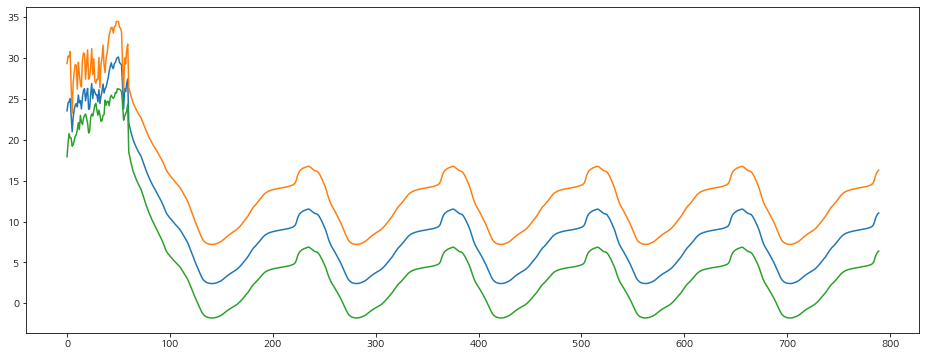

In [255]:
fig, axe = plt.subplots(figsize = (16, 6))
axe.plot(test_pred)